# Assignment 3 - SMAI - Multinomial Logistic Regression

In [1]:
import os
import sys

# enter the Foldername here:
FOLDERNAME = "/home/richard/play/IIITH/sem5/smai/assignments/assignment-3-fine-man"

if FOLDERNAME is None or not os.path.exists(FOLDERNAME):
    FOLDERNAME = os.getcwd()

PATHNAME = f"{FOLDERNAME}"
sys.path.append(f"{FOLDERNAME}")

DATA_FOLDER = os.path.join(FOLDERNAME, "datasets")
YAML_FOLDER = os.path.join(FOLDERNAME, "yaml-files")
print(DATA_FOLDER)
print(YAML_FOLDER)

/home/vanshg/play/IIIITH/sem5/smai/assignments/assignment-3-fine-man/datasets
/home/vanshg/play/IIIITH/sem5/smai/assignments/assignment-3-fine-man/yaml-files


In [2]:
import numpy as np
import pandas as pd
import os
from random import randrange
from matplotlib import pyplot as plt
from PIL import Image
import yaml

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [3]:
from src import *
from src.classifiers import *

In [4]:
# some magic so that the notebook will reload external python modules;
# see https://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

## 1.1 Dataset Analysis and Preprocessing

### (1.1.1) - Describing the data

In [5]:
wine_df = pd.read_csv(os.path.join(DATA_FOLDER, "wineqt.csv"))

# printing the mean, standard deviation, min and max for each column
wine_df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043,804.969379
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824,463.997116
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000,411.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000,794.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000,1209.500000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1597.000000


In [6]:
def load_wine_dataset(path):
    wine_df = pd.read_csv(path)
    X, y = wine_df.iloc[:, :-2].to_numpy(), wine_df.iloc[:, -2].to_numpy()
    return X, y

X, y = load_wine_dataset(os.path.join(DATA_FOLDER, "wineqt.csv"))
y -= np.min(y) # making the range of classes to be between [0, 5]

print(f"Shape of wine data: {X.shape}")
print(f"Shape of wine target classes: {y.shape}")

Shape of wine data: (1143, 11)
Shape of wine target classes: (1143,)


### (1.1.2) - Plotting Distribution of labels

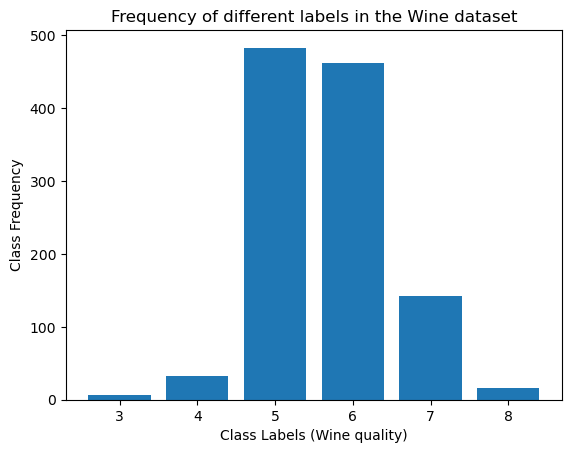

In [7]:
unique_labels, label_counts = np.unique(wine_df['quality'].to_numpy(), return_counts=True)

plt.bar(unique_labels, label_counts)

plt.title("Frequency of different labels in the Wine dataset")
plt.xlabel("Class Labels (Wine quality)")
plt.ylabel("Class Frequency")

plt.show()

### (1.1.3) - Train, Val, Test split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42
)

X_test, X_val, y_test, y_val = train_test_split(
    X_test, y_test, test_size=0.33, random_state=42
)

print(f"Size of training set: {X_train.shape}")
print(f"Size of validation set: {X_val.shape}")
print(f"Size of testing set: {X_test.shape}")

Size of training set: (800, 11)
Size of validation set: (114, 11)
Size of testing set: (229, 11)


### (1.1.4) - Standarizing the data

In [9]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)

print(f"Mean of training features:\n{scaler.mean_}\n")
print(f"Variance of training features: {scaler.var_}")

X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

Mean of training features:
[ 8.24225     0.52955625  0.2644375   2.5051875   0.08655875 15.703125
 45.54125     0.99668604  3.314925    0.6580125  10.437125  ]

Variance of training features: [2.84383994e+00 3.15808968e-02 3.70914336e-02 1.67394496e+00
 2.14769905e-03 1.04172178e+02 9.53580798e+02 3.55576542e-06
 2.28689944e-02 2.82864248e-02 1.13723701e+00]


### (1.1.5) - PCA dimensionality reduction

In [10]:
wine_pca = PCA(n_components=2)
wine_pca.fit(X_train)

X_train_reduced = wine_pca.transform(X_train)
X_val_reduced = wine_pca.transform(X_val)
X_test_reduced = wine_pca.transform(X_test)

print(f"Shape of reduced training set: {X_train_reduced.shape}")
print(f"Shape of reduced validation set: {X_val_reduced.shape}")
print(f"Shape of reduced testing set: {X_test_reduced.shape}")

Shape of reduced training set: (800, 2)
Shape of reduced validation set: (114, 2)
Shape of reduced testing set: (229, 2)


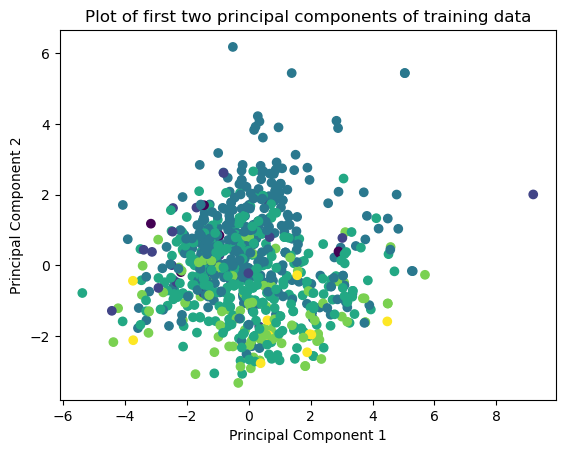

In [11]:
plt.scatter(X_train_reduced[:, 0], X_train_reduced[:, 1], c=y_train)
plt.title("Plot of first two principal components of training data")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

## 1.2 - Model Building From Scratch

In [56]:
model = FullyConnectedNet(X_train.shape[1], [], 6)
optimizer = Optimizer(model, optim_config={"learning_rate":1e-2})

logits = model.forward(X_train)
print(logits.shape)
loss, dout = softmax_loss(logits, y_train, return_grad=True)

# model.backward(dout)
# model.zero_grad()
# print(model.grads["b1"])

(800, 6)


In [162]:
np.random.seed(42)
model = FullyConnectedNet(2, [], 6, activation='sigmoid')
criterion = softmax_loss
optimizer = Optimizer(model, update_rule='adam', optim_config={"learning_rate": 1e-2})
train(
    model, criterion, optimizer, X_train_reduced, y_train, X_val_reduced, y_val, 
    num_epochs=1, print_every=1)

print("Hurray")

Iteration: 1/8 | loss = 3.8628
Iteration: 2/8 | loss = 3.3613
Iteration: 3/8 | loss = 3.6691
Iteration: 4/8 | loss = 3.3709
Iteration: 5/8 | loss = 3.5473
Iteration: 6/8 | loss = 3.6921
Iteration: 7/8 | loss = 3.1814
Iteration: 8/8 | loss = 3.1594
Epoch: 1 | Train Accuracy: 9.000 | Val Accuracy: 7.018 | Train loss: 3.3416 | Val loss: 3.4408

Hurray


In [82]:
model = FullyConnectedNet(2, [], 6)
data = {}
data["X_train"] = X_train_reduced
data["y_train"] = y_train
data["X_val"] = X_val_reduced
data["y_val"] = y_val

solver = Solver(model,
    data,
    update_rule="adam",
    optim_config={
        "learning_rate":1e-2
    },
    print_every=1,
    batch_size=100,
    num_epochs=100)

solver.train()

Iteration: 1/800 | loss = 3.6784
Iteration: 2/800 | loss = 4.1084
Iteration: 3/800 | loss = 3.9868
Iteration: 4/800 | loss = 4.2227
Iteration: 5/800 | loss = 3.4176
Iteration: 6/800 | loss = 4.2809
Iteration: 7/800 | loss = 3.6531
Iteration: 8/800 | loss = 3.9129
Epoch: 1 | Train Accuracy: 11.875 | Val Accuracy: 16.667 | Train loss: 3.7702 | Val loss: 3.9216

Iteration: 9/800 | loss = 3.9324
Iteration: 10/800 | loss = 3.8489
Iteration: 11/800 | loss = 3.9429
Iteration: 12/800 | loss = 3.7033
Iteration: 13/800 | loss = 3.5667
Iteration: 14/800 | loss = 3.8805
Iteration: 15/800 | loss = 3.3614
Iteration: 16/800 | loss = 3.1195
Epoch: 2 | Train Accuracy: 12.250 | Val Accuracy: 18.421 | Train loss: 3.5369 | Val loss: 3.6973

Iteration: 17/800 | loss = 3.7553
Iteration: 18/800 | loss = 3.6748
Iteration: 19/800 | loss = 3.4451
Iteration: 20/800 | loss = 3.2404
Iteration: 21/800 | loss = 3.7592
Iteration: 22/800 | loss = 3.1792
Iteration: 23/800 | loss = 2.9778
Iteration: 24/800 | loss = 3.51

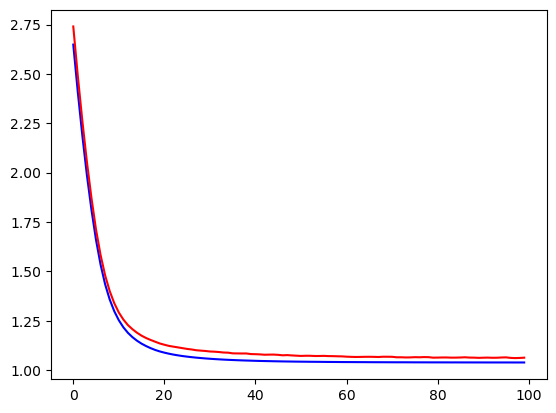

In [53]:
fig, ax = plt.subplots(1, 1)

ax.plot(solver.train_loss_history, c='b')
ax.plot(solver.val_loss_history, c='r')

plt.show()

## Hyperparameter Tuning and Evaluation

### Using single config

In [15]:
# testing out sweep using a single config
config = {
    "method": "grid",
    "name": "sgd-grid-search",
    "parameters": {
        "criterion": "sgd",
        "model": {
            "input_dim" : 11,
            "num_layers": 0,
            "num_classes": 6
        },
        "optimizer": {
            "update_rule" : "sgd",
            "learning_rate": 1e-2,
        },
        "training": {
            "update_type": "minibatch",
            "batch_size": 32,
            "epochs": 1000,
            "print_every": 10,
            # "log_wandb": True,
            "verbose": True
        }
    }
}

best_model = trigger_training(config["parameters"], X_train, y_train, X_val, y_val)

0
dict_keys(['W1', 'b1'])
Iteration: 10/25000 | loss = 4.2194
Iteration: 20/25000 | loss = 3.3778
Epoch: 1 | Train Accuracy: 15.875 | Val Accuracy: 15.789|  Train loss: 3.9177 | Val loss: 3.8373

Iteration: 30/25000 | loss = 3.2187
Iteration: 40/25000 | loss = 3.6111
Iteration: 50/25000 | loss = 3.3936
Epoch: 2 | Train Accuracy: 16.750 | Val Accuracy: 17.544|  Train loss: 3.7446 | Val loss: 3.6751

Iteration: 60/25000 | loss = 3.6786
Iteration: 70/25000 | loss = 4.1670
Epoch: 3 | Train Accuracy: 17.625 | Val Accuracy: 18.421|  Train loss: 3.5801 | Val loss: 3.5207

Iteration: 80/25000 | loss = 3.4726
Iteration: 90/25000 | loss = 3.5652
Iteration: 100/25000 | loss = 3.8118
Epoch: 4 | Train Accuracy: 18.375 | Val Accuracy: 20.175|  Train loss: 3.4241 | Val loss: 3.3739

Iteration: 110/25000 | loss = 3.7813
Iteration: 120/25000 | loss = 3.5364
Epoch: 5 | Train Accuracy: 19.000 | Val Accuracy: 21.930|  Train loss: 3.2766 | Val loss: 3.2347

Iteration: 130/25000 | loss = 3.9565
Iteration: 1

### Wandb Sweep

In [12]:
def make_wandb_run_name(config):
    model_config = config["model"]
    optim_config = config["optimizer"]
    train_config = config["training"]

    lr = optim_config["learning_rate"]
    update_rule = optim_config["update_rule"]
    update_type = train_config["update_type"]
    batch = train_config["batch_size"]

    run_name = f"{update_type}-{update_rule}-lr{lr}-batch{batch}"
    return run_name

def sweep_agent_manager():
    global X_train, y_train, X_val, y_val
    run = wandb.init()
    config = re_nest_config(dict(wandb.config))
    # setting the wandb run name for the current config
    run_name = make_wandb_run_name(config)
    print(f"Run Name: {run_name}")
    run.name = run_name
    # start the training
    trigger_training(config, X_train, y_train, X_val, y_val)

In [14]:
f = open(os.path.join(YAML_FOLDER, "task-1.3/logistic-grid-search.yaml"), "r")

sweep_configuration = yaml.safe_load(f)
print(sweep_configuration.values())

dict_values(['grid', 'smai-assignment3-task1', 'logistic-grid-search', {'criterion': {'value': 'softmax'}, 'model.input_dim': {'value': 11}, 'model.num_layers': {'value': 0}, 'model.num_classes': {'value': 6}, 'optimizer.update_rule': {'values': ['sgd', 'adam']}, 'optimizer.learning_rate': {'values': [0.0001, 0.0005, 0.001, 0.01, 0.1]}, 'training.update_type': {'values': ['minibatch', 'batch', 'stochastic']}, 'training.batch_size': {'values': [8, 16, 32, 64, 128]}, 'training.epochs': {'value': 1000}, 'training.log_wandb': {'value': True}, 'training.verbose': {'value': False}}])


In [15]:
sweep_id = wandb.sweep(sweep=sweep_configuration, project="smai-assignment3-task1")

Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


Create sweep with ID: 6m4lnkzy
Sweep URL: https://wandb.ai/vanshg/smai-assignment3-task1/sweeps/6m4lnkzy


In [16]:
wandb.agent(sweep_id=sweep_id, function=sweep_agent_manager)

wandb: Agent Starting Run: 3xp4esqu with config:
wandb: 	criterion: softmax
wandb: 	model.input_dim: 11
wandb: 	model.num_classes: 6
wandb: 	model.num_layers: 0
wandb: 	optimizer.learning_rate: 0.0001
wandb: 	optimizer.update_rule: sgd
wandb: 	training.batch_size: 8
wandb: 	training.epochs: 1000
wandb: 	training.log_wandb: True
wandb: 	training.update_type: minibatch
wandb: 	training.verbose: False
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: Currently logged in as: vanshg. Use `wandb login --relogin` to force relogin


Run Name: minibatch-sgd-lr0.0001-batch8
0
dict_keys(['W1', 'b1'])

BEST VAL ACCURACY : 52.6316 | Best Epoch: 999 | Val loss: 1.2673
Best Parameters have been loaded in the model


best_epoch,▁
best_val_acc,▁
best_val_loss,▁
epoch,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
train_acc,▁▁▁▂▂▂▂▂▂▃▃▃▃▄▄▄▄▄▅▅▅▅▅▆▆▆▆▇▇▇▇▇▇▇▇█████
train_loss,██▇▇▆▆▆▅▅▅▄▄▄▄▃▃▃▃▃▃▂▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁
val_acc,▁▁▁▂▂▂▂▃▃▃▃▃▄▄▄▅▅▅▅▆▇▇▇▇▇▆▇▇▇▇▇▇██▇█████
val_loss,██▇▇▆▆▆▅▅▅▅▄▄▄▄▃▃▃▃▃▃▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁
best_epoch,999
best_val_acc,0.52632
best_val_loss,1.26735


wandb: Agent Starting Run: t1obm50p with config:
wandb: 	criterion: softmax
wandb: 	model.input_dim: 11
wandb: 	model.num_classes: 6
wandb: 	model.num_layers: 0
wandb: 	optimizer.learning_rate: 0.0001
wandb: 	optimizer.update_rule: sgd
wandb: 	training.batch_size: 8
wandb: 	training.epochs: 1000
wandb: 	training.log_wandb: True
wandb: 	training.update_type: batch
wandb: 	training.verbose: False
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


Run Name: batch-sgd-lr0.0001-batch8
0
dict_keys(['W1', 'b1'])

BEST VAL ACCURACY : 15.7895 | Best Epoch: 1 | Val loss: 4.0072
Best Parameters have been loaded in the model


best_epoch,▁
best_val_acc,▁
best_val_loss,▁
epoch,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
train_acc,▁▁▁▁▁▁▁▁▁▃▃▃▆▆▆▆▆▆▆▆▆▆▆▅▅▅▅▆▆▆▆▆▆▆▆▆▆▆██
train_loss,███▇▇▇▇▇▇▆▆▆▆▆▅▅▅▅▅▅▄▄▄▄▄▃▃▃▃▃▃▂▂▂▂▂▂▁▁▁
val_acc,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
val_loss,███▇▇▇▇▇▇▆▆▆▆▆▅▅▅▅▅▅▄▄▄▄▄▃▃▃▃▃▃▂▂▂▂▂▂▁▁▁
best_epoch,1
best_val_acc,0.15789
best_val_loss,4.00722


wandb: Agent Starting Run: p1s3xur2 with config:
wandb: 	criterion: softmax
wandb: 	model.input_dim: 11
wandb: 	model.num_classes: 6
wandb: 	model.num_layers: 0
wandb: 	optimizer.learning_rate: 0.0001
wandb: 	optimizer.update_rule: sgd
wandb: 	training.batch_size: 8
wandb: 	training.epochs: 1000
wandb: 	training.log_wandb: True
wandb: 	training.update_type: stochastic
wandb: 	training.verbose: False
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


Run Name: stochastic-sgd-lr0.0001-batch8
0
dict_keys(['W1', 'b1'])

BEST VAL ACCURACY : 52.6316 | Best Epoch: 999 | Val loss: 1.2673
Best Parameters have been loaded in the model


best_epoch,▁
best_val_acc,▁
best_val_loss,▁
epoch,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
train_acc,▁▁▁▂▂▂▂▂▂▃▃▃▃▄▄▄▄▄▅▅▅▅▅▆▆▆▆▇▇▇▇▇▇▇▇█████
train_loss,██▇▇▆▆▆▅▅▅▄▄▄▄▃▃▃▃▃▃▂▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁
val_acc,▁▁▁▂▂▂▂▃▃▃▃▃▄▄▄▅▅▅▅▆▇▇▇▇▇▆▇▇▇▇▇▇██▇█████
val_loss,██▇▇▆▆▆▅▅▅▅▄▄▄▄▃▃▃▃▃▃▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁
best_epoch,999
best_val_acc,0.52632
best_val_loss,1.26735


wandb: Agent Starting Run: ld3maplj with config:
wandb: 	criterion: softmax
wandb: 	model.input_dim: 11
wandb: 	model.num_classes: 6
wandb: 	model.num_layers: 0
wandb: 	optimizer.learning_rate: 0.0001
wandb: 	optimizer.update_rule: sgd
wandb: 	training.batch_size: 16
wandb: 	training.epochs: 1000
wandb: 	training.log_wandb: True
wandb: 	training.update_type: minibatch
wandb: 	training.verbose: False
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


Run Name: minibatch-sgd-lr0.0001-batch16
0
dict_keys(['W1', 'b1'])

BEST VAL ACCURACY : 43.8596 | Best Epoch: 987 | Val loss: 1.8869
Best Parameters have been loaded in the model


best_epoch,▁
best_val_acc,▁
best_val_loss,▁
epoch,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
train_acc,▁▁▁▁▂▂▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▆▆▇▇▇▇▇▇▇▇▇██
train_loss,██▇▇▇▇▆▆▆▆▅▅▅▅▄▄▄▄▄▄▃▃▃▃▃▃▂▂▂▂▂▂▂▂▁▁▁▁▁▁
val_acc,▁▁▁▁▁▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▇▇▇▇▇█
val_loss,██▇▇▇▇▆▆▆▆▅▅▅▅▅▄▄▄▄▄▃▃▃▃▃▃▃▂▂▂▂▂▂▂▁▁▁▁▁▁
best_epoch,987
best_val_acc,0.4386
best_val_loss,1.88688


wandb: Agent Starting Run: 9yhjw2oi with config:
wandb: 	criterion: softmax
wandb: 	model.input_dim: 11
wandb: 	model.num_classes: 6
wandb: 	model.num_layers: 0
wandb: 	optimizer.learning_rate: 0.0001
wandb: 	optimizer.update_rule: sgd
wandb: 	training.batch_size: 16
wandb: 	training.epochs: 1000
wandb: 	training.log_wandb: True
wandb: 	training.update_type: batch
wandb: 	training.verbose: False
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


Run Name: batch-sgd-lr0.0001-batch16
0
dict_keys(['W1', 'b1'])

BEST VAL ACCURACY : 15.7895 | Best Epoch: 1 | Val loss: 4.0072
Best Parameters have been loaded in the model


best_epoch,▁
best_val_acc,▁
best_val_loss,▁
epoch,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
train_acc,▁▁▁▁▁▁▁▁▁▃▃▃▆▆▆▆▆▆▆▆▆▆▆▅▅▅▅▆▆▆▆▆▆▆▆▆▆▆██
train_loss,███▇▇▇▇▇▇▆▆▆▆▆▅▅▅▅▅▅▄▄▄▄▄▃▃▃▃▃▃▂▂▂▂▂▂▁▁▁
val_acc,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
val_loss,███▇▇▇▇▇▇▆▆▆▆▆▅▅▅▅▅▅▄▄▄▄▄▃▃▃▃▃▃▂▂▂▂▂▂▁▁▁
best_epoch,1
best_val_acc,0.15789
best_val_loss,4.00722


wandb: Agent Starting Run: lj6iyzta with config:
wandb: 	criterion: softmax
wandb: 	model.input_dim: 11
wandb: 	model.num_classes: 6
wandb: 	model.num_layers: 0
wandb: 	optimizer.learning_rate: 0.0001
wandb: 	optimizer.update_rule: sgd
wandb: 	training.batch_size: 16
wandb: 	training.epochs: 1000
wandb: 	training.log_wandb: True
wandb: 	training.update_type: stochastic
wandb: 	training.verbose: False
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


Run Name: stochastic-sgd-lr0.0001-batch16
0
dict_keys(['W1', 'b1'])

BEST VAL ACCURACY : 43.8596 | Best Epoch: 987 | Val loss: 1.8869
Best Parameters have been loaded in the model


best_epoch,▁
best_val_acc,▁
best_val_loss,▁
epoch,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
train_acc,▁▁▁▁▂▂▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▆▆▇▇▇▇▇▇▇▇▇██
train_loss,██▇▇▇▇▆▆▆▆▅▅▅▅▄▄▄▄▄▄▃▃▃▃▃▃▂▂▂▂▂▂▂▂▁▁▁▁▁▁
val_acc,▁▁▁▁▁▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▇▇▇▇▇█
val_loss,██▇▇▇▇▆▆▆▆▅▅▅▅▅▄▄▄▄▄▃▃▃▃▃▃▃▂▂▂▂▂▂▂▁▁▁▁▁▁
best_epoch,987
best_val_acc,0.4386
best_val_loss,1.88688


wandb: Agent Starting Run: dr2m4npp with config:
wandb: 	criterion: softmax
wandb: 	model.input_dim: 11
wandb: 	model.num_classes: 6
wandb: 	model.num_layers: 0
wandb: 	optimizer.learning_rate: 0.0001
wandb: 	optimizer.update_rule: sgd
wandb: 	training.batch_size: 32
wandb: 	training.epochs: 1000
wandb: 	training.log_wandb: True
wandb: 	training.update_type: minibatch
wandb: 	training.verbose: False
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: W&B API key is configured. Use `wandb login --relogin` to force relogin


Run Name: minibatch-sgd-lr0.0001-batch32
0
dict_keys(['W1', 'b1'])

BEST VAL ACCURACY : 27.1930 | Best Epoch: 920 | Val loss: 2.7270
Best Parameters have been loaded in the model


best_epoch,▁
best_val_acc,▁
best_val_loss,▁
epoch,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
train_acc,▁▁▁▂▂▂▂▂▂▂▃▃▃▄▄▄▄▄▄▄▄▄▅▅▅▅▅▅▅▆▆▆▆▆▇▇▇███
train_loss,███▇▇▇▇▆▆▆▆▆▅▅▅▅▅▄▄▄▄▄▄▃▃▃▃▃▃▂▂▂▂▂▂▂▁▁▁▁
val_acc,▁▁▁▁▁▂▂▂▂▂▃▃▃▃▃▄▄▄▄▅▅▅▅▅▅▅▅▆▇▇▇▇▇▇▇▇███▇
val_loss,███▇▇▇▇▆▆▆▆▆▅▅▅▅▅▄▄▄▄▄▄▃▃▃▃▃▃▂▂▂▂▂▂▂▁▁▁▁
best_epoch,920
best_val_acc,0.27193
best_val_loss,2.72696


wandb: Agent Starting Run: ftq34h34 with config:
wandb: 	criterion: softmax
wandb: 	model.input_dim: 11
wandb: 	model.num_classes: 6
wandb: 	model.num_layers: 0
wandb: 	optimizer.learning_rate: 0.0001
wandb: 	optimizer.update_rule: sgd
wandb: 	training.batch_size: 32
wandb: 	training.epochs: 1000
wandb: 	training.log_wandb: True
wandb: 	training.update_type: batch
wandb: 	training.verbose: False
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


Run Name: batch-sgd-lr0.0001-batch32
0
dict_keys(['W1', 'b1'])

BEST VAL ACCURACY : 15.7895 | Best Epoch: 1 | Val loss: 4.0072
Best Parameters have been loaded in the model


best_epoch,▁
best_val_acc,▁
best_val_loss,▁
epoch,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
train_acc,▁▁▁▁▁▁▁▁▁▃▃▃▆▆▆▆▆▆▆▆▆▆▆▅▅▅▅▆▆▆▆▆▆▆▆▆▆▆██
train_loss,███▇▇▇▇▇▇▆▆▆▆▆▅▅▅▅▅▅▄▄▄▄▄▃▃▃▃▃▃▂▂▂▂▂▂▁▁▁
val_acc,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
val_loss,███▇▇▇▇▇▇▆▆▆▆▆▅▅▅▅▅▅▄▄▄▄▄▃▃▃▃▃▃▂▂▂▂▂▂▁▁▁
best_epoch,1
best_val_acc,0.15789
best_val_loss,4.00722


wandb: Agent Starting Run: y1lz4wlz with config:
wandb: 	criterion: softmax
wandb: 	model.input_dim: 11
wandb: 	model.num_classes: 6
wandb: 	model.num_layers: 0
wandb: 	optimizer.learning_rate: 0.0001
wandb: 	optimizer.update_rule: sgd
wandb: 	training.batch_size: 32
wandb: 	training.epochs: 1000
wandb: 	training.log_wandb: True
wandb: 	training.update_type: stochastic
wandb: 	training.verbose: False
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


Run Name: stochastic-sgd-lr0.0001-batch32
0
dict_keys(['W1', 'b1'])

BEST VAL ACCURACY : 27.1930 | Best Epoch: 920 | Val loss: 2.7270
Best Parameters have been loaded in the model


best_epoch,▁
best_val_acc,▁
best_val_loss,▁
epoch,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
train_acc,▁▁▁▂▂▂▂▂▂▂▃▃▃▄▄▄▄▄▄▄▄▄▅▅▅▅▅▅▅▆▆▆▆▆▇▇▇███
train_loss,███▇▇▇▇▆▆▆▆▆▅▅▅▅▅▄▄▄▄▄▄▃▃▃▃▃▃▂▂▂▂▂▂▂▁▁▁▁
val_acc,▁▁▁▁▁▂▂▂▂▂▃▃▃▃▃▄▄▄▄▅▅▅▅▅▅▅▅▆▇▇▇▇▇▇▇▇███▇
val_loss,███▇▇▇▇▆▆▆▆▆▅▅▅▅▅▄▄▄▄▄▄▃▃▃▃▃▃▂▂▂▂▂▂▂▁▁▁▁
best_epoch,920
best_val_acc,0.27193
best_val_loss,2.72696


wandb: Agent Starting Run: 9r96c6vn with config:
wandb: 	criterion: softmax
wandb: 	model.input_dim: 11
wandb: 	model.num_classes: 6
wandb: 	model.num_layers: 0
wandb: 	optimizer.learning_rate: 0.0001
wandb: 	optimizer.update_rule: sgd
wandb: 	training.batch_size: 64
wandb: 	training.epochs: 1000
wandb: 	training.log_wandb: True
wandb: 	training.update_type: minibatch
wandb: 	training.verbose: False
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


Run Name: minibatch-sgd-lr0.0001-batch64
0
dict_keys(['W1', 'b1'])

BEST VAL ACCURACY : 21.9298 | Best Epoch: 922 | Val loss: 3.2630
Best Parameters have been loaded in the model


best_epoch,▁
best_val_acc,▁
best_val_loss,▁
epoch,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
train_acc,▁▂▂▂▂▂▂▃▃▃▃▃▃▃▄▄▄▄▅▅▅▆▆▆▆▇▇▇▇▇▇▇▇███████
train_loss,███▇▇▇▇▇▆▆▆▆▆▅▅▅▅▅▅▄▄▄▄▄▃▃▃▃▃▃▂▂▂▂▂▂▁▁▁▁
val_acc,▁▁▁▁▁▁▁▁▁▁▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▅▅▅▆▆▆▆▆▆▆▆▇███
val_loss,███▇▇▇▇▇▆▆▆▆▆▅▅▅▅▅▅▄▄▄▄▄▃▃▃▃▃▃▂▂▂▂▂▂▁▁▁▁
best_epoch,922
best_val_acc,0.2193
best_val_loss,3.26301


wandb: Agent Starting Run: aysie7lh with config:
wandb: 	criterion: softmax
wandb: 	model.input_dim: 11
wandb: 	model.num_classes: 6
wandb: 	model.num_layers: 0
wandb: 	optimizer.learning_rate: 0.0001
wandb: 	optimizer.update_rule: sgd
wandb: 	training.batch_size: 64
wandb: 	training.epochs: 1000
wandb: 	training.log_wandb: True
wandb: 	training.update_type: batch
wandb: 	training.verbose: False
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


Run Name: batch-sgd-lr0.0001-batch64
0
dict_keys(['W1', 'b1'])

BEST VAL ACCURACY : 15.7895 | Best Epoch: 1 | Val loss: 4.0072
Best Parameters have been loaded in the model


best_epoch,▁
best_val_acc,▁
best_val_loss,▁
epoch,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
train_acc,▁▁▁▁▁▁▁▁▁▃▃▃▆▆▆▆▆▆▆▆▆▆▅▅▅▅▆▆▆▆▆▆▆▆▆▆████
train_loss,███▇▇▇▇▇▇▆▆▆▆▆▅▅▅▅▅▅▄▄▄▄▄▃▃▃▃▃▃▂▂▂▂▂▂▁▁▁
val_acc,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
val_loss,███▇▇▇▇▇▇▆▆▆▆▆▅▅▅▅▅▅▄▄▄▄▄▃▃▃▃▃▃▂▂▂▂▂▂▁▁▁
best_epoch,1
best_val_acc,0.15789
best_val_loss,4.00722


wandb: Agent Starting Run: kz93hlim with config:
wandb: 	criterion: softmax
wandb: 	model.input_dim: 11
wandb: 	model.num_classes: 6
wandb: 	model.num_layers: 0
wandb: 	optimizer.learning_rate: 0.0001
wandb: 	optimizer.update_rule: sgd
wandb: 	training.batch_size: 64
wandb: 	training.epochs: 1000
wandb: 	training.log_wandb: True
wandb: 	training.update_type: stochastic
wandb: 	training.verbose: False
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


Run Name: stochastic-sgd-lr0.0001-batch64
0
dict_keys(['W1', 'b1'])

BEST VAL ACCURACY : 21.9298 | Best Epoch: 922 | Val loss: 3.2630
Best Parameters have been loaded in the model


best_epoch,▁
best_val_acc,▁
best_val_loss,▁
epoch,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
train_acc,▁▂▂▂▂▂▂▃▃▃▃▃▃▃▄▄▄▄▅▅▅▆▆▆▆▇▇▇▇▇▇▇▇███████
train_loss,███▇▇▇▇▇▆▆▆▆▆▅▅▅▅▅▅▄▄▄▄▄▃▃▃▃▃▃▂▂▂▂▂▂▁▁▁▁
val_acc,▁▁▁▁▁▁▁▁▁▁▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▅▅▅▆▆▆▆▆▆▆▆▇███
val_loss,███▇▇▇▇▇▆▆▆▆▆▅▅▅▅▅▅▄▄▄▄▄▃▃▃▃▃▃▂▂▂▂▂▂▁▁▁▁
best_epoch,922
best_val_acc,0.2193
best_val_loss,3.26301


wandb: Agent Starting Run: l49hrpyr with config:
wandb: 	criterion: softmax
wandb: 	model.input_dim: 11
wandb: 	model.num_classes: 6
wandb: 	model.num_layers: 0
wandb: 	optimizer.learning_rate: 0.0001
wandb: 	optimizer.update_rule: sgd
wandb: 	training.batch_size: 128
wandb: 	training.epochs: 1000
wandb: 	training.log_wandb: True
wandb: 	training.update_type: minibatch
wandb: 	training.verbose: False
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


Run Name: minibatch-sgd-lr0.0001-batch128
0
dict_keys(['W1', 'b1'])

BEST VAL ACCURACY : 19.2982 | Best Epoch: 917 | Val loss: 3.5867
Best Parameters have been loaded in the model


best_epoch,▁
best_val_acc,▁
best_val_loss,▁
epoch,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
train_acc,▁▁▂▂▂▂▂▂▂▂▃▃▃▄▄▄▄▄▄▄▄▄▄▄▄▄▅▆▆▆▆▆▆▆▆▆▇███
train_loss,███▇▇▇▇▇▆▆▆▆▆▆▅▅▅▅▅▄▄▄▄▄▄▃▃▃▃▃▃▂▂▂▂▂▁▁▁▁
val_acc,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▃▃▃▃▃▃▃▃▃▆▆▆▆▆▆▆▆▆████
val_loss,███▇▇▇▇▇▇▆▆▆▆▆▅▅▅▅▅▄▄▄▄▄▄▃▃▃▃▃▃▂▂▂▂▂▁▁▁▁
best_epoch,917
best_val_acc,0.19298
best_val_loss,3.5867


wandb: Agent Starting Run: y6oqeun3 with config:
wandb: 	criterion: softmax
wandb: 	model.input_dim: 11
wandb: 	model.num_classes: 6
wandb: 	model.num_layers: 0
wandb: 	optimizer.learning_rate: 0.0001
wandb: 	optimizer.update_rule: sgd
wandb: 	training.batch_size: 128
wandb: 	training.epochs: 1000
wandb: 	training.log_wandb: True
wandb: 	training.update_type: batch
wandb: 	training.verbose: False
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


Run Name: batch-sgd-lr0.0001-batch128
0
dict_keys(['W1', 'b1'])

BEST VAL ACCURACY : 15.7895 | Best Epoch: 1 | Val loss: 4.0072
Best Parameters have been loaded in the model


best_epoch,▁
best_val_acc,▁
best_val_loss,▁
epoch,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
train_acc,▁▁▁▁▁▁▁▁▃▃▃▆▆▆▆▆▆▆▆▆▆▅▅▅▆▆▆▆▆▆▆▆▆▆██████
train_loss,███▇▇▇▇▇▇▆▆▆▆▆▅▅▅▅▅▅▄▄▄▄▄▃▃▃▃▃▃▂▂▂▂▂▂▁▁▁
val_acc,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
val_loss,███▇▇▇▇▇▇▆▆▆▆▆▅▅▅▅▅▅▄▄▄▄▄▃▃▃▃▃▃▂▂▂▂▂▂▁▁▁
best_epoch,1
best_val_acc,0.15789
best_val_loss,4.00722


wandb: Agent Starting Run: bvk157o8 with config:
wandb: 	criterion: softmax
wandb: 	model.input_dim: 11
wandb: 	model.num_classes: 6
wandb: 	model.num_layers: 0
wandb: 	optimizer.learning_rate: 0.0001
wandb: 	optimizer.update_rule: sgd
wandb: 	training.batch_size: 128
wandb: 	training.epochs: 1000
wandb: 	training.log_wandb: True
wandb: 	training.update_type: stochastic
wandb: 	training.verbose: False
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


Run Name: stochastic-sgd-lr0.0001-batch128
0
dict_keys(['W1', 'b1'])

BEST VAL ACCURACY : 19.2982 | Best Epoch: 917 | Val loss: 3.5867
Best Parameters have been loaded in the model


best_epoch,▁
best_val_acc,▁
best_val_loss,▁
epoch,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
train_acc,▁▁▂▂▂▂▂▂▂▂▃▃▃▄▄▄▄▄▄▄▄▄▄▄▄▄▅▆▆▆▆▆▆▆▆▆▇███
train_loss,███▇▇▇▇▇▆▆▆▆▆▆▅▅▅▅▅▄▄▄▄▄▄▃▃▃▃▃▃▂▂▂▂▂▁▁▁▁
val_acc,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▃▃▃▃▃▃▃▃▃▆▆▆▆▆▆▆▆▆████
val_loss,███▇▇▇▇▇▇▆▆▆▆▆▅▅▅▅▅▄▄▄▄▄▄▃▃▃▃▃▃▂▂▂▂▂▁▁▁▁
best_epoch,917
best_val_acc,0.19298
best_val_loss,3.5867


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: zt215f2z with config:
wandb: 	criterion: softmax
wandb: 	model.input_dim: 11
wandb: 	model.num_classes: 6
wandb: 	model.num_layers: 0
wandb: 	optimizer.learning_rate: 0.0001
wandb: 	optimizer.update_rule: adam
wandb: 	training.batch_size: 8
wandb: 	training.epochs: 1000
wandb: 	training.log_wandb: True
wandb: 	training.update_type: minibatch
wandb: 	training.verbose: False
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


Run Name: minibatch-adam-lr0.0001-batch8
0
dict_keys(['W1', 'b1'])

BEST VAL ACCURACY : 64.0351 | Best Epoch: 369 | Val loss: 0.9939
Best Parameters have been loaded in the model


best_epoch,▁
best_val_acc,▁
best_val_loss,▁
epoch,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
train_acc,▁▂▂▃▄▅▆▆▇▇▇▇▇▇▇▇████████████████████████
train_loss,█▆▅▄▃▃▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
val_acc,▁▂▂▄▅▅▆▆▇▇▇▇████████████████████████████
val_loss,█▆▅▄▃▃▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
best_epoch,369
best_val_acc,0.64035
best_val_loss,0.99385


wandb: Agent Starting Run: x24ojoz6 with config:
wandb: 	criterion: softmax
wandb: 	model.input_dim: 11
wandb: 	model.num_classes: 6
wandb: 	model.num_layers: 0
wandb: 	optimizer.learning_rate: 0.0001
wandb: 	optimizer.update_rule: adam
wandb: 	training.batch_size: 8
wandb: 	training.epochs: 1000
wandb: 	training.log_wandb: True
wandb: 	training.update_type: batch
wandb: 	training.verbose: False
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


Run Name: batch-adam-lr0.0001-batch8
0
dict_keys(['W1', 'b1'])

BEST VAL ACCURACY : 19.2982 | Best Epoch: 965 | Val loss: 3.5160
Best Parameters have been loaded in the model


best_epoch,▁
best_val_acc,▁
best_val_loss,▁
epoch,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
train_acc,▁▂▃▃▂▃▃▃▄▄▄▄▄▄▃▃▃▃▄▄▄▄▄▄▄▄▄▅▅▅▆▆▆▆▆▆▆▇██
train_loss,███▇▇▇▇▇▇▆▆▆▆▆▅▅▅▅▅▄▄▄▄▄▄▃▃▃▃▃▃▂▂▂▂▂▁▁▁▁
val_acc,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▃▃▃▃▃▃▃▅▅▅▆▆▆▆▆▆▆▆██
val_loss,███▇▇▇▇▇▇▆▆▆▆▆▅▅▅▅▅▅▄▄▄▄▄▃▃▃▃▃▃▂▂▂▂▂▁▁▁▁
best_epoch,965
best_val_acc,0.19298
best_val_loss,3.51598


wandb: Agent Starting Run: kmhwl2n0 with config:
wandb: 	criterion: softmax
wandb: 	model.input_dim: 11
wandb: 	model.num_classes: 6
wandb: 	model.num_layers: 0
wandb: 	optimizer.learning_rate: 0.0001
wandb: 	optimizer.update_rule: adam
wandb: 	training.batch_size: 8
wandb: 	training.epochs: 1000
wandb: 	training.log_wandb: True
wandb: 	training.update_type: stochastic
wandb: 	training.verbose: False
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


Run Name: stochastic-adam-lr0.0001-batch8
0
dict_keys(['W1', 'b1'])

BEST VAL ACCURACY : 64.0351 | Best Epoch: 369 | Val loss: 0.9939
Best Parameters have been loaded in the model


best_epoch,▁
best_val_acc,▁
best_val_loss,▁
epoch,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
train_acc,▁▂▂▃▄▅▆▆▇▇▇▇▇▇▇▇████████████████████████
train_loss,█▆▅▄▃▃▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
val_acc,▁▂▂▄▅▅▆▆▇▇▇▇████████████████████████████
val_loss,█▆▅▄▃▃▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
best_epoch,369
best_val_acc,0.64035
best_val_loss,0.99385


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: 7rew3lot with config:
wandb: 	criterion: softmax
wandb: 	model.input_dim: 11
wandb: 	model.num_classes: 6
wandb: 	model.num_layers: 0
wandb: 	optimizer.learning_rate: 0.0001
wandb: 	optimizer.update_rule: adam
wandb: 	training.batch_size: 16
wandb: 	training.epochs: 1000
wandb: 	training.log_wandb: True
wandb: 	training.update_type: minibatch
wandb: 	training.verbose: False
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


Run Name: minibatch-adam-lr0.0001-batch16
0
dict_keys(['W1', 'b1'])

BEST VAL ACCURACY : 64.0351 | Best Epoch: 585 | Val loss: 0.9933
Best Parameters have been loaded in the model


best_epoch,▁
best_val_acc,▁
best_val_loss,▁
epoch,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
train_acc,▁▁▂▂▃▃▄▄▅▅▆▆▇▇▇▇▇▇▇▇▇███████████████████
train_loss,█▇▆▅▅▄▄▃▃▃▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
val_acc,▁▂▂▃▃▄▅▅▅▅▅▆▆▆▆▇▇▇▇▇████████████████████
val_loss,█▇▆▅▅▄▄▃▃▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
best_epoch,585
best_val_acc,0.64035
best_val_loss,0.99328


wandb: Agent Starting Run: 610gfe43 with config:
wandb: 	criterion: softmax
wandb: 	model.input_dim: 11
wandb: 	model.num_classes: 6
wandb: 	model.num_layers: 0
wandb: 	optimizer.learning_rate: 0.0001
wandb: 	optimizer.update_rule: adam
wandb: 	training.batch_size: 16
wandb: 	training.epochs: 1000
wandb: 	training.log_wandb: True
wandb: 	training.update_type: batch
wandb: 	training.verbose: False
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


Run Name: batch-adam-lr0.0001-batch16
0
dict_keys(['W1', 'b1'])

BEST VAL ACCURACY : 19.2982 | Best Epoch: 965 | Val loss: 3.5160
Best Parameters have been loaded in the model


best_epoch,▁
best_val_acc,▁
best_val_loss,▁
epoch,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
train_acc,▁▂▃▃▂▃▃▃▄▄▄▄▄▄▃▃▃▃▄▄▄▄▄▄▄▄▄▅▅▅▆▆▆▆▆▆▆▇██
train_loss,███▇▇▇▇▇▇▆▆▆▆▆▅▅▅▅▅▄▄▄▄▄▄▃▃▃▃▃▃▂▂▂▂▂▁▁▁▁
val_acc,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▃▃▃▃▃▃▃▅▅▅▆▆▆▆▆▆▆▆██
val_loss,███▇▇▇▇▇▇▆▆▆▆▆▅▅▅▅▅▅▄▄▄▄▄▃▃▃▃▃▃▂▂▂▂▂▁▁▁▁
best_epoch,965
best_val_acc,0.19298
best_val_loss,3.51598


wandb: Agent Starting Run: yv9ltc1n with config:
wandb: 	criterion: softmax
wandb: 	model.input_dim: 11
wandb: 	model.num_classes: 6
wandb: 	model.num_layers: 0
wandb: 	optimizer.learning_rate: 0.0001
wandb: 	optimizer.update_rule: adam
wandb: 	training.batch_size: 16
wandb: 	training.epochs: 1000
wandb: 	training.log_wandb: True
wandb: 	training.update_type: stochastic
wandb: 	training.verbose: False
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


Run Name: stochastic-adam-lr0.0001-batch16
0
dict_keys(['W1', 'b1'])

BEST VAL ACCURACY : 64.0351 | Best Epoch: 585 | Val loss: 0.9933
Best Parameters have been loaded in the model


best_epoch,▁
best_val_acc,▁
best_val_loss,▁
epoch,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
train_acc,▁▁▂▂▃▃▄▄▅▅▆▆▇▇▇▇▇▇▇▇▇███████████████████
train_loss,█▇▆▅▅▄▄▃▃▃▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
val_acc,▁▂▂▃▃▄▅▅▅▅▅▆▆▆▆▇▇▇▇▇████████████████████
val_loss,█▇▆▅▅▄▄▃▃▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
best_epoch,585
best_val_acc,0.64035
best_val_loss,0.99328


wandb: Agent Starting Run: eybwj1a9 with config:
wandb: 	criterion: softmax
wandb: 	model.input_dim: 11
wandb: 	model.num_classes: 6
wandb: 	model.num_layers: 0
wandb: 	optimizer.learning_rate: 0.0001
wandb: 	optimizer.update_rule: adam
wandb: 	training.batch_size: 32
wandb: 	training.epochs: 1000
wandb: 	training.log_wandb: True
wandb: 	training.update_type: minibatch
wandb: 	training.verbose: False
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


Run Name: minibatch-adam-lr0.0001-batch32
0
dict_keys(['W1', 'b1'])

BEST VAL ACCURACY : 63.1579 | Best Epoch: 976 | Val loss: 0.9958
Best Parameters have been loaded in the model


best_epoch,▁
best_val_acc,▁
best_val_loss,▁
epoch,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
train_acc,▁▁▁▁▂▂▂▃▃▃▄▄▅▅▅▅▅▆▆▆▆▇▇▇▇▇▇▇▇▇██████████
train_loss,█▇▇▆▆▆▅▅▄▄▄▃▃▃▃▃▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
val_acc,▁▁▁▂▂▃▃▃▃▃▄▅▅▅▅▅▅▅▅▆▆▆▆▇▇▇▇▇▇▇▇█████████
val_loss,█▇▇▆▆▆▅▅▄▄▄▃▃▃▃▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
best_epoch,976
best_val_acc,0.63158
best_val_loss,0.99579


wandb: Agent Starting Run: mb30wvgz with config:
wandb: 	criterion: softmax
wandb: 	model.input_dim: 11
wandb: 	model.num_classes: 6
wandb: 	model.num_layers: 0
wandb: 	optimizer.learning_rate: 0.0001
wandb: 	optimizer.update_rule: adam
wandb: 	training.batch_size: 32
wandb: 	training.epochs: 1000
wandb: 	training.log_wandb: True
wandb: 	training.update_type: batch
wandb: 	training.verbose: False
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


Run Name: batch-adam-lr0.0001-batch32
0
dict_keys(['W1', 'b1'])

BEST VAL ACCURACY : 19.2982 | Best Epoch: 965 | Val loss: 3.5160
Best Parameters have been loaded in the model


best_epoch,▁
best_val_acc,▁
best_val_loss,▁
epoch,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
train_acc,▁▂▃▃▂▃▃▃▄▄▄▄▄▄▃▃▃▃▄▄▄▄▄▄▄▄▄▅▅▅▆▆▆▆▆▆▆▇██
train_loss,███▇▇▇▇▇▇▆▆▆▆▆▅▅▅▅▅▄▄▄▄▄▄▃▃▃▃▃▃▂▂▂▂▂▁▁▁▁
val_acc,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▃▃▃▃▃▃▃▅▅▅▆▆▆▆▆▆▆▆██
val_loss,███▇▇▇▇▇▇▆▆▆▆▆▅▅▅▅▅▅▄▄▄▄▄▃▃▃▃▃▃▂▂▂▂▂▁▁▁▁
best_epoch,965
best_val_acc,0.19298
best_val_loss,3.51598


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: nneo1mxg with config:
wandb: 	criterion: softmax
wandb: 	model.input_dim: 11
wandb: 	model.num_classes: 6
wandb: 	model.num_layers: 0
wandb: 	optimizer.learning_rate: 0.0001
wandb: 	optimizer.update_rule: adam
wandb: 	training.batch_size: 32
wandb: 	training.epochs: 1000
wandb: 	training.log_wandb: True
wandb: 	training.update_type: stochastic
wandb: 	training.verbose: False
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


Run Name: stochastic-adam-lr0.0001-batch32
0
dict_keys(['W1', 'b1'])

BEST VAL ACCURACY : 63.1579 | Best Epoch: 976 | Val loss: 0.9958
Best Parameters have been loaded in the model


best_epoch,▁
best_val_acc,▁
best_val_loss,▁
epoch,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
train_acc,▁▁▁▁▂▂▂▃▃▃▄▄▅▅▅▅▅▆▆▆▆▇▇▇▇▇▇▇▇▇██████████
train_loss,█▇▇▆▆▆▅▅▄▄▄▃▃▃▃▃▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
val_acc,▁▁▁▂▂▃▃▃▃▃▄▅▅▅▅▅▅▅▅▆▆▆▆▇▇▇▇▇▇▇▇█████████
val_loss,█▇▇▆▆▆▅▅▄▄▄▃▃▃▃▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
best_epoch,976
best_val_acc,0.63158
best_val_loss,0.99579


wandb: Agent Starting Run: s5hjorrd with config:
wandb: 	criterion: softmax
wandb: 	model.input_dim: 11
wandb: 	model.num_classes: 6
wandb: 	model.num_layers: 0
wandb: 	optimizer.learning_rate: 0.0001
wandb: 	optimizer.update_rule: adam
wandb: 	training.batch_size: 64
wandb: 	training.epochs: 1000
wandb: 	training.log_wandb: True
wandb: 	training.update_type: minibatch
wandb: 	training.verbose: False
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


Run Name: minibatch-adam-lr0.0001-batch64
0
dict_keys(['W1', 'b1'])

BEST VAL ACCURACY : 52.6316 | Best Epoch: 905 | Val loss: 1.2916
Best Parameters have been loaded in the model


best_epoch,▁
best_val_acc,▁
best_val_loss,▁
epoch,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
train_acc,▁▁▁▁▁▁▂▂▂▂▂▃▃▃▃▄▄▄▄▅▅▅▅▆▆▆▆▆▆▇▇▇▇▇██████
train_loss,██▇▇▇▆▆▆▅▅▅▅▄▄▄▄▄▃▃▃▃▃▃▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁
val_acc,▁▁▁▁▂▂▂▃▃▃▃▃▄▄▄▄▄▅▅▅▆▆▆▆▆▆▆▆▆▆▇▇▇▇██████
val_loss,██▇▇▇▆▆▆▅▅▅▅▄▄▄▄▄▃▃▃▃▃▃▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁
best_epoch,905
best_val_acc,0.52632
best_val_loss,1.2916


wandb: Agent Starting Run: 7t1h7ib1 with config:
wandb: 	criterion: softmax
wandb: 	model.input_dim: 11
wandb: 	model.num_classes: 6
wandb: 	model.num_layers: 0
wandb: 	optimizer.learning_rate: 0.0001
wandb: 	optimizer.update_rule: adam
wandb: 	training.batch_size: 64
wandb: 	training.epochs: 1000
wandb: 	training.log_wandb: True
wandb: 	training.update_type: batch
wandb: 	training.verbose: False
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


Run Name: batch-adam-lr0.0001-batch64
0
dict_keys(['W1', 'b1'])

BEST VAL ACCURACY : 19.2982 | Best Epoch: 977 | Val loss: 3.5115
Best Parameters have been loaded in the model


best_epoch,▁
best_val_acc,▁
best_val_loss,▁
epoch,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
train_acc,▁▂▃▃▂▃▃▃▃▄▄▄▄▄▄▃▃▃▄▄▄▄▄▄▄▄▄▅▅▅▅▆▆▆▆▆▆▇▇█
train_loss,███▇▇▇▇▇▇▆▆▆▆▆▅▅▅▅▅▄▄▄▄▄▄▃▃▃▃▃▃▂▂▂▂▂▁▁▁▁
val_acc,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▃▃▃▃▃▃▃▅▅▅▅▆▆▆▆▆▆▆▆█
val_loss,███▇▇▇▇▇▇▆▆▆▆▆▅▅▅▅▅▅▄▄▄▄▄▃▃▃▃▃▃▂▂▂▂▂▁▁▁▁
best_epoch,977
best_val_acc,0.19298
best_val_loss,3.51151


wandb: Agent Starting Run: 3mqsk5oa with config:
wandb: 	criterion: softmax
wandb: 	model.input_dim: 11
wandb: 	model.num_classes: 6
wandb: 	model.num_layers: 0
wandb: 	optimizer.learning_rate: 0.0001
wandb: 	optimizer.update_rule: adam
wandb: 	training.batch_size: 64
wandb: 	training.epochs: 1000
wandb: 	training.log_wandb: True
wandb: 	training.update_type: stochastic
wandb: 	training.verbose: False
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


Run Name: stochastic-adam-lr0.0001-batch64
0
dict_keys(['W1', 'b1'])

BEST VAL ACCURACY : 52.6316 | Best Epoch: 905 | Val loss: 1.2916
Best Parameters have been loaded in the model


best_epoch,▁
best_val_acc,▁
best_val_loss,▁
epoch,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
train_acc,▁▁▁▁▁▁▂▂▂▂▂▃▃▃▃▄▄▄▄▅▅▅▅▆▆▆▆▆▆▇▇▇▇▇██████
train_loss,██▇▇▇▆▆▆▅▅▅▅▄▄▄▄▄▃▃▃▃▃▃▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁
val_acc,▁▁▁▁▂▂▂▃▃▃▃▃▄▄▄▄▄▅▅▅▆▆▆▆▆▆▆▆▆▆▇▇▇▇██████
val_loss,██▇▇▇▆▆▆▅▅▅▅▄▄▄▄▄▃▃▃▃▃▃▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁
best_epoch,905
best_val_acc,0.52632
best_val_loss,1.2916


wandb: Agent Starting Run: dlzmihrt with config:
wandb: 	criterion: softmax
wandb: 	model.input_dim: 11
wandb: 	model.num_classes: 6
wandb: 	model.num_layers: 0
wandb: 	optimizer.learning_rate: 0.0001
wandb: 	optimizer.update_rule: adam
wandb: 	training.batch_size: 128
wandb: 	training.epochs: 1000
wandb: 	training.log_wandb: True
wandb: 	training.update_type: minibatch
wandb: 	training.verbose: False
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


Run Name: minibatch-adam-lr0.0001-batch128
0
dict_keys(['W1', 'b1'])

BEST VAL ACCURACY : 42.1053 | Best Epoch: 969 | Val loss: 1.8404
Best Parameters have been loaded in the model


best_epoch,▁
best_val_acc,▁
best_val_loss,▁
epoch,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
train_acc,▁▁▁▁▁▁▂▂▂▂▂▂▂▂▂▂▃▃▃▄▄▄▄▄▄▅▅▅▆▆▆▆▆▇▇█████
train_loss,██▇▇▇▇▆▆▆▆▆▅▅▅▅▄▄▄▄▄▄▃▃▃▃▃▃▂▂▂▂▂▂▂▂▁▁▁▁▁
val_acc,▁▁▁▁▁▁▁▂▂▂▂▃▃▃▄▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇███
val_loss,███▇▇▇▆▆▆▆▆▅▅▅▅▅▄▄▄▄▄▃▃▃▃▃▃▃▂▂▂▂▂▂▂▁▁▁▁▁
best_epoch,969
best_val_acc,0.42105
best_val_loss,1.84044


wandb: Agent Starting Run: akiq0lc7 with config:
wandb: 	criterion: softmax
wandb: 	model.input_dim: 11
wandb: 	model.num_classes: 6
wandb: 	model.num_layers: 0
wandb: 	optimizer.learning_rate: 0.0001
wandb: 	optimizer.update_rule: adam
wandb: 	training.batch_size: 128
wandb: 	training.epochs: 1000
wandb: 	training.log_wandb: True
wandb: 	training.update_type: batch
wandb: 	training.verbose: False
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


Run Name: batch-adam-lr0.0001-batch128
0
dict_keys(['W1', 'b1'])

BEST VAL ACCURACY : 18.4211 | Best Epoch: 783 | Val loss: 3.6090
Best Parameters have been loaded in the model


best_epoch,▁
best_val_acc,▁
best_val_loss,▁
epoch,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
train_acc,▁▂▃▃▃▃▃▃▃▃▅▅▄▄▅▃▃▃▃▄▄▄▅▅▅▅▄▅▅▅▆▆▆▆▇▇▇▇██
train_loss,███▇▇▇▇▇▇▆▆▆▆▆▅▅▅▅▅▄▄▄▄▄▄▃▃▃▃▃▃▂▂▂▂▂▁▁▁▁
val_acc,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▃▃▃▃▃▃▃▃▃▃▆▆████████▆
val_loss,███▇▇▇▇▇▇▆▆▆▆▆▅▅▅▅▅▅▄▄▄▄▄▃▃▃▃▃▃▂▂▂▂▂▁▁▁▁
best_epoch,783
best_val_acc,0.18421
best_val_loss,3.60904


wandb: Agent Starting Run: 76quhqrp with config:
wandb: 	criterion: softmax
wandb: 	model.input_dim: 11
wandb: 	model.num_classes: 6
wandb: 	model.num_layers: 0
wandb: 	optimizer.learning_rate: 0.0001
wandb: 	optimizer.update_rule: adam
wandb: 	training.batch_size: 128
wandb: 	training.epochs: 1000
wandb: 	training.log_wandb: True
wandb: 	training.update_type: stochastic
wandb: 	training.verbose: False
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


Run Name: stochastic-adam-lr0.0001-batch128
0
dict_keys(['W1', 'b1'])

BEST VAL ACCURACY : 42.1053 | Best Epoch: 969 | Val loss: 1.8404
Best Parameters have been loaded in the model


best_epoch,▁
best_val_acc,▁
best_val_loss,▁
epoch,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
train_acc,▁▁▁▁▁▁▂▂▂▂▂▂▂▂▂▂▃▃▃▄▄▄▄▄▄▅▅▅▆▆▆▆▆▇▇█████
train_loss,██▇▇▇▇▆▆▆▆▆▅▅▅▅▄▄▄▄▄▄▃▃▃▃▃▃▂▂▂▂▂▂▂▂▁▁▁▁▁
val_acc,▁▁▁▁▁▁▁▂▂▂▂▃▃▃▄▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇███
val_loss,███▇▇▇▆▆▆▆▆▅▅▅▅▅▄▄▄▄▄▃▃▃▃▃▃▃▂▂▂▂▂▂▂▁▁▁▁▁
best_epoch,969
best_val_acc,0.42105
best_val_loss,1.84044


wandb: Agent Starting Run: kasb8udm with config:
wandb: 	criterion: softmax
wandb: 	model.input_dim: 11
wandb: 	model.num_classes: 6
wandb: 	model.num_layers: 0
wandb: 	optimizer.learning_rate: 0.0005
wandb: 	optimizer.update_rule: sgd
wandb: 	training.batch_size: 8
wandb: 	training.epochs: 1000
wandb: 	training.log_wandb: True
wandb: 	training.update_type: minibatch
wandb: 	training.verbose: False
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


Run Name: minibatch-sgd-lr0.0005-batch8
0
dict_keys(['W1', 'b1'])

BEST VAL ACCURACY : 64.0351 | Best Epoch: 771 | Val loss: 0.9961
Best Parameters have been loaded in the model


best_epoch,▁
best_val_acc,▁
best_val_loss,▁
epoch,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
train_acc,▁▂▃▃▄▅▆▆▇▇▇▇▇▇██████████████████████████
train_loss,█▆▅▄▃▃▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
val_acc,▁▂▃▄▅▅▆▆▆▆▇▇▇▇▇█████████████████████████
val_loss,█▆▅▄▃▃▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
best_epoch,771
best_val_acc,0.64035
best_val_loss,0.99606


wandb: Agent Starting Run: efb68jr7 with config:
wandb: 	criterion: softmax
wandb: 	model.input_dim: 11
wandb: 	model.num_classes: 6
wandb: 	model.num_layers: 0
wandb: 	optimizer.learning_rate: 0.0005
wandb: 	optimizer.update_rule: sgd
wandb: 	training.batch_size: 8
wandb: 	training.epochs: 1000
wandb: 	training.log_wandb: True
wandb: 	training.update_type: batch
wandb: 	training.verbose: False
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


Run Name: batch-sgd-lr0.0005-batch8
0
dict_keys(['W1', 'b1'])

BEST VAL ACCURACY : 17.5439 | Best Epoch: 949 | Val loss: 3.6914
Best Parameters have been loaded in the model


best_epoch,▁
best_val_acc,▁
best_val_loss,▁
epoch,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
train_acc,▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▅▅▅▅▅▅▅▅▆▅▅▅▅▅▅▆▆▆▆███
train_loss,███▇▇▇▇▇▇▆▆▆▆▆▅▅▅▅▅▅▄▄▄▄▄▃▃▃▃▃▃▂▂▂▂▂▁▁▁▁
val_acc,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▅▅▅▅▅▅▅▅▅▅▅▅▅██
val_loss,███▇▇▇▇▇▇▆▆▆▆▆▅▅▅▅▅▅▄▄▄▄▄▃▃▃▃▃▃▂▂▂▂▂▁▁▁▁
best_epoch,949
best_val_acc,0.17544
best_val_loss,3.6914


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: jfxowzi7 with config:
wandb: 	criterion: softmax
wandb: 	model.input_dim: 11
wandb: 	model.num_classes: 6
wandb: 	model.num_layers: 0
wandb: 	optimizer.learning_rate: 0.0005
wandb: 	optimizer.update_rule: sgd
wandb: 	training.batch_size: 8
wandb: 	training.epochs: 1000
wandb: 	training.log_wandb: True
wandb: 	training.update_type: stochastic
wandb: 	training.verbose: False
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


Run Name: stochastic-sgd-lr0.0005-batch8
0
dict_keys(['W1', 'b1'])

BEST VAL ACCURACY : 64.0351 | Best Epoch: 771 | Val loss: 0.9961
Best Parameters have been loaded in the model


best_epoch,▁
best_val_acc,▁
best_val_loss,▁
epoch,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
train_acc,▁▂▃▃▄▅▆▆▇▇▇▇▇▇██████████████████████████
train_loss,█▆▅▄▃▃▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
val_acc,▁▂▃▄▅▅▆▆▆▆▇▇▇▇▇█████████████████████████
val_loss,█▆▅▄▃▃▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
best_epoch,771
best_val_acc,0.64035
best_val_loss,0.99606


wandb: Agent Starting Run: uee4j8co with config:
wandb: 	criterion: softmax
wandb: 	model.input_dim: 11
wandb: 	model.num_classes: 6
wandb: 	model.num_layers: 0
wandb: 	optimizer.learning_rate: 0.0005
wandb: 	optimizer.update_rule: sgd
wandb: 	training.batch_size: 16
wandb: 	training.epochs: 1000
wandb: 	training.log_wandb: True
wandb: 	training.update_type: minibatch
wandb: 	training.verbose: False
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


Run Name: minibatch-sgd-lr0.0005-batch16
0
dict_keys(['W1', 'b1'])

BEST VAL ACCURACY : 62.2807 | Best Epoch: 804 | Val loss: 1.0456
Best Parameters have been loaded in the model


best_epoch,▁
best_val_acc,▁
best_val_loss,▁
epoch,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
train_acc,▁▁▂▂▂▃▄▄▄▅▅▆▆▆▇▇▇▇▇▇▇▇▇▇████████████████
train_loss,█▇▆▅▅▄▄▃▃▃▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
val_acc,▁▁▂▃▃▃▄▄▅▆▅▆▆▆▆▆▆▇▇▇▇▇▇▇▇▇▇█████████████
val_loss,█▇▆▆▅▄▄▃▃▃▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
best_epoch,804
best_val_acc,0.62281
best_val_loss,1.04556


wandb: Agent Starting Run: wrjr9k1u with config:
wandb: 	criterion: softmax
wandb: 	model.input_dim: 11
wandb: 	model.num_classes: 6
wandb: 	model.num_layers: 0
wandb: 	optimizer.learning_rate: 0.0005
wandb: 	optimizer.update_rule: sgd
wandb: 	training.batch_size: 16
wandb: 	training.epochs: 1000
wandb: 	training.log_wandb: True
wandb: 	training.update_type: batch
wandb: 	training.verbose: False
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


Run Name: batch-sgd-lr0.0005-batch16
0
dict_keys(['W1', 'b1'])

BEST VAL ACCURACY : 17.5439 | Best Epoch: 949 | Val loss: 3.6914
Best Parameters have been loaded in the model


best_epoch,▁
best_val_acc,▁
best_val_loss,▁
epoch,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
train_acc,▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▅▅▅▅▅▅▅▅▆▅▅▅▅▅▅▆▆▆▆███
train_loss,███▇▇▇▇▇▇▆▆▆▆▆▅▅▅▅▅▅▄▄▄▄▄▃▃▃▃▃▃▂▂▂▂▂▁▁▁▁
val_acc,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▅▅▅▅▅▅▅▅▅▅▅▅▅██
val_loss,███▇▇▇▇▇▇▆▆▆▆▆▅▅▅▅▅▅▄▄▄▄▄▃▃▃▃▃▃▂▂▂▂▂▁▁▁▁
best_epoch,949
best_val_acc,0.17544
best_val_loss,3.6914


wandb: Agent Starting Run: t96v6s87 with config:
wandb: 	criterion: softmax
wandb: 	model.input_dim: 11
wandb: 	model.num_classes: 6
wandb: 	model.num_layers: 0
wandb: 	optimizer.learning_rate: 0.0005
wandb: 	optimizer.update_rule: sgd
wandb: 	training.batch_size: 16
wandb: 	training.epochs: 1000
wandb: 	training.log_wandb: True
wandb: 	training.update_type: stochastic
wandb: 	training.verbose: False
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


Run Name: stochastic-sgd-lr0.0005-batch16
0
dict_keys(['W1', 'b1'])

BEST VAL ACCURACY : 62.2807 | Best Epoch: 804 | Val loss: 1.0456
Best Parameters have been loaded in the model


best_epoch,▁
best_val_acc,▁
best_val_loss,▁
epoch,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
train_acc,▁▁▂▂▂▃▄▄▄▅▅▆▆▆▇▇▇▇▇▇▇▇▇▇████████████████
train_loss,█▇▆▅▅▄▄▃▃▃▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
val_acc,▁▁▂▃▃▃▄▄▅▆▅▆▆▆▆▆▆▇▇▇▇▇▇▇▇▇▇█████████████
val_loss,█▇▆▆▅▄▄▃▃▃▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
best_epoch,804
best_val_acc,0.62281
best_val_loss,1.04556


wandb: Agent Starting Run: chzxevei with config:
wandb: 	criterion: softmax
wandb: 	model.input_dim: 11
wandb: 	model.num_classes: 6
wandb: 	model.num_layers: 0
wandb: 	optimizer.learning_rate: 0.0005
wandb: 	optimizer.update_rule: sgd
wandb: 	training.batch_size: 32
wandb: 	training.epochs: 1000
wandb: 	training.log_wandb: True
wandb: 	training.update_type: minibatch
wandb: 	training.verbose: False
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


Run Name: minibatch-sgd-lr0.0005-batch32
0
dict_keys(['W1', 'b1'])

BEST VAL ACCURACY : 55.2632 | Best Epoch: 977 | Val loss: 1.1663
Best Parameters have been loaded in the model


best_epoch,▁
best_val_acc,▁
best_val_loss,▁
epoch,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
train_acc,▁▁▁▂▂▂▂▂▃▃▃▄▄▄▄▅▅▅▅▅▆▆▆▆▇▇▇▇▇███████████
train_loss,█▇▇▇▆▆▅▅▅▄▄▄▃▃▃▃▃▂▂▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁
val_acc,▁▁▁▂▂▂▃▃▃▃▄▄▄▅▅▅▆▆▆▆▆▆▆▇▇▇▇▇▇▇▇▇▇███████
val_loss,█▇▇▇▆▆▅▅▅▄▄▄▄▃▃▃▃▃▂▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁
best_epoch,977
best_val_acc,0.55263
best_val_loss,1.16626


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: jf3fzulg with config:
wandb: 	criterion: softmax
wandb: 	model.input_dim: 11
wandb: 	model.num_classes: 6
wandb: 	model.num_layers: 0
wandb: 	optimizer.learning_rate: 0.0005
wandb: 	optimizer.update_rule: sgd
wandb: 	training.batch_size: 32
wandb: 	training.epochs: 1000
wandb: 	training.log_wandb: True
wandb: 	training.update_type: batch
wandb: 	training.verbose: False
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


Run Name: batch-sgd-lr0.0005-batch32
0
dict_keys(['W1', 'b1'])

BEST VAL ACCURACY : 17.5439 | Best Epoch: 949 | Val loss: 3.6914
Best Parameters have been loaded in the model


best_epoch,▁
best_val_acc,▁
best_val_loss,▁
epoch,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
train_acc,▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▅▅▅▅▅▅▅▅▆▅▅▅▅▅▅▆▆▆▆███
train_loss,███▇▇▇▇▇▇▆▆▆▆▆▅▅▅▅▅▅▄▄▄▄▄▃▃▃▃▃▃▂▂▂▂▂▁▁▁▁
val_acc,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▅▅▅▅▅▅▅▅▅▅▅▅▅██
val_loss,███▇▇▇▇▇▇▆▆▆▆▆▅▅▅▅▅▅▄▄▄▄▄▃▃▃▃▃▃▂▂▂▂▂▁▁▁▁
best_epoch,949
best_val_acc,0.17544
best_val_loss,3.6914


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: edrvrjk4 with config:
wandb: 	criterion: softmax
wandb: 	model.input_dim: 11
wandb: 	model.num_classes: 6
wandb: 	model.num_layers: 0
wandb: 	optimizer.learning_rate: 0.0005
wandb: 	optimizer.update_rule: sgd
wandb: 	training.batch_size: 32
wandb: 	training.epochs: 1000
wandb: 	training.log_wandb: True
wandb: 	training.update_type: stochastic
wandb: 	training.verbose: False
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


Run Name: stochastic-sgd-lr0.0005-batch32
0
dict_keys(['W1', 'b1'])

BEST VAL ACCURACY : 55.2632 | Best Epoch: 977 | Val loss: 1.1663
Best Parameters have been loaded in the model


best_epoch,▁
best_val_acc,▁
best_val_loss,▁
epoch,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
train_acc,▁▁▁▂▂▂▂▂▃▃▃▄▄▄▄▅▅▅▅▅▆▆▆▆▇▇▇▇▇███████████
train_loss,█▇▇▇▆▆▅▅▅▄▄▄▃▃▃▃▃▂▂▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁
val_acc,▁▁▁▂▂▂▃▃▃▃▄▄▄▅▅▅▆▆▆▆▆▆▆▇▇▇▇▇▇▇▇▇▇███████
val_loss,█▇▇▇▆▆▅▅▅▄▄▄▄▃▃▃▃▃▂▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁
best_epoch,977
best_val_acc,0.55263
best_val_loss,1.16626


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: ljr2etfy with config:
wandb: 	criterion: softmax
wandb: 	model.input_dim: 11
wandb: 	model.num_classes: 6
wandb: 	model.num_layers: 0
wandb: 	optimizer.learning_rate: 0.0005
wandb: 	optimizer.update_rule: sgd
wandb: 	training.batch_size: 64
wandb: 	training.epochs: 1000
wandb: 	training.log_wandb: True
wandb: 	training.update_type: minibatch
wandb: 	training.verbose: False
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


Run Name: minibatch-sgd-lr0.0005-batch64
0
dict_keys(['W1', 'b1'])

BEST VAL ACCURACY : 46.4912 | Best Epoch: 883 | Val loss: 1.7232
Best Parameters have been loaded in the model


best_epoch,▁
best_val_acc,▁
best_val_loss,▁
epoch,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
train_acc,▁▁▁▁▂▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▅▅▅▅▆▆▆▆▆▆▇▇▇▇▇▇████
train_loss,██▇▇▇▆▆▆▆▅▅▅▅▄▄▄▄▄▃▃▃▃▃▃▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁
val_acc,▁▁▁▁▂▂▂▂▂▂▃▃▃▃▄▃▄▄▄▄▄▅▅▅▆▆▆▆▆▇▇███████▇▇
val_loss,██▇▇▇▇▆▆▆▅▅▅▅▄▄▄▄▄▃▃▃▃▃▃▃▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁
best_epoch,883
best_val_acc,0.46491
best_val_loss,1.72319


wandb: Agent Starting Run: vkjx7eto with config:
wandb: 	criterion: softmax
wandb: 	model.input_dim: 11
wandb: 	model.num_classes: 6
wandb: 	model.num_layers: 0
wandb: 	optimizer.learning_rate: 0.0005
wandb: 	optimizer.update_rule: sgd
wandb: 	training.batch_size: 64
wandb: 	training.epochs: 1000
wandb: 	training.log_wandb: True
wandb: 	training.update_type: batch
wandb: 	training.verbose: False
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


Run Name: batch-sgd-lr0.0005-batch64
0
dict_keys(['W1', 'b1'])

BEST VAL ACCURACY : 17.5439 | Best Epoch: 912 | Val loss: 3.6916
Best Parameters have been loaded in the model


best_epoch,▁
best_val_acc,▁
best_val_loss,▁
epoch,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
train_acc,▁▁▁▂▂▂▂▃▃▃▃▃▃▄▄▄▄▅▅▅▅▅▅▅▅▆▅▅▅▅▆▆▆▆▆▇████
train_loss,███▇▇▇▇▇▇▆▆▆▆▆▅▅▅▅▅▄▄▄▄▄▄▃▃▃▃▃▃▂▂▂▂▂▁▁▁▁
val_acc,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▅▅▅▅▅▅▅▅▅▅▅▅████
val_loss,███▇▇▇▇▇▇▆▆▆▆▆▅▅▅▅▅▅▄▄▄▄▄▃▃▃▃▃▃▂▂▂▂▂▁▁▁▁
best_epoch,912
best_val_acc,0.17544
best_val_loss,3.69158


wandb: Agent Starting Run: zjm4k7l8 with config:
wandb: 	criterion: softmax
wandb: 	model.input_dim: 11
wandb: 	model.num_classes: 6
wandb: 	model.num_layers: 0
wandb: 	optimizer.learning_rate: 0.0005
wandb: 	optimizer.update_rule: sgd
wandb: 	training.batch_size: 64
wandb: 	training.epochs: 1000
wandb: 	training.log_wandb: True
wandb: 	training.update_type: stochastic
wandb: 	training.verbose: False
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


Run Name: stochastic-sgd-lr0.0005-batch64
0
dict_keys(['W1', 'b1'])

BEST VAL ACCURACY : 46.4912 | Best Epoch: 883 | Val loss: 1.7232
Best Parameters have been loaded in the model


best_epoch,▁
best_val_acc,▁
best_val_loss,▁
epoch,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
train_acc,▁▁▁▁▂▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▅▅▅▅▆▆▆▆▆▆▇▇▇▇▇▇████
train_loss,██▇▇▇▆▆▆▆▅▅▅▅▄▄▄▄▄▃▃▃▃▃▃▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁
val_acc,▁▁▁▁▂▂▂▂▂▂▃▃▃▃▄▃▄▄▄▄▄▅▅▅▆▆▆▆▆▇▇███████▇▇
val_loss,██▇▇▇▇▆▆▆▅▅▅▅▄▄▄▄▄▃▃▃▃▃▃▃▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁
best_epoch,883
best_val_acc,0.46491
best_val_loss,1.72319


wandb: Agent Starting Run: oxw3rcd6 with config:
wandb: 	criterion: softmax
wandb: 	model.input_dim: 11
wandb: 	model.num_classes: 6
wandb: 	model.num_layers: 0
wandb: 	optimizer.learning_rate: 0.0005
wandb: 	optimizer.update_rule: sgd
wandb: 	training.batch_size: 128
wandb: 	training.epochs: 1000
wandb: 	training.log_wandb: True
wandb: 	training.update_type: minibatch
wandb: 	training.verbose: False
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


Run Name: minibatch-sgd-lr0.0005-batch128
0
dict_keys(['W1', 'b1'])

BEST VAL ACCURACY : 31.5789 | Best Epoch: 994 | Val loss: 2.2851
Best Parameters have been loaded in the model


best_epoch,▁
best_val_acc,▁
best_val_loss,▁
epoch,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
train_acc,▁▁▁▁▁▂▂▂▂▃▃▃▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▆▆▆▆▆▇▇▇▇████
train_loss,███▇▇▇▇▆▆▆▆▅▅▅▅▅▄▄▄▄▄▄▃▃▃▃▃▃▂▂▂▂▂▂▂▁▁▁▁▁
val_acc,▁▁▁▁▁▁▂▂▂▂▃▃▃▃▄▄▄▄▄▅▆▆▆▆▆▆▆▆▆▆▆▇▇▇██████
val_loss,███▇▇▇▇▆▆▆▆▆▅▅▅▅▅▄▄▄▄▄▃▃▃▃▃▃▂▂▂▂▂▂▂▁▁▁▁▁
best_epoch,994
best_val_acc,0.31579
best_val_loss,2.2851


wandb: Agent Starting Run: hk3ig6wf with config:
wandb: 	criterion: softmax
wandb: 	model.input_dim: 11
wandb: 	model.num_classes: 6
wandb: 	model.num_layers: 0
wandb: 	optimizer.learning_rate: 0.0005
wandb: 	optimizer.update_rule: sgd
wandb: 	training.batch_size: 128
wandb: 	training.epochs: 1000
wandb: 	training.log_wandb: True
wandb: 	training.update_type: batch
wandb: 	training.verbose: False
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


Run Name: batch-sgd-lr0.0005-batch128
0
dict_keys(['W1', 'b1'])

BEST VAL ACCURACY : 17.5439 | Best Epoch: 847 | Val loss: 3.6916
Best Parameters have been loaded in the model


best_epoch,▁
best_val_acc,▁
best_val_loss,▁
epoch,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
train_acc,▁▁▂▂▂▂▂▃▃▃▃▃▄▄▄▄▅▅▅▅▅▅▅▆▅▅▅▅▆▆▆▆▆███████
train_loss,███▇▇▇▇▇▇▆▆▆▆▆▅▅▅▅▅▄▄▄▄▄▄▃▃▃▃▃▃▂▂▂▂▂▁▁▁▁
val_acc,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▅▅▅▅▅▅▅▅▅▅▅▅██████
val_loss,███▇▇▇▇▇▇▆▆▆▆▆▅▅▅▅▅▄▄▄▄▄▄▃▃▃▃▃▃▂▂▂▂▂▁▁▁▁
best_epoch,847
best_val_acc,0.17544
best_val_loss,3.69163


wandb: Agent Starting Run: rpxgimlb with config:
wandb: 	criterion: softmax
wandb: 	model.input_dim: 11
wandb: 	model.num_classes: 6
wandb: 	model.num_layers: 0
wandb: 	optimizer.learning_rate: 0.0005
wandb: 	optimizer.update_rule: sgd
wandb: 	training.batch_size: 128
wandb: 	training.epochs: 1000
wandb: 	training.log_wandb: True
wandb: 	training.update_type: stochastic
wandb: 	training.verbose: False
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


Run Name: stochastic-sgd-lr0.0005-batch128
0
dict_keys(['W1', 'b1'])

BEST VAL ACCURACY : 31.5789 | Best Epoch: 994 | Val loss: 2.2851
Best Parameters have been loaded in the model


best_epoch,▁
best_val_acc,▁
best_val_loss,▁
epoch,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
train_acc,▁▁▁▁▁▂▂▂▂▃▃▃▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▆▆▆▆▆▇▇▇▇████
train_loss,███▇▇▇▇▆▆▆▆▅▅▅▅▅▄▄▄▄▄▄▃▃▃▃▃▃▂▂▂▂▂▂▂▁▁▁▁▁
val_acc,▁▁▁▁▁▁▂▂▂▂▃▃▃▃▄▄▄▄▄▅▆▆▆▆▆▆▆▆▆▆▆▇▇▇██████
val_loss,███▇▇▇▇▆▆▆▆▆▅▅▅▅▅▄▄▄▄▄▃▃▃▃▃▃▂▂▂▂▂▂▂▁▁▁▁▁
best_epoch,994
best_val_acc,0.31579
best_val_loss,2.2851


wandb: Agent Starting Run: twet0uwv with config:
wandb: 	criterion: softmax
wandb: 	model.input_dim: 11
wandb: 	model.num_classes: 6
wandb: 	model.num_layers: 0
wandb: 	optimizer.learning_rate: 0.0005
wandb: 	optimizer.update_rule: adam
wandb: 	training.batch_size: 8
wandb: 	training.epochs: 1000
wandb: 	training.log_wandb: True
wandb: 	training.update_type: minibatch
wandb: 	training.verbose: False
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


Run Name: minibatch-adam-lr0.0005-batch8
0
dict_keys(['W1', 'b1'])

BEST VAL ACCURACY : 64.0351 | Best Epoch: 74 | Val loss: 0.9942
Best Parameters have been loaded in the model


best_epoch,▁
best_val_acc,▁
best_val_loss,▁
epoch,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
train_acc,▁▆▇▇████████████████████████████████████
train_loss,█▃▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
val_acc,▁▅▇███████████████▇█▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇█▇▇
val_loss,█▃▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
best_epoch,74
best_val_acc,0.64035
best_val_loss,0.99425


wandb: Agent Starting Run: g09ygjx6 with config:
wandb: 	criterion: softmax
wandb: 	model.input_dim: 11
wandb: 	model.num_classes: 6
wandb: 	model.num_layers: 0
wandb: 	optimizer.learning_rate: 0.0005
wandb: 	optimizer.update_rule: adam
wandb: 	training.batch_size: 8
wandb: 	training.epochs: 1000
wandb: 	training.log_wandb: True
wandb: 	training.update_type: batch
wandb: 	training.verbose: False
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


Run Name: batch-adam-lr0.0005-batch8
0
dict_keys(['W1', 'b1'])

BEST VAL ACCURACY : 35.0877 | Best Epoch: 992 | Val loss: 2.0253
Best Parameters have been loaded in the model


best_epoch,▁
best_val_acc,▁
best_val_loss,▁
epoch,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
train_acc,▁▁▁▁▁▁▁▁▂▂▂▂▂▂▃▃▃▃▃▃▃▃▄▄▄▄▅▅▅▆▆▆▆▆▇▇▇▇██
train_loss,███▇▇▇▇▆▆▆▆▆▅▅▅▅▅▄▄▄▄▄▃▃▃▃▃▃▂▂▂▂▂▂▂▁▁▁▁▁
val_acc,▁▁▁▁▁▁▂▂▂▂▂▂▃▄▄▄▄▅▅▅▅▅▅▅▅▅▅▅▅▅▅▆▆▇▇▇▇▇██
val_loss,███▇▇▇▇▆▆▆▆▆▅▅▅▅▅▄▄▄▄▄▃▃▃▃▃▃▂▂▂▂▂▂▂▁▁▁▁▁
best_epoch,992
best_val_acc,0.35088
best_val_loss,2.02531


wandb: Agent Starting Run: xrlugwxt with config:
wandb: 	criterion: softmax
wandb: 	model.input_dim: 11
wandb: 	model.num_classes: 6
wandb: 	model.num_layers: 0
wandb: 	optimizer.learning_rate: 0.0005
wandb: 	optimizer.update_rule: adam
wandb: 	training.batch_size: 8
wandb: 	training.epochs: 1000
wandb: 	training.log_wandb: True
wandb: 	training.update_type: stochastic
wandb: 	training.verbose: False
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


Run Name: stochastic-adam-lr0.0005-batch8
0
dict_keys(['W1', 'b1'])

BEST VAL ACCURACY : 64.0351 | Best Epoch: 74 | Val loss: 0.9942
Best Parameters have been loaded in the model


best_epoch,▁
best_val_acc,▁
best_val_loss,▁
epoch,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
train_acc,▁▆▇▇████████████████████████████████████
train_loss,█▃▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
val_acc,▁▅▇███████████████▇█▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇█▇▇
val_loss,█▃▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
best_epoch,74
best_val_acc,0.64035
best_val_loss,0.99425


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: 94zhcuy7 with config:
wandb: 	criterion: softmax
wandb: 	model.input_dim: 11
wandb: 	model.num_classes: 6
wandb: 	model.num_layers: 0
wandb: 	optimizer.learning_rate: 0.0005
wandb: 	optimizer.update_rule: adam
wandb: 	training.batch_size: 16
wandb: 	training.epochs: 1000
wandb: 	training.log_wandb: True
wandb: 	training.update_type: minibatch
wandb: 	training.verbose: False
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


Run Name: minibatch-adam-lr0.0005-batch16
0
dict_keys(['W1', 'b1'])

BEST VAL ACCURACY : 64.0351 | Best Epoch: 118 | Val loss: 0.9939
Best Parameters have been loaded in the model


best_epoch,▁
best_val_acc,▁
best_val_loss,▁
epoch,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
train_acc,▁▄▆▇▇███████████████████████████████████
train_loss,█▄▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
val_acc,▁▄▅▆███████████████████████▇▇▇▇▇▇▇▇▇▇▇▇▇
val_loss,█▄▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
best_epoch,118
best_val_acc,0.64035
best_val_loss,0.99388


wandb: Agent Starting Run: 4s449vg2 with config:
wandb: 	criterion: softmax
wandb: 	model.input_dim: 11
wandb: 	model.num_classes: 6
wandb: 	model.num_layers: 0
wandb: 	optimizer.learning_rate: 0.0005
wandb: 	optimizer.update_rule: adam
wandb: 	training.batch_size: 16
wandb: 	training.epochs: 1000
wandb: 	training.log_wandb: True
wandb: 	training.update_type: batch
wandb: 	training.verbose: False
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


Run Name: batch-adam-lr0.0005-batch16
0
dict_keys(['W1', 'b1'])

BEST VAL ACCURACY : 35.0877 | Best Epoch: 992 | Val loss: 2.0253
Best Parameters have been loaded in the model


best_epoch,▁
best_val_acc,▁
best_val_loss,▁
epoch,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
train_acc,▁▁▁▁▁▁▁▁▂▂▂▂▂▂▃▃▃▃▃▃▃▃▄▄▄▄▅▅▅▆▆▆▆▆▇▇▇▇██
train_loss,███▇▇▇▇▆▆▆▆▆▅▅▅▅▅▄▄▄▄▄▃▃▃▃▃▃▂▂▂▂▂▂▂▁▁▁▁▁
val_acc,▁▁▁▁▁▁▂▂▂▂▂▂▃▄▄▄▄▅▅▅▅▅▅▅▅▅▅▅▅▅▅▆▆▇▇▇▇▇██
val_loss,███▇▇▇▇▆▆▆▆▆▅▅▅▅▅▄▄▄▄▄▃▃▃▃▃▃▂▂▂▂▂▂▂▁▁▁▁▁
best_epoch,992
best_val_acc,0.35088
best_val_loss,2.02531


wandb: Agent Starting Run: v5dixmqp with config:
wandb: 	criterion: softmax
wandb: 	model.input_dim: 11
wandb: 	model.num_classes: 6
wandb: 	model.num_layers: 0
wandb: 	optimizer.learning_rate: 0.0005
wandb: 	optimizer.update_rule: adam
wandb: 	training.batch_size: 16
wandb: 	training.epochs: 1000
wandb: 	training.log_wandb: True
wandb: 	training.update_type: stochastic
wandb: 	training.verbose: False
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


Run Name: stochastic-adam-lr0.0005-batch16
0
dict_keys(['W1', 'b1'])

BEST VAL ACCURACY : 64.0351 | Best Epoch: 118 | Val loss: 0.9939
Best Parameters have been loaded in the model


best_epoch,▁
best_val_acc,▁
best_val_loss,▁
epoch,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
train_acc,▁▄▆▇▇███████████████████████████████████
train_loss,█▄▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
val_acc,▁▄▅▆███████████████████████▇▇▇▇▇▇▇▇▇▇▇▇▇
val_loss,█▄▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
best_epoch,118
best_val_acc,0.64035
best_val_loss,0.99388


wandb: Agent Starting Run: 8k52iyl8 with config:
wandb: 	criterion: softmax
wandb: 	model.input_dim: 11
wandb: 	model.num_classes: 6
wandb: 	model.num_layers: 0
wandb: 	optimizer.learning_rate: 0.0005
wandb: 	optimizer.update_rule: adam
wandb: 	training.batch_size: 32
wandb: 	training.epochs: 1000
wandb: 	training.log_wandb: True
wandb: 	training.update_type: minibatch
wandb: 	training.verbose: False
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


Run Name: minibatch-adam-lr0.0005-batch32
0
dict_keys(['W1', 'b1'])

BEST VAL ACCURACY : 64.0351 | Best Epoch: 268 | Val loss: 0.9702
Best Parameters have been loaded in the model


best_epoch,▁
best_val_acc,▁
best_val_loss,▁
epoch,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
train_acc,▁▂▄▅▆▇▇▇████████████████████████████████
train_loss,█▆▄▃▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
val_acc,▁▂▄▅▆▇▇█████████████████████████████████
val_loss,█▆▄▃▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
best_epoch,268
best_val_acc,0.64035
best_val_loss,0.97018


wandb: Agent Starting Run: hw9joz3g with config:
wandb: 	criterion: softmax
wandb: 	model.input_dim: 11
wandb: 	model.num_classes: 6
wandb: 	model.num_layers: 0
wandb: 	optimizer.learning_rate: 0.0005
wandb: 	optimizer.update_rule: adam
wandb: 	training.batch_size: 32
wandb: 	training.epochs: 1000
wandb: 	training.log_wandb: True
wandb: 	training.update_type: batch
wandb: 	training.verbose: False
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


Run Name: batch-adam-lr0.0005-batch32
0
dict_keys(['W1', 'b1'])

BEST VAL ACCURACY : 35.0877 | Best Epoch: 992 | Val loss: 2.0253
Best Parameters have been loaded in the model


best_epoch,▁
best_val_acc,▁
best_val_loss,▁
epoch,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
train_acc,▁▁▁▁▁▁▁▁▂▂▂▂▂▂▃▃▃▃▃▃▃▃▄▄▄▄▅▅▅▆▆▆▆▆▇▇▇▇██
train_loss,███▇▇▇▇▆▆▆▆▆▅▅▅▅▅▄▄▄▄▄▃▃▃▃▃▃▂▂▂▂▂▂▂▁▁▁▁▁
val_acc,▁▁▁▁▁▁▂▂▂▂▂▂▃▄▄▄▄▅▅▅▅▅▅▅▅▅▅▅▅▅▅▆▆▇▇▇▇▇██
val_loss,███▇▇▇▇▆▆▆▆▆▅▅▅▅▅▄▄▄▄▄▃▃▃▃▃▃▂▂▂▂▂▂▂▁▁▁▁▁
best_epoch,992
best_val_acc,0.35088
best_val_loss,2.02531


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: kzwj5gw8 with config:
wandb: 	criterion: softmax
wandb: 	model.input_dim: 11
wandb: 	model.num_classes: 6
wandb: 	model.num_layers: 0
wandb: 	optimizer.learning_rate: 0.0005
wandb: 	optimizer.update_rule: adam
wandb: 	training.batch_size: 32
wandb: 	training.epochs: 1000
wandb: 	training.log_wandb: True
wandb: 	training.update_type: stochastic
wandb: 	training.verbose: False
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


Run Name: stochastic-adam-lr0.0005-batch32
0
dict_keys(['W1', 'b1'])

BEST VAL ACCURACY : 64.0351 | Best Epoch: 268 | Val loss: 0.9702
Best Parameters have been loaded in the model


best_epoch,▁
best_val_acc,▁
best_val_loss,▁
epoch,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
train_acc,▁▂▄▅▆▇▇▇████████████████████████████████
train_loss,█▆▄▃▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
val_acc,▁▂▄▅▆▇▇█████████████████████████████████
val_loss,█▆▄▃▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
best_epoch,268
best_val_acc,0.64035
best_val_loss,0.97018


wandb: Agent Starting Run: 4fv8xa8u with config:
wandb: 	criterion: softmax
wandb: 	model.input_dim: 11
wandb: 	model.num_classes: 6
wandb: 	model.num_layers: 0
wandb: 	optimizer.learning_rate: 0.0005
wandb: 	optimizer.update_rule: adam
wandb: 	training.batch_size: 64
wandb: 	training.epochs: 1000
wandb: 	training.log_wandb: True
wandb: 	training.update_type: minibatch
wandb: 	training.verbose: False
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


Run Name: minibatch-adam-lr0.0005-batch64
0
dict_keys(['W1', 'b1'])

BEST VAL ACCURACY : 64.0351 | Best Epoch: 420 | Val loss: 0.9747
Best Parameters have been loaded in the model


best_epoch,▁
best_val_acc,▁
best_val_loss,▁
epoch,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
train_acc,▁▁▂▃▄▅▅▆▆▇▇▇▇███████████████████████████
train_loss,█▇▅▄▄▃▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
val_acc,▁▂▃▃▄▅▅▆▆▇▇▇▇▇██████████████████████████
val_loss,█▇▅▄▃▃▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
best_epoch,420
best_val_acc,0.64035
best_val_loss,0.97475


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: f3l1hmhv with config:
wandb: 	criterion: softmax
wandb: 	model.input_dim: 11
wandb: 	model.num_classes: 6
wandb: 	model.num_layers: 0
wandb: 	optimizer.learning_rate: 0.0005
wandb: 	optimizer.update_rule: adam
wandb: 	training.batch_size: 64
wandb: 	training.epochs: 1000
wandb: 	training.log_wandb: True
wandb: 	training.update_type: batch
wandb: 	training.verbose: False
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


Run Name: batch-adam-lr0.0005-batch64
0
dict_keys(['W1', 'b1'])

BEST VAL ACCURACY : 35.0877 | Best Epoch: 990 | Val loss: 2.0361
Best Parameters have been loaded in the model


best_epoch,▁
best_val_acc,▁
best_val_loss,▁
epoch,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
train_acc,▁▁▁▁▁▁▁▁▂▂▂▂▃▂▂▃▃▃▃▃▃▃▄▄▄▅▅▅▅▆▆▆▆▆▇▇▇▇██
train_loss,███▇▇▇▇▆▆▆▆▆▅▅▅▅▅▄▄▄▄▄▃▃▃▃▃▃▂▂▂▂▂▂▂▁▁▁▁▁
val_acc,▁▁▁▁▁▁▂▂▂▂▂▂▃▄▄▄▄▅▅▅▅▅▅▅▅▅▅▅▅▅▆▆▆▇▇▇▇▇██
val_loss,███▇▇▇▇▆▆▆▆▆▅▅▅▅▅▄▄▄▄▄▃▃▃▃▃▃▂▂▂▂▂▂▂▁▁▁▁▁
best_epoch,990
best_val_acc,0.35088
best_val_loss,2.03607


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: 54pw5qi5 with config:
wandb: 	criterion: softmax
wandb: 	model.input_dim: 11
wandb: 	model.num_classes: 6
wandb: 	model.num_layers: 0
wandb: 	optimizer.learning_rate: 0.0005
wandb: 	optimizer.update_rule: adam
wandb: 	training.batch_size: 64
wandb: 	training.epochs: 1000
wandb: 	training.log_wandb: True
wandb: 	training.update_type: stochastic
wandb: 	training.verbose: False
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


Run Name: stochastic-adam-lr0.0005-batch64
0
dict_keys(['W1', 'b1'])

BEST VAL ACCURACY : 64.0351 | Best Epoch: 420 | Val loss: 0.9747
Best Parameters have been loaded in the model


best_epoch,▁
best_val_acc,▁
best_val_loss,▁
epoch,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
train_acc,▁▁▂▃▄▅▅▆▆▇▇▇▇███████████████████████████
train_loss,█▇▅▄▄▃▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
val_acc,▁▂▃▃▄▅▅▆▆▇▇▇▇▇██████████████████████████
val_loss,█▇▅▄▃▃▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
best_epoch,420
best_val_acc,0.64035
best_val_loss,0.97475


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: bxlhsqsv with config:
wandb: 	criterion: softmax
wandb: 	model.input_dim: 11
wandb: 	model.num_classes: 6
wandb: 	model.num_layers: 0
wandb: 	optimizer.learning_rate: 0.0005
wandb: 	optimizer.update_rule: adam
wandb: 	training.batch_size: 128
wandb: 	training.epochs: 1000
wandb: 	training.log_wandb: True
wandb: 	training.update_type: minibatch
wandb: 	training.verbose: False
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


Run Name: minibatch-adam-lr0.0005-batch128
0
dict_keys(['W1', 'b1'])

BEST VAL ACCURACY : 64.0351 | Best Epoch: 713 | Val loss: 0.9784
Best Parameters have been loaded in the model


best_epoch,▁
best_val_acc,▁
best_val_loss,▁
epoch,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
train_acc,▁▁▂▂▂▃▃▄▄▅▅▅▆▆▆▇▇▇▇▇▇███████████████████
train_loss,█▇▆▆▅▅▄▄▃▃▃▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
val_acc,▁▁▂▂▃▃▄▄▅▅▅▆▆▆▆▆▇▇▇▇▇▇▇▇████████████████
val_loss,█▇▆▆▅▄▄▃▃▃▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
best_epoch,713
best_val_acc,0.64035
best_val_loss,0.97835


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: e06iiywt with config:
wandb: 	criterion: softmax
wandb: 	model.input_dim: 11
wandb: 	model.num_classes: 6
wandb: 	model.num_layers: 0
wandb: 	optimizer.learning_rate: 0.0005
wandb: 	optimizer.update_rule: adam
wandb: 	training.batch_size: 128
wandb: 	training.epochs: 1000
wandb: 	training.log_wandb: True
wandb: 	training.update_type: batch
wandb: 	training.verbose: False
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


Run Name: batch-adam-lr0.0005-batch128
0
dict_keys(['W1', 'b1'])

BEST VAL ACCURACY : 35.0877 | Best Epoch: 990 | Val loss: 2.0599
Best Parameters have been loaded in the model


best_epoch,▁
best_val_acc,▁
best_val_loss,▁
epoch,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
train_acc,▁▁▁▁▁▁▁▂▂▂▂▂▂▃▂▃▃▃▃▃▃▄▄▄▄▅▅▅▆▆▆▆▇▇▇▇▇▇██
train_loss,███▇▇▇▇▆▆▆▆▆▅▅▅▅▅▄▄▄▄▄▃▃▃▃▃▃▂▂▂▂▂▂▂▁▁▁▁▁
val_acc,▁▁▁▁▁▁▂▂▂▂▂▂▃▃▄▄▄▅▅▅▅▅▅▅▅▅▅▅▅▆▆▆▆▇▇▇▇▇▇█
val_loss,███▇▇▇▇▆▆▆▆▆▅▅▅▅▅▄▄▄▄▄▃▃▃▃▃▃▂▂▂▂▂▂▂▁▁▁▁▁
best_epoch,990
best_val_acc,0.35088
best_val_loss,2.05992


wandb: Agent Starting Run: uzhg5gr1 with config:
wandb: 	criterion: softmax
wandb: 	model.input_dim: 11
wandb: 	model.num_classes: 6
wandb: 	model.num_layers: 0
wandb: 	optimizer.learning_rate: 0.0005
wandb: 	optimizer.update_rule: adam
wandb: 	training.batch_size: 128
wandb: 	training.epochs: 1000
wandb: 	training.log_wandb: True
wandb: 	training.update_type: stochastic
wandb: 	training.verbose: False
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


Run Name: stochastic-adam-lr0.0005-batch128
0
dict_keys(['W1', 'b1'])

BEST VAL ACCURACY : 64.0351 | Best Epoch: 713 | Val loss: 0.9784
Best Parameters have been loaded in the model


best_epoch,▁
best_val_acc,▁
best_val_loss,▁
epoch,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
train_acc,▁▁▂▂▂▃▃▄▄▅▅▅▆▆▆▇▇▇▇▇▇███████████████████
train_loss,█▇▆▆▅▅▄▄▃▃▃▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
val_acc,▁▁▂▂▃▃▄▄▅▅▅▆▆▆▆▆▇▇▇▇▇▇▇▇████████████████
val_loss,█▇▆▆▅▄▄▃▃▃▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
best_epoch,713
best_val_acc,0.64035
best_val_loss,0.97835


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: qotnbp8s with config:
wandb: 	criterion: softmax
wandb: 	model.input_dim: 11
wandb: 	model.num_classes: 6
wandb: 	model.num_layers: 0
wandb: 	optimizer.learning_rate: 0.001
wandb: 	optimizer.update_rule: sgd
wandb: 	training.batch_size: 8
wandb: 	training.epochs: 1000
wandb: 	training.log_wandb: True
wandb: 	training.update_type: minibatch
wandb: 	training.verbose: False
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


Run Name: minibatch-sgd-lr0.001-batch8
0
dict_keys(['W1', 'b1'])

BEST VAL ACCURACY : 64.9123 | Best Epoch: 523 | Val loss: 0.9865
Best Parameters have been loaded in the model


best_epoch,▁
best_val_acc,▁
best_val_loss,▁
epoch,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
train_acc,▁▃▄▅▆▇▇▇▇▇██████████████████████████████
train_loss,█▅▃▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
val_acc,▁▃▅▅▆▇▇▇████████████████████████████████
val_loss,█▅▃▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
best_epoch,523
best_val_acc,0.64912
best_val_loss,0.98649


wandb: Agent Starting Run: j9gmgrga with config:
wandb: 	criterion: softmax
wandb: 	model.input_dim: 11
wandb: 	model.num_classes: 6
wandb: 	model.num_layers: 0
wandb: 	optimizer.learning_rate: 0.001
wandb: 	optimizer.update_rule: sgd
wandb: 	training.batch_size: 8
wandb: 	training.epochs: 1000
wandb: 	training.log_wandb: True
wandb: 	training.update_type: batch
wandb: 	training.verbose: False
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


Run Name: batch-sgd-lr0.001-batch8
0
dict_keys(['W1', 'b1'])

BEST VAL ACCURACY : 20.1754 | Best Epoch: 930 | Val loss: 3.4145
Best Parameters have been loaded in the model


best_epoch,▁
best_val_acc,▁
best_val_loss,▁
epoch,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
train_acc,▁▂▂▂▂▂▂▂▃▃▃▃▃▃▃▃▃▄▄▅▄▅▅▅▅▆▆▆▆▆▆▇▇███████
train_loss,███▇▇▇▇▇▆▆▆▆▆▆▅▅▅▅▅▄▄▄▄▄▄▃▃▃▃▃▂▂▂▂▂▂▁▁▁▁
val_acc,▁▁▁▁▁▁▁▁▁▁▁▁▁▂▂▂▂▂▂▄▄▄▄▄▄▅▅▅▅▅▅▅▅▇▇▇▇███
val_loss,███▇▇▇▇▇▆▆▆▆▆▆▅▅▅▅▅▄▄▄▄▄▄▃▃▃▃▃▂▂▂▂▂▂▁▁▁▁
best_epoch,930
best_val_acc,0.20175
best_val_loss,3.41448


wandb: Agent Starting Run: y6crsudt with config:
wandb: 	criterion: softmax
wandb: 	model.input_dim: 11
wandb: 	model.num_classes: 6
wandb: 	model.num_layers: 0
wandb: 	optimizer.learning_rate: 0.001
wandb: 	optimizer.update_rule: sgd
wandb: 	training.batch_size: 8
wandb: 	training.epochs: 1000
wandb: 	training.log_wandb: True
wandb: 	training.update_type: stochastic
wandb: 	training.verbose: False
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


Run Name: stochastic-sgd-lr0.001-batch8
0
dict_keys(['W1', 'b1'])

BEST VAL ACCURACY : 64.9123 | Best Epoch: 523 | Val loss: 0.9865
Best Parameters have been loaded in the model


best_epoch,▁
best_val_acc,▁
best_val_loss,▁
epoch,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
train_acc,▁▃▄▅▆▇▇▇▇▇██████████████████████████████
train_loss,█▅▃▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
val_acc,▁▃▅▅▆▇▇▇████████████████████████████████
val_loss,█▅▃▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
best_epoch,523
best_val_acc,0.64912
best_val_loss,0.98649


wandb: Agent Starting Run: 3zbufooy with config:
wandb: 	criterion: softmax
wandb: 	model.input_dim: 11
wandb: 	model.num_classes: 6
wandb: 	model.num_layers: 0
wandb: 	optimizer.learning_rate: 0.001
wandb: 	optimizer.update_rule: sgd
wandb: 	training.batch_size: 16
wandb: 	training.epochs: 1000
wandb: 	training.log_wandb: True
wandb: 	training.update_type: minibatch
wandb: 	training.verbose: False
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


Run Name: minibatch-sgd-lr0.001-batch16
0
dict_keys(['W1', 'b1'])

BEST VAL ACCURACY : 64.0351 | Best Epoch: 771 | Val loss: 0.9961
Best Parameters have been loaded in the model


best_epoch,▁
best_val_acc,▁
best_val_loss,▁
epoch,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
train_acc,▁▂▃▃▄▅▆▆▇▇▇▇▇▇██████████████████████████
train_loss,█▆▅▄▃▃▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
val_acc,▁▂▃▄▅▅▆▆▆▆▇▇▇▇▇█████████████████████████
val_loss,█▆▅▄▃▃▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
best_epoch,771
best_val_acc,0.64035
best_val_loss,0.99606


wandb: Agent Starting Run: 2q2uql3g with config:
wandb: 	criterion: softmax
wandb: 	model.input_dim: 11
wandb: 	model.num_classes: 6
wandb: 	model.num_layers: 0
wandb: 	optimizer.learning_rate: 0.001
wandb: 	optimizer.update_rule: sgd
wandb: 	training.batch_size: 16
wandb: 	training.epochs: 1000
wandb: 	training.log_wandb: True
wandb: 	training.update_type: batch
wandb: 	training.verbose: False
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


Run Name: batch-sgd-lr0.001-batch16
0
dict_keys(['W1', 'b1'])

BEST VAL ACCURACY : 20.1754 | Best Epoch: 930 | Val loss: 3.4145
Best Parameters have been loaded in the model


best_epoch,▁
best_val_acc,▁
best_val_loss,▁
epoch,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
train_acc,▁▂▂▂▂▂▂▂▃▃▃▃▃▃▃▃▃▄▄▅▄▅▅▅▅▆▆▆▆▆▆▇▇███████
train_loss,███▇▇▇▇▇▆▆▆▆▆▆▅▅▅▅▅▄▄▄▄▄▄▃▃▃▃▃▂▂▂▂▂▂▁▁▁▁
val_acc,▁▁▁▁▁▁▁▁▁▁▁▁▁▂▂▂▂▂▂▄▄▄▄▄▄▅▅▅▅▅▅▅▅▇▇▇▇███
val_loss,███▇▇▇▇▇▆▆▆▆▆▆▅▅▅▅▅▄▄▄▄▄▄▃▃▃▃▃▂▂▂▂▂▂▁▁▁▁
best_epoch,930
best_val_acc,0.20175
best_val_loss,3.41448


wandb: Agent Starting Run: m27guu4c with config:
wandb: 	criterion: softmax
wandb: 	model.input_dim: 11
wandb: 	model.num_classes: 6
wandb: 	model.num_layers: 0
wandb: 	optimizer.learning_rate: 0.001
wandb: 	optimizer.update_rule: sgd
wandb: 	training.batch_size: 16
wandb: 	training.epochs: 1000
wandb: 	training.log_wandb: True
wandb: 	training.update_type: stochastic
wandb: 	training.verbose: False
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


Run Name: stochastic-sgd-lr0.001-batch16
0
dict_keys(['W1', 'b1'])

BEST VAL ACCURACY : 64.0351 | Best Epoch: 771 | Val loss: 0.9961
Best Parameters have been loaded in the model


best_epoch,▁
best_val_acc,▁
best_val_loss,▁
epoch,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
train_acc,▁▂▃▃▄▅▆▆▇▇▇▇▇▇██████████████████████████
train_loss,█▆▅▄▃▃▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
val_acc,▁▂▃▄▅▅▆▆▆▆▇▇▇▇▇█████████████████████████
val_loss,█▆▅▄▃▃▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
best_epoch,771
best_val_acc,0.64035
best_val_loss,0.99606


wandb: Agent Starting Run: r7dw3a1p with config:
wandb: 	criterion: softmax
wandb: 	model.input_dim: 11
wandb: 	model.num_classes: 6
wandb: 	model.num_layers: 0
wandb: 	optimizer.learning_rate: 0.001
wandb: 	optimizer.update_rule: sgd
wandb: 	training.batch_size: 32
wandb: 	training.epochs: 1000
wandb: 	training.log_wandb: True
wandb: 	training.update_type: minibatch
wandb: 	training.verbose: False
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


Run Name: minibatch-sgd-lr0.001-batch32
0
dict_keys(['W1', 'b1'])

BEST VAL ACCURACY : 62.2807 | Best Epoch: 804 | Val loss: 1.0456
Best Parameters have been loaded in the model


best_epoch,▁
best_val_acc,▁
best_val_loss,▁
epoch,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
train_acc,▁▁▂▂▂▃▄▄▄▅▅▆▆▆▇▇▇▇▇▇▇▇▇▇████████████████
train_loss,█▇▆▅▅▄▄▃▃▃▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
val_acc,▁▁▂▃▃▃▄▄▅▆▅▆▆▆▆▆▆▇▇▇▇▇▇▇▇▇▇█████████████
val_loss,█▇▆▆▅▄▄▃▃▃▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
best_epoch,804
best_val_acc,0.62281
best_val_loss,1.04556


wandb: Agent Starting Run: jcfsxdvv with config:
wandb: 	criterion: softmax
wandb: 	model.input_dim: 11
wandb: 	model.num_classes: 6
wandb: 	model.num_layers: 0
wandb: 	optimizer.learning_rate: 0.001
wandb: 	optimizer.update_rule: sgd
wandb: 	training.batch_size: 32
wandb: 	training.epochs: 1000
wandb: 	training.log_wandb: True
wandb: 	training.update_type: batch
wandb: 	training.verbose: False
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


Run Name: batch-sgd-lr0.001-batch32
0
dict_keys(['W1', 'b1'])

BEST VAL ACCURACY : 20.1754 | Best Epoch: 930 | Val loss: 3.4145
Best Parameters have been loaded in the model


best_epoch,▁
best_val_acc,▁
best_val_loss,▁
epoch,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
train_acc,▁▂▂▂▂▂▂▂▃▃▃▃▃▃▃▃▃▄▄▅▄▅▅▅▅▆▆▆▆▆▆▇▇███████
train_loss,███▇▇▇▇▇▆▆▆▆▆▆▅▅▅▅▅▄▄▄▄▄▄▃▃▃▃▃▂▂▂▂▂▂▁▁▁▁
val_acc,▁▁▁▁▁▁▁▁▁▁▁▁▁▂▂▂▂▂▂▄▄▄▄▄▄▅▅▅▅▅▅▅▅▇▇▇▇███
val_loss,███▇▇▇▇▇▆▆▆▆▆▆▅▅▅▅▅▄▄▄▄▄▄▃▃▃▃▃▂▂▂▂▂▂▁▁▁▁
best_epoch,930
best_val_acc,0.20175
best_val_loss,3.41448


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: onzti68q with config:
wandb: 	criterion: softmax
wandb: 	model.input_dim: 11
wandb: 	model.num_classes: 6
wandb: 	model.num_layers: 0
wandb: 	optimizer.learning_rate: 0.001
wandb: 	optimizer.update_rule: sgd
wandb: 	training.batch_size: 32
wandb: 	training.epochs: 1000
wandb: 	training.log_wandb: True
wandb: 	training.update_type: stochastic
wandb: 	training.verbose: False
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


Run Name: stochastic-sgd-lr0.001-batch32
0
dict_keys(['W1', 'b1'])

BEST VAL ACCURACY : 62.2807 | Best Epoch: 804 | Val loss: 1.0456
Best Parameters have been loaded in the model


best_epoch,▁
best_val_acc,▁
best_val_loss,▁
epoch,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
train_acc,▁▁▂▂▂▃▄▄▄▅▅▆▆▆▇▇▇▇▇▇▇▇▇▇████████████████
train_loss,█▇▆▅▅▄▄▃▃▃▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
val_acc,▁▁▂▃▃▃▄▄▅▆▅▆▆▆▆▆▆▇▇▇▇▇▇▇▇▇▇█████████████
val_loss,█▇▆▆▅▄▄▃▃▃▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
best_epoch,804
best_val_acc,0.62281
best_val_loss,1.04556


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: 6eozoivi with config:
wandb: 	criterion: softmax
wandb: 	model.input_dim: 11
wandb: 	model.num_classes: 6
wandb: 	model.num_layers: 0
wandb: 	optimizer.learning_rate: 0.001
wandb: 	optimizer.update_rule: sgd
wandb: 	training.batch_size: 64
wandb: 	training.epochs: 1000
wandb: 	training.log_wandb: True
wandb: 	training.update_type: minibatch
wandb: 	training.verbose: False
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


Run Name: minibatch-sgd-lr0.001-batch64
0
dict_keys(['W1', 'b1'])

BEST VAL ACCURACY : 57.0175 | Best Epoch: 980 | Val loss: 1.1495
Best Parameters have been loaded in the model


best_epoch,▁
best_val_acc,▁
best_val_loss,▁
epoch,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
train_acc,▁▁▁▂▂▂▂▃▃▃▃▄▄▄▄▅▅▅▅▆▆▆▆▆▇▇▇▇████████████
train_loss,█▇▇▆▆▆▅▅▄▄▄▄▃▃▃▃▃▂▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁
val_acc,▁▁▁▂▂▂▃▃▃▃▄▄▅▅▅▆▆▆▆▆▆▆▆▆▇▇▇▇▇▇▇▇▇▇▇▇████
val_loss,█▇▇▇▆▆▅▅▅▄▄▄▃▃▃▃▃▂▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁
best_epoch,980
best_val_acc,0.57018
best_val_loss,1.14947


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: mwh7013c with config:
wandb: 	criterion: softmax
wandb: 	model.input_dim: 11
wandb: 	model.num_classes: 6
wandb: 	model.num_layers: 0
wandb: 	optimizer.learning_rate: 0.001
wandb: 	optimizer.update_rule: sgd
wandb: 	training.batch_size: 64
wandb: 	training.epochs: 1000
wandb: 	training.log_wandb: True
wandb: 	training.update_type: batch
wandb: 	training.verbose: False
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


Run Name: batch-sgd-lr0.001-batch64
0
dict_keys(['W1', 'b1'])

BEST VAL ACCURACY : 20.1754 | Best Epoch: 893 | Val loss: 3.4153
Best Parameters have been loaded in the model


best_epoch,▁
best_val_acc,▁
best_val_loss,▁
epoch,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
train_acc,▁▂▁▂▂▂▂▂▃▃▃▃▃▃▃▃▃▄▄▄▄▄▄▅▅▆▆▆▆▆▇▇███▇▇███
train_loss,███▇▇▇▇▇▆▆▆▆▆▆▅▅▅▅▅▄▄▄▄▄▄▃▃▃▃▃▂▂▂▂▂▂▁▁▁▁
val_acc,▁▁▁▁▁▁▁▁▁▁▁▁▂▂▂▂▂▂▄▄▄▄▄▄▅▅▅▅▅▅▅▅▇▇▇█████
val_loss,███▇▇▇▇▇▆▆▆▆▆▆▅▅▅▅▅▄▄▄▄▄▄▃▃▃▃▃▂▂▂▂▂▂▁▁▁▁
best_epoch,893
best_val_acc,0.20175
best_val_loss,3.41525


wandb: Agent Starting Run: bufi5ag3 with config:
wandb: 	criterion: softmax
wandb: 	model.input_dim: 11
wandb: 	model.num_classes: 6
wandb: 	model.num_layers: 0
wandb: 	optimizer.learning_rate: 0.001
wandb: 	optimizer.update_rule: sgd
wandb: 	training.batch_size: 64
wandb: 	training.epochs: 1000
wandb: 	training.log_wandb: True
wandb: 	training.update_type: stochastic
wandb: 	training.verbose: False
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


Run Name: stochastic-sgd-lr0.001-batch64
0
dict_keys(['W1', 'b1'])

BEST VAL ACCURACY : 57.0175 | Best Epoch: 980 | Val loss: 1.1495
Best Parameters have been loaded in the model


best_epoch,▁
best_val_acc,▁
best_val_loss,▁
epoch,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
train_acc,▁▁▁▂▂▂▂▃▃▃▃▄▄▄▄▅▅▅▅▆▆▆▆▆▇▇▇▇████████████
train_loss,█▇▇▆▆▆▅▅▄▄▄▄▃▃▃▃▃▂▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁
val_acc,▁▁▁▂▂▂▃▃▃▃▄▄▅▅▅▆▆▆▆▆▆▆▆▆▇▇▇▇▇▇▇▇▇▇▇▇████
val_loss,█▇▇▇▆▆▅▅▅▄▄▄▃▃▃▃▃▂▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁
best_epoch,980
best_val_acc,0.57018
best_val_loss,1.14947


wandb: Agent Starting Run: aknqtoxp with config:
wandb: 	criterion: softmax
wandb: 	model.input_dim: 11
wandb: 	model.num_classes: 6
wandb: 	model.num_layers: 0
wandb: 	optimizer.learning_rate: 0.001
wandb: 	optimizer.update_rule: sgd
wandb: 	training.batch_size: 128
wandb: 	training.epochs: 1000
wandb: 	training.log_wandb: True
wandb: 	training.update_type: minibatch
wandb: 	training.verbose: False
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


Run Name: minibatch-sgd-lr0.001-batch128
0
dict_keys(['W1', 'b1'])

BEST VAL ACCURACY : 46.4912 | Best Epoch: 819 | Val loss: 1.7250
Best Parameters have been loaded in the model


best_epoch,▁
best_val_acc,▁
best_val_loss,▁
epoch,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
train_acc,▁▁▁▁▂▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇██
train_loss,██▇▇▇▆▆▆▅▅▅▅▄▄▄▄▄▃▃▃▃▃▃▃▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁
val_acc,▁▁▁▁▂▂▂▂▂▃▃▃▃▄▃▄▄▄▄▄▅▅▅▆▆▆▆▇▇██████▇▇███
val_loss,██▇▇▇▆▆▆▆▅▅▅▅▄▄▄▄▄▃▃▃▃▃▃▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁
best_epoch,819
best_val_acc,0.46491
best_val_loss,1.72496


wandb: Agent Starting Run: tkw1prrk with config:
wandb: 	criterion: softmax
wandb: 	model.input_dim: 11
wandb: 	model.num_classes: 6
wandb: 	model.num_layers: 0
wandb: 	optimizer.learning_rate: 0.001
wandb: 	optimizer.update_rule: sgd
wandb: 	training.batch_size: 128
wandb: 	training.epochs: 1000
wandb: 	training.log_wandb: True
wandb: 	training.update_type: batch
wandb: 	training.verbose: False
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


Run Name: batch-sgd-lr0.001-batch128
0
dict_keys(['W1', 'b1'])

BEST VAL ACCURACY : 20.1754 | Best Epoch: 826 | Val loss: 3.4175
Best Parameters have been loaded in the model


best_epoch,▁
best_val_acc,▁
best_val_loss,▁
epoch,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
train_acc,▁▂▁▂▂▂▂▃▃▃▃▃▃▃▃▃▃▄▄▄▄▅▅▆▆▆▆▆▇▇██▇▇▇▇████
train_loss,███▇▇▇▇▇▆▆▆▆▆▅▅▅▅▅▅▄▄▄▄▄▃▃▃▃▃▃▂▂▂▂▂▂▁▁▁▁
val_acc,▁▁▁▁▁▁▁▁▁▁▁▂▂▂▂▂▂▄▄▄▄▄▄▅▅▅▅▅▅▇▇▇▇███████
val_loss,███▇▇▇▇▇▆▆▆▆▆▅▅▅▅▅▅▄▄▄▄▄▃▃▃▃▃▃▂▂▂▂▂▂▁▁▁▁
best_epoch,826
best_val_acc,0.20175
best_val_loss,3.41753


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: ir1yjsmd with config:
wandb: 	criterion: softmax
wandb: 	model.input_dim: 11
wandb: 	model.num_classes: 6
wandb: 	model.num_layers: 0
wandb: 	optimizer.learning_rate: 0.001
wandb: 	optimizer.update_rule: sgd
wandb: 	training.batch_size: 128
wandb: 	training.epochs: 1000
wandb: 	training.log_wandb: True
wandb: 	training.update_type: stochastic
wandb: 	training.verbose: False
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


Run Name: stochastic-sgd-lr0.001-batch128
0
dict_keys(['W1', 'b1'])

BEST VAL ACCURACY : 46.4912 | Best Epoch: 819 | Val loss: 1.7250
Best Parameters have been loaded in the model


best_epoch,▁
best_val_acc,▁
best_val_loss,▁
epoch,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
train_acc,▁▁▁▁▂▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇██
train_loss,██▇▇▇▆▆▆▅▅▅▅▄▄▄▄▄▃▃▃▃▃▃▃▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁
val_acc,▁▁▁▁▂▂▂▂▂▃▃▃▃▄▃▄▄▄▄▄▅▅▅▆▆▆▆▇▇██████▇▇███
val_loss,██▇▇▇▆▆▆▆▅▅▅▅▄▄▄▄▄▃▃▃▃▃▃▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁
best_epoch,819
best_val_acc,0.46491
best_val_loss,1.72496


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: lau6ygar with config:
wandb: 	criterion: softmax
wandb: 	model.input_dim: 11
wandb: 	model.num_classes: 6
wandb: 	model.num_layers: 0
wandb: 	optimizer.learning_rate: 0.001
wandb: 	optimizer.update_rule: adam
wandb: 	training.batch_size: 8
wandb: 	training.epochs: 1000
wandb: 	training.log_wandb: True
wandb: 	training.update_type: minibatch
wandb: 	training.verbose: False
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


Run Name: minibatch-adam-lr0.001-batch8
0
dict_keys(['W1', 'b1'])

BEST VAL ACCURACY : 64.0351 | Best Epoch: 37 | Val loss: 0.9958
Best Parameters have been loaded in the model


best_epoch,▁
best_val_acc,▁
best_val_loss,▁
epoch,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
train_acc,▁▇██████████████████████████████████████
train_loss,█▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
val_acc,▁█████████▇▇█▇▇▇▇▇▇█▇█▇▇▇▇▇██▇█▇▇▇▇██▇▇█
val_loss,█▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
best_epoch,37
best_val_acc,0.64035
best_val_loss,0.99578


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: v6h9rlxb with config:
wandb: 	criterion: softmax
wandb: 	model.input_dim: 11
wandb: 	model.num_classes: 6
wandb: 	model.num_layers: 0
wandb: 	optimizer.learning_rate: 0.001
wandb: 	optimizer.update_rule: adam
wandb: 	training.batch_size: 8
wandb: 	training.epochs: 1000
wandb: 	training.log_wandb: True
wandb: 	training.update_type: batch
wandb: 	training.verbose: False
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


Run Name: batch-adam-lr0.001-batch8
0
dict_keys(['W1', 'b1'])

BEST VAL ACCURACY : 50.8772 | Best Epoch: 962 | Val loss: 1.3121
Best Parameters have been loaded in the model


best_epoch,▁
best_val_acc,▁
best_val_loss,▁
epoch,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
train_acc,▁▁▁▁▁▁▂▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▆▆▆▇▇▇▇█████
train_loss,██▇▇▇▆▆▆▆▅▅▅▅▄▄▄▄▃▃▃▃▃▃▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁
val_acc,▁▁▁▂▂▂▂▃▃▃▃▃▃▃▃▃▄▄▄▄▅▅▅▆▆▆▆▆▇▇▇██▇██████
val_loss,██▇▇▇▆▆▆▆▅▅▅▄▄▄▄▄▃▃▃▃▃▃▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁
best_epoch,962
best_val_acc,0.50877
best_val_loss,1.31214


wandb: Agent Starting Run: vr0exj83 with config:
wandb: 	criterion: softmax
wandb: 	model.input_dim: 11
wandb: 	model.num_classes: 6
wandb: 	model.num_layers: 0
wandb: 	optimizer.learning_rate: 0.001
wandb: 	optimizer.update_rule: adam
wandb: 	training.batch_size: 8
wandb: 	training.epochs: 1000
wandb: 	training.log_wandb: True
wandb: 	training.update_type: stochastic
wandb: 	training.verbose: False
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


Run Name: stochastic-adam-lr0.001-batch8
0
dict_keys(['W1', 'b1'])

BEST VAL ACCURACY : 64.0351 | Best Epoch: 37 | Val loss: 0.9958
Best Parameters have been loaded in the model


best_epoch,▁
best_val_acc,▁
best_val_loss,▁
epoch,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
train_acc,▁▇██████████████████████████████████████
train_loss,█▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
val_acc,▁█████████▇▇█▇▇▇▇▇▇█▇█▇▇▇▇▇██▇█▇▇▇▇██▇▇█
val_loss,█▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
best_epoch,37
best_val_acc,0.64035
best_val_loss,0.99578


wandb: Agent Starting Run: nybg4wi9 with config:
wandb: 	criterion: softmax
wandb: 	model.input_dim: 11
wandb: 	model.num_classes: 6
wandb: 	model.num_layers: 0
wandb: 	optimizer.learning_rate: 0.001
wandb: 	optimizer.update_rule: adam
wandb: 	training.batch_size: 16
wandb: 	training.epochs: 1000
wandb: 	training.log_wandb: True
wandb: 	training.update_type: minibatch
wandb: 	training.verbose: False
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


Run Name: minibatch-adam-lr0.001-batch16
0
dict_keys(['W1', 'b1'])

BEST VAL ACCURACY : 64.0351 | Best Epoch: 60 | Val loss: 0.9949
Best Parameters have been loaded in the model


best_epoch,▁
best_val_acc,▁
best_val_loss,▁
epoch,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
train_acc,▁▆▇█████████████████████████████████████
train_loss,█▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
val_acc,▁▆███████████▇▇▇▇▇▇▇▇█▇▇▇█▇█████▇█████▇█
val_loss,█▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
best_epoch,60
best_val_acc,0.64035
best_val_loss,0.99489


wandb: Agent Starting Run: rvi0yqr0 with config:
wandb: 	criterion: softmax
wandb: 	model.input_dim: 11
wandb: 	model.num_classes: 6
wandb: 	model.num_layers: 0
wandb: 	optimizer.learning_rate: 0.001
wandb: 	optimizer.update_rule: adam
wandb: 	training.batch_size: 16
wandb: 	training.epochs: 1000
wandb: 	training.log_wandb: True
wandb: 	training.update_type: batch
wandb: 	training.verbose: False
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


Run Name: batch-adam-lr0.001-batch16
0
dict_keys(['W1', 'b1'])

BEST VAL ACCURACY : 50.8772 | Best Epoch: 962 | Val loss: 1.3121
Best Parameters have been loaded in the model


best_epoch,▁
best_val_acc,▁
best_val_loss,▁
epoch,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
train_acc,▁▁▁▁▁▁▂▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▆▆▆▇▇▇▇█████
train_loss,██▇▇▇▆▆▆▆▅▅▅▅▄▄▄▄▃▃▃▃▃▃▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁
val_acc,▁▁▁▂▂▂▂▃▃▃▃▃▃▃▃▃▄▄▄▄▅▅▅▆▆▆▆▆▇▇▇██▇██████
val_loss,██▇▇▇▆▆▆▆▅▅▅▄▄▄▄▄▃▃▃▃▃▃▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁
best_epoch,962
best_val_acc,0.50877
best_val_loss,1.31214


wandb: Agent Starting Run: gttjevz0 with config:
wandb: 	criterion: softmax
wandb: 	model.input_dim: 11
wandb: 	model.num_classes: 6
wandb: 	model.num_layers: 0
wandb: 	optimizer.learning_rate: 0.001
wandb: 	optimizer.update_rule: adam
wandb: 	training.batch_size: 16
wandb: 	training.epochs: 1000
wandb: 	training.log_wandb: True
wandb: 	training.update_type: stochastic
wandb: 	training.verbose: False
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


Run Name: stochastic-adam-lr0.001-batch16
0
dict_keys(['W1', 'b1'])

BEST VAL ACCURACY : 64.0351 | Best Epoch: 60 | Val loss: 0.9949
Best Parameters have been loaded in the model


best_epoch,▁
best_val_acc,▁
best_val_loss,▁
epoch,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
train_acc,▁▆▇█████████████████████████████████████
train_loss,█▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
val_acc,▁▆███████████▇▇▇▇▇▇▇▇█▇▇▇█▇█████▇█████▇█
val_loss,█▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
best_epoch,60
best_val_acc,0.64035
best_val_loss,0.99489


wandb: Agent Starting Run: 3zegd283 with config:
wandb: 	criterion: softmax
wandb: 	model.input_dim: 11
wandb: 	model.num_classes: 6
wandb: 	model.num_layers: 0
wandb: 	optimizer.learning_rate: 0.001
wandb: 	optimizer.update_rule: adam
wandb: 	training.batch_size: 32
wandb: 	training.epochs: 1000
wandb: 	training.log_wandb: True
wandb: 	training.update_type: minibatch
wandb: 	training.verbose: False
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


Run Name: minibatch-adam-lr0.001-batch32
0
dict_keys(['W1', 'b1'])

BEST VAL ACCURACY : 64.0351 | Best Epoch: 136 | Val loss: 0.9697
Best Parameters have been loaded in the model


best_epoch,▁
best_val_acc,▁
best_val_loss,▁
epoch,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
train_acc,▁▄▆▇████████████████████████████████████
train_loss,█▄▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
val_acc,▁▅▆▇████████████████████████████████████
val_loss,█▄▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
best_epoch,136
best_val_acc,0.64035
best_val_loss,0.96967


wandb: Agent Starting Run: lhphrs34 with config:
wandb: 	criterion: softmax
wandb: 	model.input_dim: 11
wandb: 	model.num_classes: 6
wandb: 	model.num_layers: 0
wandb: 	optimizer.learning_rate: 0.001
wandb: 	optimizer.update_rule: adam
wandb: 	training.batch_size: 32
wandb: 	training.epochs: 1000
wandb: 	training.log_wandb: True
wandb: 	training.update_type: batch
wandb: 	training.verbose: False
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


Run Name: batch-adam-lr0.001-batch32
0
dict_keys(['W1', 'b1'])

BEST VAL ACCURACY : 50.8772 | Best Epoch: 962 | Val loss: 1.3121
Best Parameters have been loaded in the model


best_epoch,▁
best_val_acc,▁
best_val_loss,▁
epoch,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
train_acc,▁▁▁▁▁▁▂▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▆▆▆▇▇▇▇█████
train_loss,██▇▇▇▆▆▆▆▅▅▅▅▄▄▄▄▃▃▃▃▃▃▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁
val_acc,▁▁▁▂▂▂▂▃▃▃▃▃▃▃▃▃▄▄▄▄▅▅▅▆▆▆▆▆▇▇▇██▇██████
val_loss,██▇▇▇▆▆▆▆▅▅▅▄▄▄▄▄▃▃▃▃▃▃▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁
best_epoch,962
best_val_acc,0.50877
best_val_loss,1.31214


wandb: Agent Starting Run: sn5qe3c1 with config:
wandb: 	criterion: softmax
wandb: 	model.input_dim: 11
wandb: 	model.num_classes: 6
wandb: 	model.num_layers: 0
wandb: 	optimizer.learning_rate: 0.001
wandb: 	optimizer.update_rule: adam
wandb: 	training.batch_size: 32
wandb: 	training.epochs: 1000
wandb: 	training.log_wandb: True
wandb: 	training.update_type: stochastic
wandb: 	training.verbose: False
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


Run Name: stochastic-adam-lr0.001-batch32
0
dict_keys(['W1', 'b1'])

BEST VAL ACCURACY : 64.0351 | Best Epoch: 136 | Val loss: 0.9697
Best Parameters have been loaded in the model


best_epoch,▁
best_val_acc,▁
best_val_loss,▁
epoch,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
train_acc,▁▄▆▇████████████████████████████████████
train_loss,█▄▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
val_acc,▁▅▆▇████████████████████████████████████
val_loss,█▄▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
best_epoch,136
best_val_acc,0.64035
best_val_loss,0.96967


wandb: Agent Starting Run: e14hcy7k with config:
wandb: 	criterion: softmax
wandb: 	model.input_dim: 11
wandb: 	model.num_classes: 6
wandb: 	model.num_layers: 0
wandb: 	optimizer.learning_rate: 0.001
wandb: 	optimizer.update_rule: adam
wandb: 	training.batch_size: 64
wandb: 	training.epochs: 1000
wandb: 	training.log_wandb: True
wandb: 	training.update_type: minibatch
wandb: 	training.verbose: False
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


Run Name: minibatch-adam-lr0.001-batch64
0
dict_keys(['W1', 'b1'])

BEST VAL ACCURACY : 64.0351 | Best Epoch: 218 | Val loss: 0.9735
Best Parameters have been loaded in the model


best_epoch,▁
best_val_acc,▁
best_val_loss,▁
epoch,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
train_acc,▁▂▄▅▆▇██████████████████████████████████
train_loss,█▅▄▃▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
val_acc,▁▃▅▅▆▇▇████████████████████▇▇▇▇▇▇█▇█▇█▇▇
val_loss,█▅▃▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
best_epoch,218
best_val_acc,0.64035
best_val_loss,0.97354


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: yk8uz31b with config:
wandb: 	criterion: softmax
wandb: 	model.input_dim: 11
wandb: 	model.num_classes: 6
wandb: 	model.num_layers: 0
wandb: 	optimizer.learning_rate: 0.001
wandb: 	optimizer.update_rule: adam
wandb: 	training.batch_size: 64
wandb: 	training.epochs: 1000
wandb: 	training.log_wandb: True
wandb: 	training.update_type: batch
wandb: 	training.verbose: False
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


Run Name: batch-adam-lr0.001-batch64
0
dict_keys(['W1', 'b1'])

BEST VAL ACCURACY : 50.8772 | Best Epoch: 965 | Val loss: 1.3138
Best Parameters have been loaded in the model


best_epoch,▁
best_val_acc,▁
best_val_loss,▁
epoch,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
train_acc,▁▁▁▁▁▁▂▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▆▆▆▆▇▇▇▇████
train_loss,██▇▇▇▆▆▆▆▅▅▅▅▄▄▄▄▃▃▃▃▃▃▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁
val_acc,▁▁▁▂▂▂▂▃▃▃▃▃▃▃▃▃▄▄▄▄▅▅▅▆▆▆▆▆▇▇▇██▇██████
val_loss,██▇▇▇▆▆▆▆▅▅▅▄▄▄▄▄▃▃▃▃▃▃▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁
best_epoch,965
best_val_acc,0.50877
best_val_loss,1.31378


wandb: Agent Starting Run: wcp8pute with config:
wandb: 	criterion: softmax
wandb: 	model.input_dim: 11
wandb: 	model.num_classes: 6
wandb: 	model.num_layers: 0
wandb: 	optimizer.learning_rate: 0.001
wandb: 	optimizer.update_rule: adam
wandb: 	training.batch_size: 64
wandb: 	training.epochs: 1000
wandb: 	training.log_wandb: True
wandb: 	training.update_type: stochastic
wandb: 	training.verbose: False
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


Run Name: stochastic-adam-lr0.001-batch64
0
dict_keys(['W1', 'b1'])

BEST VAL ACCURACY : 64.0351 | Best Epoch: 218 | Val loss: 0.9735
Best Parameters have been loaded in the model


best_epoch,▁
best_val_acc,▁
best_val_loss,▁
epoch,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
train_acc,▁▂▄▅▆▇██████████████████████████████████
train_loss,█▅▄▃▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
val_acc,▁▃▅▅▆▇▇████████████████████▇▇▇▇▇▇█▇█▇█▇▇
val_loss,█▅▃▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
best_epoch,218
best_val_acc,0.64035
best_val_loss,0.97354


wandb: Agent Starting Run: g179xwi6 with config:
wandb: 	criterion: softmax
wandb: 	model.input_dim: 11
wandb: 	model.num_classes: 6
wandb: 	model.num_layers: 0
wandb: 	optimizer.learning_rate: 0.001
wandb: 	optimizer.update_rule: adam
wandb: 	training.batch_size: 128
wandb: 	training.epochs: 1000
wandb: 	training.log_wandb: True
wandb: 	training.update_type: minibatch
wandb: 	training.verbose: False
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


Run Name: minibatch-adam-lr0.001-batch128
0
dict_keys(['W1', 'b1'])

BEST VAL ACCURACY : 64.0351 | Best Epoch: 396 | Val loss: 0.9712
Best Parameters have been loaded in the model


best_epoch,▁
best_val_acc,▁
best_val_loss,▁
epoch,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
train_acc,▁▁▂▃▄▅▆▆▇▇▇▇████████████████████████████
train_loss,█▆▅▄▃▃▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
val_acc,▁▂▃▄▅▅▆▆▇▇▇▇████████████████████████████
val_loss,█▆▅▄▃▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
best_epoch,396
best_val_acc,0.64035
best_val_loss,0.97115


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: vt0ff2sf with config:
wandb: 	criterion: softmax
wandb: 	model.input_dim: 11
wandb: 	model.num_classes: 6
wandb: 	model.num_layers: 0
wandb: 	optimizer.learning_rate: 0.001
wandb: 	optimizer.update_rule: adam
wandb: 	training.batch_size: 128
wandb: 	training.epochs: 1000
wandb: 	training.log_wandb: True
wandb: 	training.update_type: batch
wandb: 	training.verbose: False
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


Run Name: batch-adam-lr0.001-batch128
0
dict_keys(['W1', 'b1'])

BEST VAL ACCURACY : 50.8772 | Best Epoch: 966 | Val loss: 1.3240
Best Parameters have been loaded in the model


best_epoch,▁
best_val_acc,▁
best_val_loss,▁
epoch,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
train_acc,▁▁▁▁▁▁▂▂▂▂▂▂▂▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▆▆▆▇▇▇▇█▇███
train_loss,██▇▇▇▆▆▆▆▅▅▅▅▄▄▄▄▃▃▃▃▃▃▃▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁
val_acc,▁▁▁▂▁▂▂▂▃▃▃▃▃▃▃▃▄▄▄▄▅▅▅▆▆▆▆▆▇▇▇▇█▇▇█████
val_loss,██▇▇▇▆▆▆▆▅▅▅▄▄▄▄▄▃▃▃▃▃▃▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁
best_epoch,966
best_val_acc,0.50877
best_val_loss,1.32395


wandb: Agent Starting Run: ctcycxi9 with config:
wandb: 	criterion: softmax
wandb: 	model.input_dim: 11
wandb: 	model.num_classes: 6
wandb: 	model.num_layers: 0
wandb: 	optimizer.learning_rate: 0.001
wandb: 	optimizer.update_rule: adam
wandb: 	training.batch_size: 128
wandb: 	training.epochs: 1000
wandb: 	training.log_wandb: True
wandb: 	training.update_type: stochastic
wandb: 	training.verbose: False
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


Run Name: stochastic-adam-lr0.001-batch128
0
dict_keys(['W1', 'b1'])

BEST VAL ACCURACY : 64.0351 | Best Epoch: 396 | Val loss: 0.9712
Best Parameters have been loaded in the model


best_epoch,▁
best_val_acc,▁
best_val_loss,▁
epoch,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
train_acc,▁▁▂▃▄▅▆▆▇▇▇▇████████████████████████████
train_loss,█▆▅▄▃▃▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
val_acc,▁▂▃▄▅▅▆▆▇▇▇▇████████████████████████████
val_loss,█▆▅▄▃▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
best_epoch,396
best_val_acc,0.64035
best_val_loss,0.97115


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: qz47vuof with config:
wandb: 	criterion: softmax
wandb: 	model.input_dim: 11
wandb: 	model.num_classes: 6
wandb: 	model.num_layers: 0
wandb: 	optimizer.learning_rate: 0.01
wandb: 	optimizer.update_rule: sgd
wandb: 	training.batch_size: 8
wandb: 	training.epochs: 1000
wandb: 	training.log_wandb: True
wandb: 	training.update_type: minibatch
wandb: 	training.verbose: False
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


Run Name: minibatch-sgd-lr0.01-batch8
0
dict_keys(['W1', 'b1'])

BEST VAL ACCURACY : 64.9123 | Best Epoch: 54 | Val loss: 0.9859
Best Parameters have been loaded in the model


best_epoch,▁
best_val_acc,▁
best_val_loss,▁
epoch,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
train_acc,▁▇████████▇███▇███▇█▇█▇██▇██████▇██▇████
train_loss,█▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
val_acc,▁▇█▇█▇▇▇▆▆▆▆▆▆▇▇▆▆▆▆▆▆▆▆▇▆▆▆▆▇▇▆▆▆▇▆▆▆▆▇
val_loss,█▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
best_epoch,54
best_val_acc,0.64912
best_val_loss,0.98589


wandb: Agent Starting Run: s4rqx1yp with config:
wandb: 	criterion: softmax
wandb: 	model.input_dim: 11
wandb: 	model.num_classes: 6
wandb: 	model.num_layers: 0
wandb: 	optimizer.learning_rate: 0.01
wandb: 	optimizer.update_rule: sgd
wandb: 	training.batch_size: 8
wandb: 	training.epochs: 1000
wandb: 	training.log_wandb: True
wandb: 	training.update_type: batch
wandb: 	training.verbose: False
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


Run Name: batch-sgd-lr0.01-batch8
0
dict_keys(['W1', 'b1'])

BEST VAL ACCURACY : 52.6316 | Best Epoch: 998 | Val loss: 1.2678
Best Parameters have been loaded in the model


best_epoch,▁
best_val_acc,▁
best_val_loss,▁
epoch,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
train_acc,▁▁▁▂▂▂▂▂▂▃▃▃▃▄▄▄▄▄▅▅▅▅▅▆▆▆▆▇▇▇▇▇▇▇▇█████
train_loss,██▇▇▆▆▆▅▅▅▄▄▄▄▃▃▃▃▃▃▂▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁
val_acc,▁▁▁▂▂▂▂▃▃▃▃▃▄▄▄▅▅▅▅▆▇▇▇▇▇▆▇▇▇▇▇▇██▇█████
val_loss,██▇▇▆▆▆▅▅▅▅▄▄▄▄▃▃▃▃▃▂▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁
best_epoch,998
best_val_acc,0.52632
best_val_loss,1.26776


wandb: Agent Starting Run: 70l40u48 with config:
wandb: 	criterion: softmax
wandb: 	model.input_dim: 11
wandb: 	model.num_classes: 6
wandb: 	model.num_layers: 0
wandb: 	optimizer.learning_rate: 0.01
wandb: 	optimizer.update_rule: sgd
wandb: 	training.batch_size: 8
wandb: 	training.epochs: 1000
wandb: 	training.log_wandb: True
wandb: 	training.update_type: stochastic
wandb: 	training.verbose: False
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


Run Name: stochastic-sgd-lr0.01-batch8
0
dict_keys(['W1', 'b1'])

BEST VAL ACCURACY : 64.9123 | Best Epoch: 54 | Val loss: 0.9859
Best Parameters have been loaded in the model


best_epoch,▁
best_val_acc,▁
best_val_loss,▁
epoch,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
train_acc,▁▇████████▇███▇███▇█▇█▇██▇██████▇██▇████
train_loss,█▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
val_acc,▁▇█▇█▇▇▇▆▆▆▆▆▆▇▇▆▆▆▆▆▆▆▆▇▆▆▆▆▇▇▆▆▆▇▆▆▆▆▇
val_loss,█▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
best_epoch,54
best_val_acc,0.64912
best_val_loss,0.98589


wandb: Agent Starting Run: k46wkj79 with config:
wandb: 	criterion: softmax
wandb: 	model.input_dim: 11
wandb: 	model.num_classes: 6
wandb: 	model.num_layers: 0
wandb: 	optimizer.learning_rate: 0.01
wandb: 	optimizer.update_rule: sgd
wandb: 	training.batch_size: 16
wandb: 	training.epochs: 1000
wandb: 	training.log_wandb: True
wandb: 	training.update_type: minibatch
wandb: 	training.verbose: False
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


Run Name: minibatch-sgd-lr0.01-batch16
0
dict_keys(['W1', 'b1'])

BEST VAL ACCURACY : 64.9123 | Best Epoch: 105 | Val loss: 0.9866
Best Parameters have been loaded in the model


best_epoch,▁
best_val_acc,▁
best_val_loss,▁
epoch,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
train_acc,▁▇▇█████████████████████████████████████
train_loss,█▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
val_acc,▁▆██████████████▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇
val_loss,█▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
best_epoch,105
best_val_acc,0.64912
best_val_loss,0.9866


wandb: Agent Starting Run: jnun18eu with config:
wandb: 	criterion: softmax
wandb: 	model.input_dim: 11
wandb: 	model.num_classes: 6
wandb: 	model.num_layers: 0
wandb: 	optimizer.learning_rate: 0.01
wandb: 	optimizer.update_rule: sgd
wandb: 	training.batch_size: 16
wandb: 	training.epochs: 1000
wandb: 	training.log_wandb: True
wandb: 	training.update_type: batch
wandb: 	training.verbose: False
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


Run Name: batch-sgd-lr0.01-batch16
0
dict_keys(['W1', 'b1'])

BEST VAL ACCURACY : 52.6316 | Best Epoch: 998 | Val loss: 1.2678
Best Parameters have been loaded in the model


best_epoch,▁
best_val_acc,▁
best_val_loss,▁
epoch,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
train_acc,▁▁▁▂▂▂▂▂▂▃▃▃▃▄▄▄▄▄▅▅▅▅▅▆▆▆▆▇▇▇▇▇▇▇▇█████
train_loss,██▇▇▆▆▆▅▅▅▄▄▄▄▃▃▃▃▃▃▂▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁
val_acc,▁▁▁▂▂▂▂▃▃▃▃▃▄▄▄▅▅▅▅▆▇▇▇▇▇▆▇▇▇▇▇▇██▇█████
val_loss,██▇▇▆▆▆▅▅▅▅▄▄▄▄▃▃▃▃▃▂▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁
best_epoch,998
best_val_acc,0.52632
best_val_loss,1.26776


wandb: Agent Starting Run: 0r600qf1 with config:
wandb: 	criterion: softmax
wandb: 	model.input_dim: 11
wandb: 	model.num_classes: 6
wandb: 	model.num_layers: 0
wandb: 	optimizer.learning_rate: 0.01
wandb: 	optimizer.update_rule: sgd
wandb: 	training.batch_size: 16
wandb: 	training.epochs: 1000
wandb: 	training.log_wandb: True
wandb: 	training.update_type: stochastic
wandb: 	training.verbose: False
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


Run Name: stochastic-sgd-lr0.01-batch16
0
dict_keys(['W1', 'b1'])

BEST VAL ACCURACY : 64.9123 | Best Epoch: 105 | Val loss: 0.9866
Best Parameters have been loaded in the model


best_epoch,▁
best_val_acc,▁
best_val_loss,▁
epoch,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
train_acc,▁▇▇█████████████████████████████████████
train_loss,█▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
val_acc,▁▆██████████████▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇
val_loss,█▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
best_epoch,105
best_val_acc,0.64912
best_val_loss,0.9866


wandb: Agent Starting Run: gc8ck4fe with config:
wandb: 	criterion: softmax
wandb: 	model.input_dim: 11
wandb: 	model.num_classes: 6
wandb: 	model.num_layers: 0
wandb: 	optimizer.learning_rate: 0.01
wandb: 	optimizer.update_rule: sgd
wandb: 	training.batch_size: 32
wandb: 	training.epochs: 1000
wandb: 	training.log_wandb: True
wandb: 	training.update_type: minibatch
wandb: 	training.verbose: False
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


Run Name: minibatch-sgd-lr0.01-batch32
0
dict_keys(['W1', 'b1'])

BEST VAL ACCURACY : 64.9123 | Best Epoch: 210 | Val loss: 0.9864
Best Parameters have been loaded in the model


best_epoch,▁
best_val_acc,▁
best_val_loss,▁
epoch,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
train_acc,▁▅▇▇████████████████████████████████████
train_loss,█▃▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
val_acc,▁▅▇████████████████████████████▇▇▇▇▇▇▇▇▇
val_loss,█▃▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
best_epoch,210
best_val_acc,0.64912
best_val_loss,0.98638


wandb: Agent Starting Run: cmzcv8ru with config:
wandb: 	criterion: softmax
wandb: 	model.input_dim: 11
wandb: 	model.num_classes: 6
wandb: 	model.num_layers: 0
wandb: 	optimizer.learning_rate: 0.01
wandb: 	optimizer.update_rule: sgd
wandb: 	training.batch_size: 32
wandb: 	training.epochs: 1000
wandb: 	training.log_wandb: True
wandb: 	training.update_type: batch
wandb: 	training.verbose: False
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


Run Name: batch-sgd-lr0.01-batch32
0
dict_keys(['W1', 'b1'])

BEST VAL ACCURACY : 52.6316 | Best Epoch: 998 | Val loss: 1.2678
Best Parameters have been loaded in the model


best_epoch,▁
best_val_acc,▁
best_val_loss,▁
epoch,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
train_acc,▁▁▁▂▂▂▂▂▂▃▃▃▃▄▄▄▄▄▅▅▅▅▅▆▆▆▆▇▇▇▇▇▇▇▇█████
train_loss,██▇▇▆▆▆▅▅▅▄▄▄▄▃▃▃▃▃▃▂▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁
val_acc,▁▁▁▂▂▂▂▃▃▃▃▃▄▄▄▅▅▅▅▆▇▇▇▇▇▆▇▇▇▇▇▇██▇█████
val_loss,██▇▇▆▆▆▅▅▅▅▄▄▄▄▃▃▃▃▃▂▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁
best_epoch,998
best_val_acc,0.52632
best_val_loss,1.26776


wandb: Agent Starting Run: f1i7rcwy with config:
wandb: 	criterion: softmax
wandb: 	model.input_dim: 11
wandb: 	model.num_classes: 6
wandb: 	model.num_layers: 0
wandb: 	optimizer.learning_rate: 0.01
wandb: 	optimizer.update_rule: sgd
wandb: 	training.batch_size: 32
wandb: 	training.epochs: 1000
wandb: 	training.log_wandb: True
wandb: 	training.update_type: stochastic
wandb: 	training.verbose: False
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


Run Name: stochastic-sgd-lr0.01-batch32
0
dict_keys(['W1', 'b1'])

BEST VAL ACCURACY : 64.9123 | Best Epoch: 210 | Val loss: 0.9864
Best Parameters have been loaded in the model


best_epoch,▁
best_val_acc,▁
best_val_loss,▁
epoch,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
train_acc,▁▅▇▇████████████████████████████████████
train_loss,█▃▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
val_acc,▁▅▇████████████████████████████▇▇▇▇▇▇▇▇▇
val_loss,█▃▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
best_epoch,210
best_val_acc,0.64912
best_val_loss,0.98638


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: udqgho2q with config:
wandb: 	criterion: softmax
wandb: 	model.input_dim: 11
wandb: 	model.num_classes: 6
wandb: 	model.num_layers: 0
wandb: 	optimizer.learning_rate: 0.01
wandb: 	optimizer.update_rule: sgd
wandb: 	training.batch_size: 64
wandb: 	training.epochs: 1000
wandb: 	training.log_wandb: True
wandb: 	training.update_type: minibatch
wandb: 	training.verbose: False
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


Run Name: minibatch-sgd-lr0.01-batch64
0
dict_keys(['W1', 'b1'])

BEST VAL ACCURACY : 64.9123 | Best Epoch: 395 | Val loss: 0.9865
Best Parameters have been loaded in the model


best_epoch,▁
best_val_acc,▁
best_val_loss,▁
epoch,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
train_acc,▁▃▅▆▇▇▇▇████████████████████████████████
train_loss,█▄▃▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
val_acc,▁▄▅▆▇▇██████████████████████████████████
val_loss,█▄▃▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
best_epoch,395
best_val_acc,0.64912
best_val_loss,0.98647


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: xwh3yll4 with config:
wandb: 	criterion: softmax
wandb: 	model.input_dim: 11
wandb: 	model.num_classes: 6
wandb: 	model.num_layers: 0
wandb: 	optimizer.learning_rate: 0.01
wandb: 	optimizer.update_rule: sgd
wandb: 	training.batch_size: 64
wandb: 	training.epochs: 1000
wandb: 	training.log_wandb: True
wandb: 	training.update_type: batch
wandb: 	training.verbose: False
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


Run Name: batch-sgd-lr0.01-batch64
0
dict_keys(['W1', 'b1'])

BEST VAL ACCURACY : 53.5088 | Best Epoch: 994 | Val loss: 1.2477
Best Parameters have been loaded in the model


best_epoch,▁
best_val_acc,▁
best_val_loss,▁
epoch,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
train_acc,▁▁▁▂▂▂▂▂▂▃▃▃▃▄▄▄▄▅▅▅▅▅▆▆▆▆▇▇▇▇▇▇▇▇██████
train_loss,██▇▇▆▆▆▅▅▅▄▄▄▄▃▃▃▃▃▃▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁
val_acc,▁▁▁▂▂▂▂▃▃▃▃▃▄▄▅▅▅▅▆▆▆▇▇▇▆▆▇▇▇▇▇▇▇▇██████
val_loss,██▇▇▆▆▆▅▅▅▄▄▄▄▃▃▃▃▃▃▂▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁
best_epoch,994
best_val_acc,0.53509
best_val_loss,1.24768


wandb: Agent Starting Run: jfkilm3v with config:
wandb: 	criterion: softmax
wandb: 	model.input_dim: 11
wandb: 	model.num_classes: 6
wandb: 	model.num_layers: 0
wandb: 	optimizer.learning_rate: 0.01
wandb: 	optimizer.update_rule: sgd
wandb: 	training.batch_size: 64
wandb: 	training.epochs: 1000
wandb: 	training.log_wandb: True
wandb: 	training.update_type: stochastic
wandb: 	training.verbose: False
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


Run Name: stochastic-sgd-lr0.01-batch64
0
dict_keys(['W1', 'b1'])

BEST VAL ACCURACY : 64.9123 | Best Epoch: 395 | Val loss: 0.9865
Best Parameters have been loaded in the model


best_epoch,▁
best_val_acc,▁
best_val_loss,▁
epoch,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
train_acc,▁▃▅▆▇▇▇▇████████████████████████████████
train_loss,█▄▃▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
val_acc,▁▄▅▆▇▇██████████████████████████████████
val_loss,█▄▃▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
best_epoch,395
best_val_acc,0.64912
best_val_loss,0.98647


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: q6lgb7xt with config:
wandb: 	criterion: softmax
wandb: 	model.input_dim: 11
wandb: 	model.num_classes: 6
wandb: 	model.num_layers: 0
wandb: 	optimizer.learning_rate: 0.01
wandb: 	optimizer.update_rule: sgd
wandb: 	training.batch_size: 128
wandb: 	training.epochs: 1000
wandb: 	training.log_wandb: True
wandb: 	training.update_type: minibatch
wandb: 	training.verbose: False
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


Run Name: minibatch-sgd-lr0.01-batch128
0
dict_keys(['W1', 'b1'])

BEST VAL ACCURACY : 64.9123 | Best Epoch: 773 | Val loss: 0.9863
Best Parameters have been loaded in the model


best_epoch,▁
best_val_acc,▁
best_val_loss,▁
epoch,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
train_acc,▁▂▃▄▅▆▇▇▇▇▇█████████████████████████████
train_loss,█▆▄▃▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
val_acc,▁▂▄▅▅▆▆▇▇▇▇█████████████████████████████
val_loss,█▆▄▃▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
best_epoch,773
best_val_acc,0.64912
best_val_loss,0.98625


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: 33nliqp3 with config:
wandb: 	criterion: softmax
wandb: 	model.input_dim: 11
wandb: 	model.num_classes: 6
wandb: 	model.num_layers: 0
wandb: 	optimizer.learning_rate: 0.01
wandb: 	optimizer.update_rule: sgd
wandb: 	training.batch_size: 128
wandb: 	training.epochs: 1000
wandb: 	training.log_wandb: True
wandb: 	training.update_type: batch
wandb: 	training.verbose: False
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


Run Name: batch-sgd-lr0.01-batch128
0
dict_keys(['W1', 'b1'])

BEST VAL ACCURACY : 53.5088 | Best Epoch: 922 | Val loss: 1.2480
Best Parameters have been loaded in the model


best_epoch,▁
best_val_acc,▁
best_val_loss,▁
epoch,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
train_acc,▁▁▁▂▂▂▂▂▃▃▃▃▄▄▄▄▄▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇████████
train_loss,██▇▇▆▆▅▅▅▄▄▄▄▃▃▃▃▃▃▂▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁
val_acc,▁▁▁▂▂▂▃▃▃▃▃▄▄▄▅▅▅▆▆▆▇▇▆▆▇▇▇▇▇▇▇▇████████
val_loss,██▇▇▆▆▅▅▅▅▄▄▄▄▃▃▃▃▃▂▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁
best_epoch,922
best_val_acc,0.53509
best_val_loss,1.248


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: b8zeo7r4 with config:
wandb: 	criterion: softmax
wandb: 	model.input_dim: 11
wandb: 	model.num_classes: 6
wandb: 	model.num_layers: 0
wandb: 	optimizer.learning_rate: 0.01
wandb: 	optimizer.update_rule: sgd
wandb: 	training.batch_size: 128
wandb: 	training.epochs: 1000
wandb: 	training.log_wandb: True
wandb: 	training.update_type: stochastic
wandb: 	training.verbose: False
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


Run Name: stochastic-sgd-lr0.01-batch128
0
dict_keys(['W1', 'b1'])

BEST VAL ACCURACY : 64.9123 | Best Epoch: 773 | Val loss: 0.9863
Best Parameters have been loaded in the model


best_epoch,▁
best_val_acc,▁
best_val_loss,▁
epoch,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
train_acc,▁▂▃▄▅▆▇▇▇▇▇█████████████████████████████
train_loss,█▆▄▃▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
val_acc,▁▂▄▅▅▆▆▇▇▇▇█████████████████████████████
val_loss,█▆▄▃▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
best_epoch,773
best_val_acc,0.64912
best_val_loss,0.98625


wandb: Agent Starting Run: j8ts5mma with config:
wandb: 	criterion: softmax
wandb: 	model.input_dim: 11
wandb: 	model.num_classes: 6
wandb: 	model.num_layers: 0
wandb: 	optimizer.learning_rate: 0.01
wandb: 	optimizer.update_rule: adam
wandb: 	training.batch_size: 8
wandb: 	training.epochs: 1000
wandb: 	training.log_wandb: True
wandb: 	training.update_type: minibatch
wandb: 	training.verbose: False
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


Run Name: minibatch-adam-lr0.01-batch8
0
dict_keys(['W1', 'b1'])

BEST VAL ACCURACY : 65.7895 | Best Epoch: 7 | Val loss: 0.9757
Best Parameters have been loaded in the model


best_epoch,▁
best_val_acc,▁
best_val_loss,▁
epoch,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
train_acc,▅▆█▆▄▆▇▇▇▃▅▄▆▄▇▆▁▆█▅▇▅▅▅█▆█▇▆██▆▄▅▆▆▅▄▂▇
train_loss,█▃▁▂▂▂▃▁▁▂▁▂▁▁▁▁▁▂▂▂▂▂▁▁▁▁▂▁▁▁▁▁▂▂▂▂▂▂▁▁
val_acc,█▄▆▄▂▅▄▃▅▅▄▅▄▄▆▅▄▆▄▃▃▄▅▃▅▄▆▄▆▄▅▆▄▃▅▁▃▂▁▄
val_loss,▃▅▃▃▅▁▇▃▄▅▃▅▃▆▂▃▄▆█▅▅▆▅▄▆█▅▇▄▆▃▄▆█▄▅▄▅▂▅
best_epoch,7
best_val_acc,0.65789
best_val_loss,0.97568


wandb: Agent Starting Run: gychc3lc with config:
wandb: 	criterion: softmax
wandb: 	model.input_dim: 11
wandb: 	model.num_classes: 6
wandb: 	model.num_layers: 0
wandb: 	optimizer.learning_rate: 0.01
wandb: 	optimizer.update_rule: adam
wandb: 	training.batch_size: 8
wandb: 	training.epochs: 1000
wandb: 	training.log_wandb: True
wandb: 	training.update_type: batch
wandb: 	training.verbose: False
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


Run Name: batch-adam-lr0.01-batch8
0
dict_keys(['W1', 'b1'])

BEST VAL ACCURACY : 62.2807 | Best Epoch: 268 | Val loss: 0.9839
Best Parameters have been loaded in the model


best_epoch,▁
best_val_acc,▁
best_val_loss,▁
epoch,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
train_acc,▁▂▃▅▆▆▇▇████████████████████████████████
train_loss,█▅▄▃▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
val_acc,▁▂▄▆▆▆▇▇▇███████████████████████████████
val_loss,█▅▄▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
best_epoch,268
best_val_acc,0.62281
best_val_loss,0.98392


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: p6i8z3am with config:
wandb: 	criterion: softmax
wandb: 	model.input_dim: 11
wandb: 	model.num_classes: 6
wandb: 	model.num_layers: 0
wandb: 	optimizer.learning_rate: 0.01
wandb: 	optimizer.update_rule: adam
wandb: 	training.batch_size: 8
wandb: 	training.epochs: 1000
wandb: 	training.log_wandb: True
wandb: 	training.update_type: stochastic
wandb: 	training.verbose: False
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


Run Name: stochastic-adam-lr0.01-batch8
0
dict_keys(['W1', 'b1'])

BEST VAL ACCURACY : 65.7895 | Best Epoch: 7 | Val loss: 0.9757
Best Parameters have been loaded in the model


best_epoch,▁
best_val_acc,▁
best_val_loss,▁
epoch,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
train_acc,▅▆█▆▄▆▇▇▇▃▅▄▆▄▇▆▁▆█▅▇▅▅▅█▆█▇▆██▆▄▅▆▆▅▄▂▇
train_loss,█▃▁▂▂▂▃▁▁▂▁▂▁▁▁▁▁▂▂▂▂▂▁▁▁▁▂▁▁▁▁▁▂▂▂▂▂▂▁▁
val_acc,█▄▆▄▂▅▄▃▅▅▄▅▄▄▆▅▄▆▄▃▃▄▅▃▅▄▆▄▆▄▅▆▄▃▅▁▃▂▁▄
val_loss,▃▅▃▃▅▁▇▃▄▅▃▅▃▆▂▃▄▆█▅▅▆▅▄▆█▅▇▄▆▃▄▆█▄▅▄▅▂▅
best_epoch,7
best_val_acc,0.65789
best_val_loss,0.97568


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: 0bx53xj9 with config:
wandb: 	criterion: softmax
wandb: 	model.input_dim: 11
wandb: 	model.num_classes: 6
wandb: 	model.num_layers: 0
wandb: 	optimizer.learning_rate: 0.01
wandb: 	optimizer.update_rule: adam
wandb: 	training.batch_size: 16
wandb: 	training.epochs: 1000
wandb: 	training.log_wandb: True
wandb: 	training.update_type: minibatch
wandb: 	training.verbose: False
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


Run Name: minibatch-adam-lr0.01-batch16
0
dict_keys(['W1', 'b1'])

BEST VAL ACCURACY : 64.9123 | Best Epoch: 41 | Val loss: 0.9639
Best Parameters have been loaded in the model


best_epoch,▁
best_val_acc,▁
best_val_loss,▁
epoch,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
train_acc,▄▃▆▆▅▇▄▄▁▅▄█▆▇▄▄▃▆▅▇▅▄▅▇▇▃▇▅▆▆▆▇▄▅▇▃▅▃▂█
train_loss,█▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
val_acc,█▃▄▄▅▅▄▄▄▃▄▄▅▃▄▃▂▄▂▄▄▃▄▄▄▂▅▃▃▂▁▄▄▂▄▃▁▂▃▃
val_loss,█▅▂▂▂▂▄▃▃▃▂▅▂▅▁▃▄▆▆▄▄▃▄▃▆▆▅▆▄▅▂▄▆▇▄▅▃▅▄▅
best_epoch,41
best_val_acc,0.64912
best_val_loss,0.96389


wandb: Agent Starting Run: 5flar4s3 with config:
wandb: 	criterion: softmax
wandb: 	model.input_dim: 11
wandb: 	model.num_classes: 6
wandb: 	model.num_layers: 0
wandb: 	optimizer.learning_rate: 0.01
wandb: 	optimizer.update_rule: adam
wandb: 	training.batch_size: 16
wandb: 	training.epochs: 1000
wandb: 	training.log_wandb: True
wandb: 	training.update_type: batch
wandb: 	training.verbose: False
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


Run Name: batch-adam-lr0.01-batch16
0
dict_keys(['W1', 'b1'])

BEST VAL ACCURACY : 62.2807 | Best Epoch: 268 | Val loss: 0.9839
Best Parameters have been loaded in the model


best_epoch,▁
best_val_acc,▁
best_val_loss,▁
epoch,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
train_acc,▁▂▃▅▆▆▇▇████████████████████████████████
train_loss,█▅▄▃▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
val_acc,▁▂▄▆▆▆▇▇▇███████████████████████████████
val_loss,█▅▄▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
best_epoch,268
best_val_acc,0.62281
best_val_loss,0.98392


wandb: Agent Starting Run: 1jp7jp31 with config:
wandb: 	criterion: softmax
wandb: 	model.input_dim: 11
wandb: 	model.num_classes: 6
wandb: 	model.num_layers: 0
wandb: 	optimizer.learning_rate: 0.01
wandb: 	optimizer.update_rule: adam
wandb: 	training.batch_size: 16
wandb: 	training.epochs: 1000
wandb: 	training.log_wandb: True
wandb: 	training.update_type: stochastic
wandb: 	training.verbose: False
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


Run Name: stochastic-adam-lr0.01-batch16
0
dict_keys(['W1', 'b1'])

BEST VAL ACCURACY : 64.9123 | Best Epoch: 41 | Val loss: 0.9639
Best Parameters have been loaded in the model


best_epoch,▁
best_val_acc,▁
best_val_loss,▁
epoch,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
train_acc,▄▃▆▆▅▇▄▄▁▅▄█▆▇▄▄▃▆▅▇▅▄▅▇▇▃▇▅▆▆▆▇▄▅▇▃▅▃▂█
train_loss,█▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
val_acc,█▃▄▄▅▅▄▄▄▃▄▄▅▃▄▃▂▄▂▄▄▃▄▄▄▂▅▃▃▂▁▄▄▂▄▃▁▂▃▃
val_loss,█▅▂▂▂▂▄▃▃▃▂▅▂▅▁▃▄▆▆▄▄▃▄▃▆▆▅▆▄▅▂▄▆▇▄▅▃▅▄▅
best_epoch,41
best_val_acc,0.64912
best_val_loss,0.96389


wandb: Agent Starting Run: 00kfaerw with config:
wandb: 	criterion: softmax
wandb: 	model.input_dim: 11
wandb: 	model.num_classes: 6
wandb: 	model.num_layers: 0
wandb: 	optimizer.learning_rate: 0.01
wandb: 	optimizer.update_rule: adam
wandb: 	training.batch_size: 32
wandb: 	training.epochs: 1000
wandb: 	training.log_wandb: True
wandb: 	training.update_type: minibatch
wandb: 	training.verbose: False
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


Run Name: minibatch-adam-lr0.01-batch32
0
dict_keys(['W1', 'b1'])

BEST VAL ACCURACY : 64.9123 | Best Epoch: 36 | Val loss: 0.9653
Best Parameters have been loaded in the model


best_epoch,▁
best_val_acc,▁
best_val_loss,▁
epoch,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
train_acc,▁█▇█▇▇▇█▇▇▇▇▇█▇▇▇▇▇▇▇██▇█▇▇▇▇██▇▇▇▇▇█▇▇█
train_loss,█▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
val_acc,▁█▇▆▆▅▄▇▃▃▅▄▅▄▅▄▄▅▃▄▅▅▆▄▄▆▄▃▃▄▄▄▅▃▃▄▅▅▄▆
val_loss,█▂▁▁▁▁▁▁▁▁▁▂▁▂▁▁▁▂▁▁▁▁▁▁▂▁▂▂▂▂▁▂▂▂▂▂▁▂▂▂
best_epoch,36
best_val_acc,0.64912
best_val_loss,0.96532


wandb: Agent Starting Run: c07kejpm with config:
wandb: 	criterion: softmax
wandb: 	model.input_dim: 11
wandb: 	model.num_classes: 6
wandb: 	model.num_layers: 0
wandb: 	optimizer.learning_rate: 0.01
wandb: 	optimizer.update_rule: adam
wandb: 	training.batch_size: 32
wandb: 	training.epochs: 1000
wandb: 	training.log_wandb: True
wandb: 	training.update_type: batch
wandb: 	training.verbose: False
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


Run Name: batch-adam-lr0.01-batch32
0
dict_keys(['W1', 'b1'])

BEST VAL ACCURACY : 62.2807 | Best Epoch: 268 | Val loss: 0.9839
Best Parameters have been loaded in the model


best_epoch,▁
best_val_acc,▁
best_val_loss,▁
epoch,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
train_acc,▁▂▃▅▆▆▇▇████████████████████████████████
train_loss,█▅▄▃▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
val_acc,▁▂▄▆▆▆▇▇▇███████████████████████████████
val_loss,█▅▄▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
best_epoch,268
best_val_acc,0.62281
best_val_loss,0.98392


wandb: Agent Starting Run: uvcmniuj with config:
wandb: 	criterion: softmax
wandb: 	model.input_dim: 11
wandb: 	model.num_classes: 6
wandb: 	model.num_layers: 0
wandb: 	optimizer.learning_rate: 0.01
wandb: 	optimizer.update_rule: adam
wandb: 	training.batch_size: 32
wandb: 	training.epochs: 1000
wandb: 	training.log_wandb: True
wandb: 	training.update_type: stochastic
wandb: 	training.verbose: False
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


Run Name: stochastic-adam-lr0.01-batch32
0
dict_keys(['W1', 'b1'])

BEST VAL ACCURACY : 64.9123 | Best Epoch: 36 | Val loss: 0.9653
Best Parameters have been loaded in the model


best_epoch,▁
best_val_acc,▁
best_val_loss,▁
epoch,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
train_acc,▁█▇█▇▇▇█▇▇▇▇▇█▇▇▇▇▇▇▇██▇█▇▇▇▇██▇▇▇▇▇█▇▇█
train_loss,█▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
val_acc,▁█▇▆▆▅▄▇▃▃▅▄▅▄▅▄▄▅▃▄▅▅▆▄▄▆▄▃▃▄▄▄▅▃▃▄▅▅▄▆
val_loss,█▂▁▁▁▁▁▁▁▁▁▂▁▂▁▁▁▂▁▁▁▁▁▁▂▁▂▂▂▂▁▂▂▂▂▂▁▂▂▂
best_epoch,36
best_val_acc,0.64912
best_val_loss,0.96532


wandb: Agent Starting Run: pm7h2uqz with config:
wandb: 	criterion: softmax
wandb: 	model.input_dim: 11
wandb: 	model.num_classes: 6
wandb: 	model.num_layers: 0
wandb: 	optimizer.learning_rate: 0.01
wandb: 	optimizer.update_rule: adam
wandb: 	training.batch_size: 64
wandb: 	training.epochs: 1000
wandb: 	training.log_wandb: True
wandb: 	training.update_type: minibatch
wandb: 	training.verbose: False
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


Run Name: minibatch-adam-lr0.01-batch64
0
dict_keys(['W1', 'b1'])

BEST VAL ACCURACY : 64.0351 | Best Epoch: 55 | Val loss: 0.9645
Best Parameters have been loaded in the model


best_epoch,▁
best_val_acc,▁
best_val_loss,▁
epoch,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
train_acc,▁███████████████████████████████████████
train_loss,█▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
val_acc,▁██▇▇▇▇█▇▇▇▇▇▇▇█▇█▇▇█▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇
val_loss,█▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
best_epoch,55
best_val_acc,0.64035
best_val_loss,0.96452


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: zlbiphrx with config:
wandb: 	criterion: softmax
wandb: 	model.input_dim: 11
wandb: 	model.num_classes: 6
wandb: 	model.num_layers: 0
wandb: 	optimizer.learning_rate: 0.01
wandb: 	optimizer.update_rule: adam
wandb: 	training.batch_size: 64
wandb: 	training.epochs: 1000
wandb: 	training.log_wandb: True
wandb: 	training.update_type: batch
wandb: 	training.verbose: False
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


Run Name: batch-adam-lr0.01-batch64
0
dict_keys(['W1', 'b1'])

BEST VAL ACCURACY : 63.1579 | Best Epoch: 291 | Val loss: 0.9769
Best Parameters have been loaded in the model


best_epoch,▁
best_val_acc,▁
best_val_loss,▁
epoch,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
train_acc,▁▂▃▅▆▆▇▇████████████████████████████████
train_loss,█▅▄▃▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
val_acc,▁▂▄▅▆▆▇▇▇███████████████████████████████
val_loss,█▅▄▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
best_epoch,291
best_val_acc,0.63158
best_val_loss,0.97687


wandb: Agent Starting Run: n1379ry3 with config:
wandb: 	criterion: softmax
wandb: 	model.input_dim: 11
wandb: 	model.num_classes: 6
wandb: 	model.num_layers: 0
wandb: 	optimizer.learning_rate: 0.01
wandb: 	optimizer.update_rule: adam
wandb: 	training.batch_size: 64
wandb: 	training.epochs: 1000
wandb: 	training.log_wandb: True
wandb: 	training.update_type: stochastic
wandb: 	training.verbose: False
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


Run Name: stochastic-adam-lr0.01-batch64
0
dict_keys(['W1', 'b1'])

BEST VAL ACCURACY : 64.0351 | Best Epoch: 55 | Val loss: 0.9645
Best Parameters have been loaded in the model


best_epoch,▁
best_val_acc,▁
best_val_loss,▁
epoch,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
train_acc,▁███████████████████████████████████████
train_loss,█▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
val_acc,▁██▇▇▇▇█▇▇▇▇▇▇▇█▇█▇▇█▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇
val_loss,█▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
best_epoch,55
best_val_acc,0.64035
best_val_loss,0.96452


wandb: Agent Starting Run: 12dfwmva with config:
wandb: 	criterion: softmax
wandb: 	model.input_dim: 11
wandb: 	model.num_classes: 6
wandb: 	model.num_layers: 0
wandb: 	optimizer.learning_rate: 0.01
wandb: 	optimizer.update_rule: adam
wandb: 	training.batch_size: 128
wandb: 	training.epochs: 1000
wandb: 	training.log_wandb: True
wandb: 	training.update_type: minibatch
wandb: 	training.verbose: False
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


Run Name: minibatch-adam-lr0.01-batch128
0
dict_keys(['W1', 'b1'])

BEST VAL ACCURACY : 64.0351 | Best Epoch: 53 | Val loss: 0.9729
Best Parameters have been loaded in the model


best_epoch,▁
best_val_acc,▁
best_val_loss,▁
epoch,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
train_acc,▁▇██████████████████████████████████████
train_loss,█▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
val_acc,▁▇▇█▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇█▇▇▇▇▇▇█▇▇▇▇▇▇▇
val_loss,█▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
best_epoch,53
best_val_acc,0.64035
best_val_loss,0.97289


wandb: Agent Starting Run: iujf8es4 with config:
wandb: 	criterion: softmax
wandb: 	model.input_dim: 11
wandb: 	model.num_classes: 6
wandb: 	model.num_layers: 0
wandb: 	optimizer.learning_rate: 0.01
wandb: 	optimizer.update_rule: adam
wandb: 	training.batch_size: 128
wandb: 	training.epochs: 1000
wandb: 	training.log_wandb: True
wandb: 	training.update_type: batch
wandb: 	training.verbose: False
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


Run Name: batch-adam-lr0.01-batch128
0
dict_keys(['W1', 'b1'])

BEST VAL ACCURACY : 64.0351 | Best Epoch: 325 | Val loss: 0.9709
Best Parameters have been loaded in the model


best_epoch,▁
best_val_acc,▁
best_val_loss,▁
epoch,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
train_acc,▁▂▃▅▆▆▇▇████████████████████████████████
train_loss,█▆▄▃▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
val_acc,▁▂▄▅▆▆▇▇▇████████▇██████████████████████
val_loss,█▅▄▃▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
best_epoch,325
best_val_acc,0.64035
best_val_loss,0.97092


wandb: Agent Starting Run: 8ypc8r1p with config:
wandb: 	criterion: softmax
wandb: 	model.input_dim: 11
wandb: 	model.num_classes: 6
wandb: 	model.num_layers: 0
wandb: 	optimizer.learning_rate: 0.01
wandb: 	optimizer.update_rule: adam
wandb: 	training.batch_size: 128
wandb: 	training.epochs: 1000
wandb: 	training.log_wandb: True
wandb: 	training.update_type: stochastic
wandb: 	training.verbose: False
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


Run Name: stochastic-adam-lr0.01-batch128
0
dict_keys(['W1', 'b1'])

BEST VAL ACCURACY : 64.0351 | Best Epoch: 53 | Val loss: 0.9729
Best Parameters have been loaded in the model


best_epoch,▁
best_val_acc,▁
best_val_loss,▁
epoch,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
train_acc,▁▇██████████████████████████████████████
train_loss,█▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
val_acc,▁▇▇█▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇█▇▇▇▇▇▇█▇▇▇▇▇▇▇
val_loss,█▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
best_epoch,53
best_val_acc,0.64035
best_val_loss,0.97289


wandb: Agent Starting Run: 4r0lv97q with config:
wandb: 	criterion: softmax
wandb: 	model.input_dim: 11
wandb: 	model.num_classes: 6
wandb: 	model.num_layers: 0
wandb: 	optimizer.learning_rate: 0.1
wandb: 	optimizer.update_rule: sgd
wandb: 	training.batch_size: 8
wandb: 	training.epochs: 1000
wandb: 	training.log_wandb: True
wandb: 	training.update_type: minibatch
wandb: 	training.verbose: False
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


Run Name: minibatch-sgd-lr0.1-batch8
0
dict_keys(['W1', 'b1'])

BEST VAL ACCURACY : 64.9123 | Best Epoch: 10 | Val loss: 0.9737
Best Parameters have been loaded in the model


best_epoch,▁
best_val_acc,▁
best_val_loss,▁
epoch,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
train_acc,▇▇▆▅▃▆▃▅▇▃▅▅▆▆▆▇▇▇▄▁▅▄▅█▇▃▅▇▅▅▇▆▄█▃▅▅▄▅▅
train_loss,█▄▃▅▄▃▅▂▂▃▂▂▂▂▁▂▁▁▂▄▄▁▂▁▁▂▃▂▁▂▁▁▃▃▂▂▂▃▂▂
val_acc,█▅▄▆▃▆▄▃▅▅▄▅▆▆▅▆▆▆▄▁▃▅▄▆▄▆▁▅▅▇▆▇▅▄▆▆▆▅▃▆
val_loss,▃▃▄▂▆▁█▁▂▅▂▃▄▄▂▁▃▄▅▅▄▅▃▃▃▇▄▆▃▄▃▂▃▅▃▅▃▄▂▅
best_epoch,10
best_val_acc,0.64912
best_val_loss,0.97375


wandb: Agent Starting Run: b9ey0gcm with config:
wandb: 	criterion: softmax
wandb: 	model.input_dim: 11
wandb: 	model.num_classes: 6
wandb: 	model.num_layers: 0
wandb: 	optimizer.learning_rate: 0.1
wandb: 	optimizer.update_rule: sgd
wandb: 	training.batch_size: 8
wandb: 	training.epochs: 1000
wandb: 	training.log_wandb: True
wandb: 	training.update_type: batch
wandb: 	training.verbose: False
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


Run Name: batch-sgd-lr0.1-batch8
0
dict_keys(['W1', 'b1'])

BEST VAL ACCURACY : 64.9123 | Best Epoch: 523 | Val loss: 0.9865
Best Parameters have been loaded in the model


best_epoch,▁
best_val_acc,▁
best_val_loss,▁
epoch,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
train_acc,▁▃▄▅▆▇▇▇▇▇██████████████████████████████
train_loss,█▅▃▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
val_acc,▁▃▅▆▆▇▇▇████████████████████████████████
val_loss,█▅▃▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
best_epoch,523
best_val_acc,0.64912
best_val_loss,0.98649


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: 42to6yoy with config:
wandb: 	criterion: softmax
wandb: 	model.input_dim: 11
wandb: 	model.num_classes: 6
wandb: 	model.num_layers: 0
wandb: 	optimizer.learning_rate: 0.1
wandb: 	optimizer.update_rule: sgd
wandb: 	training.batch_size: 8
wandb: 	training.epochs: 1000
wandb: 	training.log_wandb: True
wandb: 	training.update_type: stochastic
wandb: 	training.verbose: False
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


Run Name: stochastic-sgd-lr0.1-batch8
0
dict_keys(['W1', 'b1'])

BEST VAL ACCURACY : 64.9123 | Best Epoch: 10 | Val loss: 0.9737
Best Parameters have been loaded in the model


best_epoch,▁
best_val_acc,▁
best_val_loss,▁
epoch,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
train_acc,▇▇▆▅▃▆▃▅▇▃▅▅▆▆▆▇▇▇▄▁▅▄▅█▇▃▅▇▅▅▇▆▄█▃▅▅▄▅▅
train_loss,█▄▃▅▄▃▅▂▂▃▂▂▂▂▁▂▁▁▂▄▄▁▂▁▁▂▃▂▁▂▁▁▃▃▂▂▂▃▂▂
val_acc,█▅▄▆▃▆▄▃▅▅▄▅▆▆▅▆▆▆▄▁▃▅▄▆▄▆▁▅▅▇▆▇▅▄▆▆▆▅▃▆
val_loss,▃▃▄▂▆▁█▁▂▅▂▃▄▄▂▁▃▄▅▅▄▅▃▃▃▇▄▆▃▄▃▂▃▅▃▅▃▄▂▅
best_epoch,10
best_val_acc,0.64912
best_val_loss,0.97375


wandb: Agent Starting Run: sdi1f64p with config:
wandb: 	criterion: softmax
wandb: 	model.input_dim: 11
wandb: 	model.num_classes: 6
wandb: 	model.num_layers: 0
wandb: 	optimizer.learning_rate: 0.1
wandb: 	optimizer.update_rule: sgd
wandb: 	training.batch_size: 16
wandb: 	training.epochs: 1000
wandb: 	training.log_wandb: True
wandb: 	training.update_type: minibatch
wandb: 	training.verbose: False
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


Run Name: minibatch-sgd-lr0.1-batch16
0
dict_keys(['W1', 'b1'])

BEST VAL ACCURACY : 64.9123 | Best Epoch: 9 | Val loss: 0.9924
Best Parameters have been loaded in the model


best_epoch,▁
best_val_acc,▁
best_val_loss,▁
epoch,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
train_acc,▄█▇▂▃▄▄▅▅▁▄▆▃▅▆█▅▆▂▁▄▄▄▇▅▃▅▃▃▇▆▅▄▅▄▄▄▅▄█
train_loss,█▃▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
val_acc,▆▇▅▆▁▅▅▅▅▅▅▅▅▄▅▆▅▇▅▁▄▆▅▇▇▅▁▅▆▅▇▅▅█▅▆▅▅▅▇
val_loss,█▅▄▁▅▁▆▁▂▃▂▃▃▃▂▂▃▄▄▄▃▄▃▃▃▅▄▅▃▄▃▂▃▄▃▄▂▃▂▄
best_epoch,9
best_val_acc,0.64912
best_val_loss,0.99236


wandb: Agent Starting Run: d5qbnle3 with config:
wandb: 	criterion: softmax
wandb: 	model.input_dim: 11
wandb: 	model.num_classes: 6
wandb: 	model.num_layers: 0
wandb: 	optimizer.learning_rate: 0.1
wandb: 	optimizer.update_rule: sgd
wandb: 	training.batch_size: 16
wandb: 	training.epochs: 1000
wandb: 	training.log_wandb: True
wandb: 	training.update_type: batch
wandb: 	training.verbose: False
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


Run Name: batch-sgd-lr0.1-batch16
0
dict_keys(['W1', 'b1'])

BEST VAL ACCURACY : 64.9123 | Best Epoch: 523 | Val loss: 0.9865
Best Parameters have been loaded in the model


best_epoch,▁
best_val_acc,▁
best_val_loss,▁
epoch,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
train_acc,▁▃▄▅▆▇▇▇▇▇██████████████████████████████
train_loss,█▅▃▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
val_acc,▁▃▅▆▆▇▇▇████████████████████████████████
val_loss,█▅▃▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
best_epoch,523
best_val_acc,0.64912
best_val_loss,0.98649


wandb: Agent Starting Run: zlptl7ps with config:
wandb: 	criterion: softmax
wandb: 	model.input_dim: 11
wandb: 	model.num_classes: 6
wandb: 	model.num_layers: 0
wandb: 	optimizer.learning_rate: 0.1
wandb: 	optimizer.update_rule: sgd
wandb: 	training.batch_size: 16
wandb: 	training.epochs: 1000
wandb: 	training.log_wandb: True
wandb: 	training.update_type: stochastic
wandb: 	training.verbose: False
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


Run Name: stochastic-sgd-lr0.1-batch16
0
dict_keys(['W1', 'b1'])

BEST VAL ACCURACY : 64.9123 | Best Epoch: 9 | Val loss: 0.9924
Best Parameters have been loaded in the model


best_epoch,▁
best_val_acc,▁
best_val_loss,▁
epoch,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
train_acc,▄█▇▂▃▄▄▅▅▁▄▆▃▅▆█▅▆▂▁▄▄▄▇▅▃▅▃▃▇▆▅▄▅▄▄▄▅▄█
train_loss,█▃▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
val_acc,▆▇▅▆▁▅▅▅▅▅▅▅▅▄▅▆▅▇▅▁▄▆▅▇▇▅▁▅▆▅▇▅▅█▅▆▅▅▅▇
val_loss,█▅▄▁▅▁▆▁▂▃▂▃▃▃▂▂▃▄▄▄▃▄▃▃▃▅▄▅▃▄▃▂▃▄▃▄▂▃▂▄
best_epoch,9
best_val_acc,0.64912
best_val_loss,0.99236


wandb: Agent Starting Run: s1ckqs1a with config:
wandb: 	criterion: softmax
wandb: 	model.input_dim: 11
wandb: 	model.num_classes: 6
wandb: 	model.num_layers: 0
wandb: 	optimizer.learning_rate: 0.1
wandb: 	optimizer.update_rule: sgd
wandb: 	training.batch_size: 32
wandb: 	training.epochs: 1000
wandb: 	training.log_wandb: True
wandb: 	training.update_type: minibatch
wandb: 	training.verbose: False
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


Run Name: minibatch-sgd-lr0.1-batch32
0
dict_keys(['W1', 'b1'])

BEST VAL ACCURACY : 64.9123 | Best Epoch: 35 | Val loss: 0.9787
Best Parameters have been loaded in the model


best_epoch,▁
best_val_acc,▁
best_val_loss,▁
epoch,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
train_acc,▁█▆▅▅▇▇▆▅▆▄▆▄▆▅▇▅▆▅▆▄▅▆▇▆▅▆▅▅▇▇▆▄▅▆▆▅▄▆▇
train_loss,█▃▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
val_acc,▇█▇▇▇▅▅▅▂▁▄▂▂▂▄▄▅▅▄▅▂▁▄▅▅▁▅▄▄▅▇▄▇▄▄▄▄▂▅▇
val_loss,█▃▂▁▂▁▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▂▂▂▁▁▁▁▁▂▁▂▁▁▁▁
best_epoch,35
best_val_acc,0.64912
best_val_loss,0.97871


wandb: Agent Starting Run: mhyznsiw with config:
wandb: 	criterion: softmax
wandb: 	model.input_dim: 11
wandb: 	model.num_classes: 6
wandb: 	model.num_layers: 0
wandb: 	optimizer.learning_rate: 0.1
wandb: 	optimizer.update_rule: sgd
wandb: 	training.batch_size: 32
wandb: 	training.epochs: 1000
wandb: 	training.log_wandb: True
wandb: 	training.update_type: batch
wandb: 	training.verbose: False
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


Run Name: batch-sgd-lr0.1-batch32
0
dict_keys(['W1', 'b1'])

BEST VAL ACCURACY : 64.9123 | Best Epoch: 523 | Val loss: 0.9865
Best Parameters have been loaded in the model


best_epoch,▁
best_val_acc,▁
best_val_loss,▁
epoch,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
train_acc,▁▃▄▅▆▇▇▇▇▇██████████████████████████████
train_loss,█▅▃▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
val_acc,▁▃▅▆▆▇▇▇████████████████████████████████
val_loss,█▅▃▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
best_epoch,523
best_val_acc,0.64912
best_val_loss,0.98649


wandb: Agent Starting Run: vxzs4hjq with config:
wandb: 	criterion: softmax
wandb: 	model.input_dim: 11
wandb: 	model.num_classes: 6
wandb: 	model.num_layers: 0
wandb: 	optimizer.learning_rate: 0.1
wandb: 	optimizer.update_rule: sgd
wandb: 	training.batch_size: 32
wandb: 	training.epochs: 1000
wandb: 	training.log_wandb: True
wandb: 	training.update_type: stochastic
wandb: 	training.verbose: False
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


Run Name: stochastic-sgd-lr0.1-batch32
0
dict_keys(['W1', 'b1'])

BEST VAL ACCURACY : 64.9123 | Best Epoch: 35 | Val loss: 0.9787
Best Parameters have been loaded in the model


best_epoch,▁
best_val_acc,▁
best_val_loss,▁
epoch,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
train_acc,▁█▆▅▅▇▇▆▅▆▄▆▄▆▅▇▅▆▅▆▄▅▆▇▆▅▆▅▅▇▇▆▄▅▆▆▅▄▆▇
train_loss,█▃▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
val_acc,▇█▇▇▇▅▅▅▂▁▄▂▂▂▄▄▅▅▄▅▂▁▄▅▅▁▅▄▄▅▇▄▇▄▄▄▄▂▅▇
val_loss,█▃▂▁▂▁▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▂▂▂▁▁▁▁▁▂▁▂▁▁▁▁
best_epoch,35
best_val_acc,0.64912
best_val_loss,0.97871


wandb: Agent Starting Run: 0dcredgu with config:
wandb: 	criterion: softmax
wandb: 	model.input_dim: 11
wandb: 	model.num_classes: 6
wandb: 	model.num_layers: 0
wandb: 	optimizer.learning_rate: 0.1
wandb: 	optimizer.update_rule: sgd
wandb: 	training.batch_size: 64
wandb: 	training.epochs: 1000
wandb: 	training.log_wandb: True
wandb: 	training.update_type: minibatch
wandb: 	training.verbose: False
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


Run Name: minibatch-sgd-lr0.1-batch64
0
dict_keys(['W1', 'b1'])

BEST VAL ACCURACY : 64.9123 | Best Epoch: 41 | Val loss: 0.9857
Best Parameters have been loaded in the model


best_epoch,▁
best_val_acc,▁
best_val_loss,▁
epoch,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
train_acc,▁▇███▇██▇▇▇▇▇▇▇███▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇█▇▇▇▇█▇
train_loss,█▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
val_acc,▁▆▇▆▇▆█▆▅▆▄▅▄▅▄▅▄▄▅▅▄▅▅▅▅▅▅▄▅▅▅▄▅▅▅▅▅▄▅▅
val_loss,█▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
best_epoch,41
best_val_acc,0.64912
best_val_loss,0.98567


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: 69phik5z with config:
wandb: 	criterion: softmax
wandb: 	model.input_dim: 11
wandb: 	model.num_classes: 6
wandb: 	model.num_layers: 0
wandb: 	optimizer.learning_rate: 0.1
wandb: 	optimizer.update_rule: sgd
wandb: 	training.batch_size: 64
wandb: 	training.epochs: 1000
wandb: 	training.log_wandb: True
wandb: 	training.update_type: batch
wandb: 	training.verbose: False
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


Run Name: batch-sgd-lr0.1-batch64
0
dict_keys(['W1', 'b1'])

BEST VAL ACCURACY : 64.9123 | Best Epoch: 496 | Val loss: 0.9872
Best Parameters have been loaded in the model


best_epoch,▁
best_val_acc,▁
best_val_loss,▁
epoch,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
train_acc,▁▃▄▆▆▇▇▇█▇██████████████████████████████
train_loss,█▅▃▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
val_acc,▁▃▅▆▆▇▇▇████████████████████████████████
val_loss,█▅▃▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
best_epoch,496
best_val_acc,0.64912
best_val_loss,0.98722


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: uh35tkqp with config:
wandb: 	criterion: softmax
wandb: 	model.input_dim: 11
wandb: 	model.num_classes: 6
wandb: 	model.num_layers: 0
wandb: 	optimizer.learning_rate: 0.1
wandb: 	optimizer.update_rule: sgd
wandb: 	training.batch_size: 64
wandb: 	training.epochs: 1000
wandb: 	training.log_wandb: True
wandb: 	training.update_type: stochastic
wandb: 	training.verbose: False
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


Run Name: stochastic-sgd-lr0.1-batch64
0
dict_keys(['W1', 'b1'])

BEST VAL ACCURACY : 64.9123 | Best Epoch: 41 | Val loss: 0.9857
Best Parameters have been loaded in the model


best_epoch,▁
best_val_acc,▁
best_val_loss,▁
epoch,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
train_acc,▁▇███▇██▇▇▇▇▇▇▇███▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇█▇▇▇▇█▇
train_loss,█▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
val_acc,▁▆▇▆▇▆█▆▅▆▄▅▄▅▄▅▄▄▅▅▄▅▅▅▅▅▅▄▅▅▅▄▅▅▅▅▅▄▅▅
val_loss,█▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
best_epoch,41
best_val_acc,0.64912
best_val_loss,0.98567


502 response executing GraphQL.

<html><head>
<meta http-equiv="content-type" content="text/html;charset=utf-8">
<title>502 Server Error</title>
</head>
<body text=#000000 bgcolor=#ffffff>
<h1>Error: Server Error</h1>
<h2>The server encountered a temporary error and could not complete your request.<p>Please try again in 30 seconds.</h2>
<h2></h2>
</body></html>

wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: x97a7w4v with config:
wandb: 	criterion: softmax
wandb: 	model.input_dim: 11
wandb: 	model.num_classes: 6
wandb: 	model.num_layers: 0
wandb: 	optimizer.learning_rate: 0.1
wandb: 	optimizer.update_rule: sgd
wandb: 	training.batch_size: 128
wandb: 	training.epochs: 1000
wandb: 	training.log_wandb: True
wandb: 	training.update_type: minibatch
wandb: 	training.verbose: False
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


Run Name: minibatch-sgd-lr0.1-batch128
0
dict_keys(['W1', 'b1'])

BEST VAL ACCURACY : 65.7895 | Best Epoch: 80 | Val loss: 0.9834
Best Parameters have been loaded in the model


best_epoch,▁
best_val_acc,▁
best_val_loss,▁
epoch,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
train_acc,▁▇▇█████████████████████████████████████
train_loss,█▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
val_acc,▁▇▇█▇▇▇▇▇▆▆▇▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆▇
val_loss,█▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
best_epoch,80
best_val_acc,0.65789
best_val_loss,0.98336


wandb: Sweep Agent: Waiting for job.
502 response executing GraphQL.

<html><head>
<meta http-equiv="content-type" content="text/html;charset=utf-8">
<title>502 Server Error</title>
</head>
<body text=#000000 bgcolor=#ffffff>
<h1>Error: Server Error</h1>
<h2>The server encountered a temporary error and could not complete your request.<p>Please try again in 30 seconds.</h2>
<h2></h2>
</body></html>

wandb: Job received.
wandb: Agent Starting Run: acx03u61 with config:
wandb: 	criterion: softmax
wandb: 	model.input_dim: 11
wandb: 	model.num_classes: 6
wandb: 	model.num_layers: 0
wandb: 	optimizer.learning_rate: 0.1
wandb: 	optimizer.update_rule: sgd
wandb: 	training.batch_size: 128
wandb: 	training.epochs: 1000
wandb: 	training.log_wandb: True
wandb: 	training.update_type: batch
wandb: 	training.verbose: False
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


Run Name: batch-sgd-lr0.1-batch128
0
dict_keys(['W1', 'b1'])

BEST VAL ACCURACY : 64.9123 | Best Epoch: 440 | Val loss: 0.9898
Best Parameters have been loaded in the model


best_epoch,▁
best_val_acc,▁
best_val_loss,▁
epoch,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
train_acc,▁▃▄▆▆▇▇▇▇███████████████████████████████
train_loss,█▅▃▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
val_acc,▁▃▅▆▆▇▇█████████████████████████████████
val_loss,█▅▃▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
best_epoch,440
best_val_acc,0.64912
best_val_loss,0.98975


wandb: Agent Starting Run: 8zbku19h with config:
wandb: 	criterion: softmax
wandb: 	model.input_dim: 11
wandb: 	model.num_classes: 6
wandb: 	model.num_layers: 0
wandb: 	optimizer.learning_rate: 0.1
wandb: 	optimizer.update_rule: sgd
wandb: 	training.batch_size: 128
wandb: 	training.epochs: 1000
wandb: 	training.log_wandb: True
wandb: 	training.update_type: stochastic
wandb: 	training.verbose: False
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


Run Name: stochastic-sgd-lr0.1-batch128
0
dict_keys(['W1', 'b1'])

BEST VAL ACCURACY : 65.7895 | Best Epoch: 80 | Val loss: 0.9834
Best Parameters have been loaded in the model


best_epoch,▁
best_val_acc,▁
best_val_loss,▁
epoch,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
train_acc,▁▇▇█████████████████████████████████████
train_loss,█▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
val_acc,▁▇▇█▇▇▇▇▇▆▆▇▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆▇
val_loss,█▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
best_epoch,80
best_val_acc,0.65789
best_val_loss,0.98336


502 response executing GraphQL.

<html><head>
<meta http-equiv="content-type" content="text/html;charset=utf-8">
<title>502 Server Error</title>
</head>
<body text=#000000 bgcolor=#ffffff>
<h1>Error: Server Error</h1>
<h2>The server encountered a temporary error and could not complete your request.<p>Please try again in 30 seconds.</h2>
<h2></h2>
</body></html>

wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: xcieo7xw with config:
wandb: 	criterion: softmax
wandb: 	model.input_dim: 11
wandb: 	model.num_classes: 6
wandb: 	model.num_layers: 0
wandb: 	optimizer.learning_rate: 0.1
wandb: 	optimizer.update_rule: adam
wandb: 	training.batch_size: 8
wandb: 	training.epochs: 1000
wandb: 	training.log_wandb: True
wandb: 	training.update_type: minibatch
wandb: 	training.verbose: False
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


Run Name: minibatch-adam-lr0.1-batch8
0
dict_keys(['W1', 'b1'])

BEST VAL ACCURACY : 65.7895 | Best Epoch: 57 | Val loss: 1.0133
Best Parameters have been loaded in the model


best_epoch,▁
best_val_acc,▁
best_val_loss,▁
epoch,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
train_acc,▆▅▄▁▆▆▄▄▅▄▇▃▃▅▆▆▅▅▇▅▁▅▅▅█▄▂▃█▆▂▇▇▅▄▅▆▃▄▆
train_loss,▂▃▄▄▂▂█▃▁▆▂▄▂▄▄▃▂▂▁▄▆▂▄▃▃▄▄▅▁▁▃▂▂▅▂▃▁▄▅▂
val_acc,▆▇▂▅▃█▂▃▃▅█▃▂▆▇▆▄▄█▃▄▄▇▅▆▃▂▁▆▆▁▆▅▆▆▃▄▃▄█
val_loss,▃▁▅▅▃▁█▂▂▇▁▄▃▄▄▂▃▃▂▅▅▄▃▄▃▆▄▆▂▂▅▂▂▄▂▅▄▃▃▂
best_epoch,57
best_val_acc,0.65789
best_val_loss,1.01335


wandb: Agent Starting Run: qnjkqcgr with config:
wandb: 	criterion: softmax
wandb: 	model.input_dim: 11
wandb: 	model.num_classes: 6
wandb: 	model.num_layers: 0
wandb: 	optimizer.learning_rate: 0.1
wandb: 	optimizer.update_rule: adam
wandb: 	training.batch_size: 8
wandb: 	training.epochs: 1000
wandb: 	training.log_wandb: True
wandb: 	training.update_type: batch
wandb: 	training.verbose: False
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


Run Name: batch-adam-lr0.1-batch8
0
dict_keys(['W1', 'b1'])

BEST VAL ACCURACY : 64.9123 | Best Epoch: 47 | Val loss: 0.9820
Best Parameters have been loaded in the model


best_epoch,▁
best_val_acc,▁
best_val_loss,▁
epoch,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
train_acc,▁▇██████████████████████████████████████
train_loss,█▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
val_acc,▁█▇▇███████▇▇▇▇▇▇▇█▇▇▇▇▇█▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇
val_loss,█▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
best_epoch,47
best_val_acc,0.64912
best_val_loss,0.98199


wandb: Agent Starting Run: t42gx5ow with config:
wandb: 	criterion: softmax
wandb: 	model.input_dim: 11
wandb: 	model.num_classes: 6
wandb: 	model.num_layers: 0
wandb: 	optimizer.learning_rate: 0.1
wandb: 	optimizer.update_rule: adam
wandb: 	training.batch_size: 8
wandb: 	training.epochs: 1000
wandb: 	training.log_wandb: True
wandb: 	training.update_type: stochastic
wandb: 	training.verbose: False
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


Run Name: stochastic-adam-lr0.1-batch8
0
dict_keys(['W1', 'b1'])

BEST VAL ACCURACY : 65.7895 | Best Epoch: 57 | Val loss: 1.0133
Best Parameters have been loaded in the model


best_epoch,▁
best_val_acc,▁
best_val_loss,▁
epoch,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
train_acc,▆▅▄▁▆▆▄▄▅▄▇▃▃▅▆▆▅▅▇▅▁▅▅▅█▄▂▃█▆▂▇▇▅▄▅▆▃▄▆
train_loss,▂▃▄▄▂▂█▃▁▆▂▄▂▄▄▃▂▂▁▄▆▂▄▃▃▄▄▅▁▁▃▂▂▅▂▃▁▄▅▂
val_acc,▆▇▂▅▃█▂▃▃▅█▃▂▆▇▆▄▄█▃▄▄▇▅▆▃▂▁▆▆▁▆▅▆▆▃▄▃▄█
val_loss,▃▁▅▅▃▁█▂▂▇▁▄▃▄▄▂▃▃▂▅▅▄▃▄▃▆▄▆▂▂▅▂▂▄▂▅▄▃▃▂
best_epoch,57
best_val_acc,0.65789
best_val_loss,1.01335


wandb: Agent Starting Run: 8qdtse3r with config:
wandb: 	criterion: softmax
wandb: 	model.input_dim: 11
wandb: 	model.num_classes: 6
wandb: 	model.num_layers: 0
wandb: 	optimizer.learning_rate: 0.1
wandb: 	optimizer.update_rule: adam
wandb: 	training.batch_size: 16
wandb: 	training.epochs: 1000
wandb: 	training.log_wandb: True
wandb: 	training.update_type: minibatch
wandb: 	training.verbose: False
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


Run Name: minibatch-adam-lr0.1-batch16
0
dict_keys(['W1', 'b1'])

BEST VAL ACCURACY : 64.9123 | Best Epoch: 986 | Val loss: 1.0106
Best Parameters have been loaded in the model


best_epoch,▁
best_val_acc,▁
best_val_loss,▁
epoch,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
train_acc,▇▅▆▄▅▆▃▇▄▄▆▄▄▅▆▇▆▆▅▂▆▆▆▇▇▇▄▆█▇▅▇▄▇▆▃▁▇▄▇
train_loss,▃▄▁▄▃▅█▂▃▇▂▆▄▃▁▂▃▃▆█▂▁▃▁▃▂▃▂▃▃▃▂▄▃▃▆▅▄▆▂
val_acc,▅▄▅▆▄▆▃▄▃▄▇▆▄▄▆▄▅▆▄▃▆▅▅▇▅▅▃▅▆▆▇▆▅▅█▄▁▆▄▅
val_loss,▄▃▄▅▄▂█▃▃▇▂▆▃▄▃▃▄▂▇▆▃▄▃▁▃▆▄▅▂▄▂▄▄▄▂▆▆▄▃▃
best_epoch,986
best_val_acc,0.64912
best_val_loss,1.01059


wandb: Agent Starting Run: 2d17n8sg with config:
wandb: 	criterion: softmax
wandb: 	model.input_dim: 11
wandb: 	model.num_classes: 6
wandb: 	model.num_layers: 0
wandb: 	optimizer.learning_rate: 0.1
wandb: 	optimizer.update_rule: adam
wandb: 	training.batch_size: 16
wandb: 	training.epochs: 1000
wandb: 	training.log_wandb: True
wandb: 	training.update_type: batch
wandb: 	training.verbose: False
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


Run Name: batch-adam-lr0.1-batch16
0
dict_keys(['W1', 'b1'])

BEST VAL ACCURACY : 64.9123 | Best Epoch: 47 | Val loss: 0.9820
Best Parameters have been loaded in the model


best_epoch,▁
best_val_acc,▁
best_val_loss,▁
epoch,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
train_acc,▁▇██████████████████████████████████████
train_loss,█▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
val_acc,▁█▇▇███████▇▇▇▇▇▇▇█▇▇▇▇▇█▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇
val_loss,█▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
best_epoch,47
best_val_acc,0.64912
best_val_loss,0.98199


wandb: Agent Starting Run: hhsk7hfj with config:
wandb: 	criterion: softmax
wandb: 	model.input_dim: 11
wandb: 	model.num_classes: 6
wandb: 	model.num_layers: 0
wandb: 	optimizer.learning_rate: 0.1
wandb: 	optimizer.update_rule: adam
wandb: 	training.batch_size: 16
wandb: 	training.epochs: 1000
wandb: 	training.log_wandb: True
wandb: 	training.update_type: stochastic
wandb: 	training.verbose: False
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


Run Name: stochastic-adam-lr0.1-batch16
0
dict_keys(['W1', 'b1'])

BEST VAL ACCURACY : 64.9123 | Best Epoch: 986 | Val loss: 1.0106
Best Parameters have been loaded in the model


best_epoch,▁
best_val_acc,▁
best_val_loss,▁
epoch,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
train_acc,▇▅▆▄▅▆▃▇▄▄▆▄▄▅▆▇▆▆▅▂▆▆▆▇▇▇▄▆█▇▅▇▄▇▆▃▁▇▄▇
train_loss,▃▄▁▄▃▅█▂▃▇▂▆▄▃▁▂▃▃▆█▂▁▃▁▃▂▃▂▃▃▃▂▄▃▃▆▅▄▆▂
val_acc,▅▄▅▆▄▆▃▄▃▄▇▆▄▄▆▄▅▆▄▃▆▅▅▇▅▅▃▅▆▆▇▆▅▅█▄▁▆▄▅
val_loss,▄▃▄▅▄▂█▃▃▇▂▆▃▄▃▃▄▂▇▆▃▄▃▁▃▆▄▅▂▄▂▄▄▄▂▆▆▄▃▃
best_epoch,986
best_val_acc,0.64912
best_val_loss,1.01059


wandb: Agent Starting Run: ei2r59f3 with config:
wandb: 	criterion: softmax
wandb: 	model.input_dim: 11
wandb: 	model.num_classes: 6
wandb: 	model.num_layers: 0
wandb: 	optimizer.learning_rate: 0.1
wandb: 	optimizer.update_rule: adam
wandb: 	training.batch_size: 32
wandb: 	training.epochs: 1000
wandb: 	training.log_wandb: True
wandb: 	training.update_type: minibatch
wandb: 	training.verbose: False
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


Run Name: minibatch-adam-lr0.1-batch32
0
dict_keys(['W1', 'b1'])

BEST VAL ACCURACY : 64.9123 | Best Epoch: 7 | Val loss: 1.0246
Best Parameters have been loaded in the model


best_epoch,▁
best_val_acc,▁
best_val_loss,▁
epoch,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
train_acc,▄▄▅▃▄█▁▅▅▄▃▅▅▆▄▅▆▃▄▃▆▃▆▇▇▆▇█▅▄▇▇▅▁▆▅▃▆▆▅
train_loss,▄▇▃▆▆▄█▄▃▆▄▆▆▃▄▄▃▅▅▄▄▆▂▁▃▄▄▂▅▄▂▄▄▇▄▄▄▆▂▅
val_acc,▇▂▄▄▂▅▂▄▃▃▅▅▂▇▅▅▅▅▃▃▃▄▂▆▇▇▅█▃▄▆▇▁▂▅▃▃▄▂▅
val_loss,▁▅▃▅▆▂█▄▄▆▄▅▅▄▂▃▄▅▇▃▄▆▄▂▄▆▃▄▄▃▂▃▅█▃▄▃▅▂▆
best_epoch,7
best_val_acc,0.64912
best_val_loss,1.02458


wandb: Agent Starting Run: 25n10tak with config:
wandb: 	criterion: softmax
wandb: 	model.input_dim: 11
wandb: 	model.num_classes: 6
wandb: 	model.num_layers: 0
wandb: 	optimizer.learning_rate: 0.1
wandb: 	optimizer.update_rule: adam
wandb: 	training.batch_size: 32
wandb: 	training.epochs: 1000
wandb: 	training.log_wandb: True
wandb: 	training.update_type: batch
wandb: 	training.verbose: False
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


Run Name: batch-adam-lr0.1-batch32
0
dict_keys(['W1', 'b1'])

BEST VAL ACCURACY : 64.9123 | Best Epoch: 47 | Val loss: 0.9820
Best Parameters have been loaded in the model


best_epoch,▁
best_val_acc,▁
best_val_loss,▁
epoch,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
train_acc,▁▇██████████████████████████████████████
train_loss,█▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
val_acc,▁█▇▇███████▇▇▇▇▇▇▇█▇▇▇▇▇█▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇
val_loss,█▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
best_epoch,47
best_val_acc,0.64912
best_val_loss,0.98199


wandb: Agent Starting Run: blxzbou6 with config:
wandb: 	criterion: softmax
wandb: 	model.input_dim: 11
wandb: 	model.num_classes: 6
wandb: 	model.num_layers: 0
wandb: 	optimizer.learning_rate: 0.1
wandb: 	optimizer.update_rule: adam
wandb: 	training.batch_size: 32
wandb: 	training.epochs: 1000
wandb: 	training.log_wandb: True
wandb: 	training.update_type: stochastic
wandb: 	training.verbose: False
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


Run Name: stochastic-adam-lr0.1-batch32
0
dict_keys(['W1', 'b1'])

BEST VAL ACCURACY : 64.9123 | Best Epoch: 7 | Val loss: 1.0246
Best Parameters have been loaded in the model


best_epoch,▁
best_val_acc,▁
best_val_loss,▁
epoch,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
train_acc,▄▄▅▃▄█▁▅▅▄▃▅▅▆▄▅▆▃▄▃▆▃▆▇▇▆▇█▅▄▇▇▅▁▆▅▃▆▆▅
train_loss,▄▇▃▆▆▄█▄▃▆▄▆▆▃▄▄▃▅▅▄▄▆▂▁▃▄▄▂▅▄▂▄▄▇▄▄▄▆▂▅
val_acc,▇▂▄▄▂▅▂▄▃▃▅▅▂▇▅▅▅▅▃▃▃▄▂▆▇▇▅█▃▄▆▇▁▂▅▃▃▄▂▅
val_loss,▁▅▃▅▆▂█▄▄▆▄▅▅▄▂▃▄▅▇▃▄▆▄▂▄▆▃▄▄▃▂▃▅█▃▄▃▅▂▆
best_epoch,7
best_val_acc,0.64912
best_val_loss,1.02458


wandb: Agent Starting Run: o106a5ow with config:
wandb: 	criterion: softmax
wandb: 	model.input_dim: 11
wandb: 	model.num_classes: 6
wandb: 	model.num_layers: 0
wandb: 	optimizer.learning_rate: 0.1
wandb: 	optimizer.update_rule: adam
wandb: 	training.batch_size: 64
wandb: 	training.epochs: 1000
wandb: 	training.log_wandb: True
wandb: 	training.update_type: minibatch
wandb: 	training.verbose: False
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


Run Name: minibatch-adam-lr0.1-batch64
0
dict_keys(['W1', 'b1'])

BEST VAL ACCURACY : 64.0351 | Best Epoch: 9 | Val loss: 0.9711
Best Parameters have been loaded in the model


best_epoch,▁
best_val_acc,▁
best_val_loss,▁
epoch,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
train_acc,▇▄▅█▇▅▇▃▄▃▅▅▆▅▃▆▆▇▇▄▄▃▃▅▅▆▂▁█▇▆▄▆▄▃▂▅▄▅▄
train_loss,▃▃▃▂▂▂▁▂▃█▄▂▁▃▄▁▂▃▂▃▂▇▁▃▁▂▄▆▂▁▄▅▁▅▃▄▂▄▃▄
val_acc,█▄▅▆▄▆▅▆▆▆▆▅▆▇▃▆▇▆▆▃▄▅▆▆▇▇▅▁▅▅▅▆█▅▆▆▄▆▆▃
val_loss,▂▅▄▃▄▂▅▅▃▇▄▅▄▇▄▁▄▇▄▆▆▄▄▅▄▅▄█▆▃▅▃▄▆▆▅▄▃▅▄
best_epoch,9
best_val_acc,0.64035
best_val_loss,0.97111


wandb: Agent Starting Run: ddmi027f with config:
wandb: 	criterion: softmax
wandb: 	model.input_dim: 11
wandb: 	model.num_classes: 6
wandb: 	model.num_layers: 0
wandb: 	optimizer.learning_rate: 0.1
wandb: 	optimizer.update_rule: adam
wandb: 	training.batch_size: 64
wandb: 	training.epochs: 1000
wandb: 	training.log_wandb: True
wandb: 	training.update_type: batch
wandb: 	training.verbose: False
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


Run Name: batch-adam-lr0.1-batch64
0
dict_keys(['W1', 'b1'])

BEST VAL ACCURACY : 64.9123 | Best Epoch: 47 | Val loss: 0.9842
Best Parameters have been loaded in the model


best_epoch,▁
best_val_acc,▁
best_val_loss,▁
epoch,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
train_acc,▁▇█▇████▇███████████▇█████▇█▇███████████
train_loss,█▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
val_acc,▁█▇█▇▇█▇▇▇██▇▇▇▇▇▇▇▇▇▆▇▇▇▇█▇▇▇▇▇▇▇▇▇▇▇▇▇
val_loss,█▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
best_epoch,47
best_val_acc,0.64912
best_val_loss,0.98417


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: sgtprvrw with config:
wandb: 	criterion: softmax
wandb: 	model.input_dim: 11
wandb: 	model.num_classes: 6
wandb: 	model.num_layers: 0
wandb: 	optimizer.learning_rate: 0.1
wandb: 	optimizer.update_rule: adam
wandb: 	training.batch_size: 64
wandb: 	training.epochs: 1000
wandb: 	training.log_wandb: True
wandb: 	training.update_type: stochastic
wandb: 	training.verbose: False
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


Run Name: stochastic-adam-lr0.1-batch64
0
dict_keys(['W1', 'b1'])

BEST VAL ACCURACY : 64.0351 | Best Epoch: 9 | Val loss: 0.9711
Best Parameters have been loaded in the model


best_epoch,▁
best_val_acc,▁
best_val_loss,▁
epoch,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
train_acc,▇▄▅█▇▅▇▃▄▃▅▅▆▅▃▆▆▇▇▄▄▃▃▅▅▆▂▁█▇▆▄▆▄▃▂▅▄▅▄
train_loss,▃▃▃▂▂▂▁▂▃█▄▂▁▃▄▁▂▃▂▃▂▇▁▃▁▂▄▆▂▁▄▅▁▅▃▄▂▄▃▄
val_acc,█▄▅▆▄▆▅▆▆▆▆▅▆▇▃▆▇▆▆▃▄▅▆▆▇▇▅▁▅▅▅▆█▅▆▆▄▆▆▃
val_loss,▂▅▄▃▄▂▅▅▃▇▄▅▄▇▄▁▄▇▄▆▆▄▄▅▄▅▄█▆▃▅▃▄▆▆▅▄▃▅▄
best_epoch,9
best_val_acc,0.64035
best_val_loss,0.97111


wandb: Agent Starting Run: if6i9dke with config:
wandb: 	criterion: softmax
wandb: 	model.input_dim: 11
wandb: 	model.num_classes: 6
wandb: 	model.num_layers: 0
wandb: 	optimizer.learning_rate: 0.1
wandb: 	optimizer.update_rule: adam
wandb: 	training.batch_size: 128
wandb: 	training.epochs: 1000
wandb: 	training.log_wandb: True
wandb: 	training.update_type: minibatch
wandb: 	training.verbose: False
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


Run Name: minibatch-adam-lr0.1-batch128
0
dict_keys(['W1', 'b1'])

BEST VAL ACCURACY : 64.0351 | Best Epoch: 9 | Val loss: 0.9744
Best Parameters have been loaded in the model


best_epoch,▁
best_val_acc,▁
best_val_loss,▁
epoch,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
train_acc,▇▆▅▅█▆▅▆▃▄▅▆▂▅▆▆▅▆█▇▁█▅▅▇▄▇▅▇█▆▆▅▇▅▆▅▆▅▅
train_loss,█▄▄▄▁▄▅▄▅▂▆▄▄▃▃▄▂▄▃▃▇▃▄▂▂▂▂▃▂▁▃▃▄▃▄▃▄▃▃▅
val_acc,▇▆▂█▆▅▁▆▅▆▆▁▆▂▇▆▄▃▃▆▂▆▅▅██▅▂▄▅▇▅▅▃▆▇▄█▄▅
val_loss,▅▇▄▂▃▄▆▄▃▃▃▄▂▅▇▁▄█▃▄▂▅▄▂▂▂▂██▂▃▃█▄▆▅▆▄▃▄
best_epoch,9
best_val_acc,0.64035
best_val_loss,0.97438


wandb: Agent Starting Run: x4t7vu7h with config:
wandb: 	criterion: softmax
wandb: 	model.input_dim: 11
wandb: 	model.num_classes: 6
wandb: 	model.num_layers: 0
wandb: 	optimizer.learning_rate: 0.1
wandb: 	optimizer.update_rule: adam
wandb: 	training.batch_size: 128
wandb: 	training.epochs: 1000
wandb: 	training.log_wandb: True
wandb: 	training.update_type: batch
wandb: 	training.verbose: False
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


Run Name: batch-adam-lr0.1-batch128
0
dict_keys(['W1', 'b1'])

BEST VAL ACCURACY : 64.0351 | Best Epoch: 48 | Val loss: 0.9894
Best Parameters have been loaded in the model


best_epoch,▁
best_val_acc,▁
best_val_loss,▁
epoch,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
train_acc,▁▇███████▇██████▇▇▇████▇████████▇████▇██
train_loss,█▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
val_acc,▁▇█▇▇▇▇▇▆▇▇▆▇▇▆▆▆▇▇▆▆▇▇▇▇▇▇▆▆▇▆▇▇▇▆▆▆▆▆▆
val_loss,█▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
best_epoch,48
best_val_acc,0.64035
best_val_loss,0.98941


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: 4zowk3s3 with config:
wandb: 	criterion: softmax
wandb: 	model.input_dim: 11
wandb: 	model.num_classes: 6
wandb: 	model.num_layers: 0
wandb: 	optimizer.learning_rate: 0.1
wandb: 	optimizer.update_rule: adam
wandb: 	training.batch_size: 128
wandb: 	training.epochs: 1000
wandb: 	training.log_wandb: True
wandb: 	training.update_type: stochastic
wandb: 	training.verbose: False
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


Run Name: stochastic-adam-lr0.1-batch128
0
dict_keys(['W1', 'b1'])

BEST VAL ACCURACY : 64.0351 | Best Epoch: 9 | Val loss: 0.9744
Best Parameters have been loaded in the model


best_epoch,▁
best_val_acc,▁
best_val_loss,▁
epoch,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
train_acc,▇▆▅▅█▆▅▆▃▄▅▆▂▅▆▆▅▆█▇▁█▅▅▇▄▇▅▇█▆▆▅▇▅▆▅▆▅▅
train_loss,█▄▄▄▁▄▅▄▅▂▆▄▄▃▃▄▂▄▃▃▇▃▄▂▂▂▂▃▂▁▃▃▄▃▄▃▄▃▃▅
val_acc,▇▆▂█▆▅▁▆▅▆▆▁▆▂▇▆▄▃▃▆▂▆▅▅██▅▂▄▅▇▅▅▃▆▇▄█▄▅
val_loss,▅▇▄▂▃▄▆▄▃▃▃▄▂▅▇▁▄█▃▄▂▅▄▂▂▂▂██▂▃▃█▄▆▅▆▄▃▄
best_epoch,9
best_val_acc,0.64035
best_val_loss,0.97438


wandb: Sweep Agent: Waiting for job.
wandb: Sweep Agent: Exiting.
